In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgbm
#from sklearn.experimental import enable_hist_gradient_boosting
#from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
import optuna

import matplotlib.pyplot as plt
import seaborn as sns


import joblib
from pathlib import Path
from warnings import filterwarnings
filterwarnings('ignore')

C:\Users\berna\anaconda3\envs\teachopencadd\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# Set path to this notebook
HERE = Path(_dh[-1])
HDAC1and6 = Path(HERE).resolve().parents[1]/'input'
output = HERE/'OUTPUT'

In [3]:
df = pd.read_pickle(HDAC1and6/"HDAC1and6_SemiSel_1024B.csv")
df = df.sample(frac=1).reset_index(drop=True)
df.head(5)

,molecule_chembl_id,fp_MACCS,fp_Morgan3,fp_MorganF,fp_MAP4,SelectivityWindow
0,CHEMBL1091474,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, ...","[2620858, 10511, 137380, 5988811, 4030911, 184...",0.58
1,CHEMBL4442777,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...","[1229720, 3913535, 6718756, 838678, 6615052, 6...",3.12
2,CHEMBL3955013,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, ...","[2962587, 2100111, 3601163, 6502576, 5971385, ...",-0.88
3,CHEMBL3800394,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...","[12283267, 6435124, 8033062, 9391761, 1042149,...",1.21
4,CHEMBL3775662,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, ...","[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...","[2502218, 3190883, 8634031, 7125875, 24941683,...",-0.37


In [6]:
df_labeled = pd.read_csv(HDAC1and6/"HDAC1and6_SemiSel_dataset.csv", )
df_labeled

,molecule_chembl_id,smiles,type_HDAC1,Standard_Value_HDAC1,pChEMBL_HDAC1,type_HDAC6,Standard_Value_HDAC6,pChEMBL_HDAC6,SelectivityRatio,SelectivityWindow,label
0,CHEMBL4098975,O=C(CCCCCCC(=O)Nc1ccc(NCCCn2cc(-c3ncnc4[nH]ccc...,IC50,109.647820,6.96,IC50,0.141254,9.85,776.247117,2.89,HDAC6-selective
1,CHEMBL3912061,CS(=O)(=O)NCCc1cn(Cc2ccc(C(=O)NO)cc2)c2ccccc12,IC50,616.595002,6.21,IC50,0.169824,9.77,3630.780548,3.56,HDAC6-selective
2,CHEMBL4243347,O=C(CCCCCCC(=O)Nc1ccc(Nc2nc(-c3cn[nH]c3)c3cc[n...,IC50,1.995262,8.70,IC50,0.199526,9.70,10.000000,1.00,Dual-binder
3,CHEMBL4247128,C=CCCn1cc(-c2nc(Nc3ccc(NC(=O)CCCCCCC(=O)NO)cc3...,IC50,83.176377,7.08,IC50,0.251189,9.60,331.131122,2.52,HDAC6-selective
4,CHEMBL4126811,CC(C)(C)OC(=O)Nc1ccc(-c2cc(C(=O)NCc3ccc(C(=O)N...,IC50,436.515832,6.36,IC50,0.331131,9.48,1318.256739,3.12,HDAC6-selective
...,...,...,...,...,...,...,...,...,...,...,...
1334,CHEMBL4278591,CC(=O)Nc1ccc(-c2ccnc(Nc3cccc(OCCCCCCCC(=O)NO)c...,IC50,1047.128548,5.98,IC50,6.760830,8.17,154.881662,2.19,HDAC6-selective
1335,CHEMBL4649511,O=C(CCCCCCCNc1nc2cc(C(=O)O)ccc2c2cnccc12)NO,IC50,3.311311,8.48,IC50,12.882496,7.89,0.257040,-0.59,Dual-binder
1336,CHEMBL4291781,CC(=O)Nc1ccc(-c2ccnc(Nc3ccc(OCCCCCCCC(=O)NO)cc...,IC50,1698.243652,5.77,IC50,14.125375,7.85,120.226444,2.08,HDAC6-selective
1337,CHEMBL3215861,CCCCc1nc2cc(/C=C/C(=O)NO)ccc2n1CCN(CC)CC,Ki,28.183829,7.55,Ki,245.470892,6.61,0.114815,-0.94,Dual-binder


In [7]:
df = pd.merge(df, df_labeled[['molecule_chembl_id',  'label']], on='molecule_chembl_id')

In [8]:
#df['Classes'] = np.where(df['label']== 'hDAC1-selective', 2)
df['Class'] = np.zeros(len(df))

df.loc[df[df.label == 'hDAC1-selective'].index, "Class"] = 1.0
df.loc[df[df.label == 'hDAC6-selective'].index, "Class"] = 2.0
df.loc[df[df.label == 'Dual-binder'].index, "Class"] = 3.0
df.loc[df[df.label == 'Non-binder'].index, "Class"] = 4.0
df.loc[df[df.label == 'Semi-selective'].index, "Class"] = 5.0
df.head(4)

,molecule_chembl_id,fp_MACCS,fp_Morgan3,fp_MorganF,fp_MAP4,SelectivityWindow,label,Class
0,CHEMBL1091474,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, ...","[2620858, 10511, 137380, 5988811, 4030911, 184...",0.58,Dual-binder,3.0
1,CHEMBL4442777,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...","[1229720, 3913535, 6718756, 838678, 6615052, 6...",3.12,HDAC6-selective,0.0
2,CHEMBL3955013,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, ...","[2962587, 2100111, 3601163, 6502576, 5971385, ...",-0.88,Non-binder,4.0
3,CHEMBL3800394,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...","[12283267, 6435124, 8033062, 9391761, 1042149,...",1.21,Non-binder,4.0


In [9]:
# Add column for selectivity
df["selectivity"] = np.zeros(len(df))

# Mark every molecule as selective if SelectivityWindow is >=2 or >=-2, 0 otherwise
df.loc[df[df.SelectivityWindow >= 2.0].index, "selectivity"] = 1.0
df.loc[df[df.SelectivityWindow <= -2.0].index, "selectivity"] = 1.0
#By using Morgan fingerprints with radius of 3 and 1024 bits
indices =  np.array(df.index)
X = np.array(list((df['fp_Morgan3']))).astype(float)
#X.shape
Y = df["SelectivityWindow"].values
Y_cat =  df["selectivity"].values
Y_class = df['Class'].values

In [9]:
NUMS = 10
random_state= [146736, 1367, 209056, 1847464, 89563, 967034, 3689, 689547, 578929, 7458910]
X_tr_all = []
Y_tr_all = []
X_te_all = []
Y_te_all = []
Y_tr_class_all = []
Y_te_class_all = []
index_tr_all= []
index_te_all = []

for i in range(NUMS):
    X_tr, X_te, Y_tr, Y_te, Y_tr_class, Y_te_class, index_tr, index_te = train_test_split(X, Y, Y_class,indices, test_size=0.2, random_state=random_state[i], stratify=Y_class)
    X_tr_all.append(X_tr)
    Y_tr_all.append(Y_tr)
    X_te_all.append(X_te)
    Y_te_all.append(Y_te)
    Y_tr_class_all.append(Y_tr_class)
    Y_te_class_all.append(Y_te_class)
    index_tr_all.append(index_tr)
    index_te_all.append(index_te)
globals_dict = globals()
    
for i in range(0, len(index_te_all)):
    globals_dict[f"trainSet{i}"] = df.iloc[index_tr_all[i]]
    globals_dict[f"testSet{i}"] = df.iloc[index_te_all[i]]
    globals_dict[f"trainindex{i}"] = df.index[index_tr_all[i]]
    globals_dict[f"testindex{i}"] = df.index[index_te_all[i]]  
    globals_dict[f"X_trainSet{i}"] = np.array(list(df.iloc[index_tr_all[i]]['fp_Morgan3'])).astype(float)
    globals_dict[f"Y_trainSet{i}"] = np.array(list(df.iloc[index_tr_all[i]]['SelectivityWindow'])).astype(float)
    globals_dict[f"Y_trainSet{i}_cat"] = np.array(list(df.iloc[index_tr_all[i]]['selectivity'])).astype(float)
    globals_dict[f"Y_trainSet{i}_class"] = np.array(list(df.iloc[index_tr_all[i]]['Class'])).astype(float)
    globals_dict[f"X_testSet{i}"] = np.array(list(df.iloc[index_te_all[i]]['fp_Morgan3'])).astype(float)
    globals_dict[f"Y_testSet{i}"] = np.array(list(df.iloc[index_te_all[i]]['SelectivityWindow'])).astype(float)
    globals_dict[f"Y_testSet{i}_cat"] = np.array(list(df.iloc[index_te_all[i]]['selectivity'])).astype(float)
    globals_dict[f"Y_testSet{i}_class"] = np.array(list(df.iloc[index_te_all[i]]['Class'])).astype(float)
    

In [10]:
import sklearn.metrics
import math

def matrix_metrix(real_values,pred_values,beta):

    CM = confusion_matrix(real_values,pred_values)
    TN = CM[0][0]
    FN = CM[1][0] 
    TP = CM[1][1]
    FP = CM[0][1]
    Population = TN+FN+TP+FP
    Prevalence = round( (TP+FP) / Population,2)
    Accuracy   = round( (TP+TN) / Population,4)
    Precision  = round( TP / (TP+FP),4 )
    NPV        = round( TN / (TN+FN),4 )
    FDR        = round( FP / (TP+FP),4 )
    FOR        = round( FN / (TN+FN),4 ) 
    check_Pos  = Precision + FDR
    check_Neg  = NPV + FOR
    Recall     = round( TP / (TP+FN),4 )
    FPR        = round( FP / (TN+FP),4 )
    FNR        = round( FN / (TP+FN),4 )
    TNR        = round( TN / (TN+FP),4 ) 
    check_Pos2 = Recall + FNR
    check_Neg2 = FPR + TNR
    LRPos      = round( Recall/FPR,4 ) 
    LRNeg      = round( FNR / TNR ,4 )
    DOR        = round( LRPos/LRNeg)
    BalancedAccuracy = round( 0.5*(Recall+TNR),4)
    F1         = round ( 2 * ((Precision*Recall)/(Precision+Recall)),4)   
    F1_weighted = round(f1_score(real_values, pred_values, average="weighted"), 4)
    F1_micro = round(f1_score(real_values, pred_values, average="micro"), 4)
    F1_macro = round(f1_score(real_values, pred_values, average="macro"), 4)
    FBeta      = round ( (1+beta**2)*((Precision*Recall)/((beta**2 * Precision)+ Recall)) ,4)
    MCC        = round ( ((TP*TN)-(FP*FN))/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))  ,4)
    BM         = Recall+TNR-1
    MK         = Precision+NPV-1

    mat_met = pd.DataFrame({
    'Metric':['TP','TN','FP','FN','Prevalence','Accuracy','Precision','NPV','FDR','FOR','check_Pos',
              'check_Neg','Recall','FPR','FNR','TNR','check_Pos2','check_Neg2','LR+','LR-','DOR','BalancedAccuracy',
              'F1','F1_weighted','F1_micro', 'F1_macro', 'FBeta','MCC','BM','MK'],     
    'Value':[TP,TN,FP,FN,Prevalence,Accuracy,Precision,NPV,FDR,FOR,check_Pos,check_Neg,Recall,FPR,FNR,TNR,check_Pos2,check_Neg2,LRPos,LRNeg,DOR,BalancedAccuracy,F1,F1_weighted,F1_micro, F1_macro, FBeta,MCC,BM,MK]})  
    return (mat_met)


## Random Forest 

In [11]:
%%time

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1121218)

r2_scores = np.empty(10)
TP =np.empty(10)
TN = np.empty(10)
FP = np.empty(10)
FN = np.empty(10)
Accuracy = np.empty(10)
Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
f1_scores = np.empty(10)
f1_scores_W = np.empty(10)
f1_scores_M = np.empty(10)
BA_scores = np.empty(10)
MCC = np.empty(10)
NPV = np.empty(10)
ROC_AUC= np.empty(10)


for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        x_train, x_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]

        rf_reg =  RandomForestRegressor(random_state=1121218, max_features = None, n_jobs=4,oob_score=True,
                                           max_samples=0.8, )
        rf_reg.fit(x_train, y_train)
        y_pred = rf_reg.predict(x_test)  
        # r2 score of the regression model before evaluating categorical evaluation parameters
        r2_scores[idx] = r2_score(y_test, y_pred)
        # now convert the resuls to binary with cutoff 6.3
        y_test_cat = np.where( ((y_test>=2) | (y_test<= -2.0)), 1, 0) 
        y_pred_cat = np.where(((y_pred>=2) | (y_pred<= -2.0)), 1, 0)
        #calculate the evaluation results
        conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
        Precision[idx] = precision_score(y_test_cat, y_pred_cat)
        Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
        f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
        MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)



mat_met_rf = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       }) 
                    
print(mat_met_rf)

                 Metric  Value (average)  Value (std)
0                    R2         0.715459     0.050072
1                    TP        16.700000     2.002776
2                    TN       154.400000     2.065591
3                    FP         3.200000     1.475730
4                    FN        16.700000     1.337494
5              Accuracy         0.895812     0.009701
6             Precision         0.843191     0.059710
7           Sensitivity         0.499124     0.047246
8           Specificity         0.979670     0.009423
9              F1 score         0.625257     0.040074
10  F1 score (weighted)         0.884618     0.010628
11     F1 score (macro)         0.782354     0.022213
12    Balanced Accuracy         0.739401     0.023050
13                  MCC         0.596765     0.042694
14                  NPV         0.902450     0.006902
15              ROC_AUC         0.739401     0.023050
CPU times: user 2min, sys: 52.9 ms, total: 2min
Wall time: 31.6 s


In [12]:
import optuna  


def objective_rf_CV(trial, X, Y, Y_class):
    param_grid = {
    #min_samples_split : trial.suggest_int('min_samples_split', 2, 50)
    #min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 25)
    #max_depth = trial.suggest_int('max_depth', 1, 10000)
    #"max_features" : trial.suggest_categorical("max_features", [None]),
    #oob_score = trial.suggest_categorical('oob_score', ['True','False']),
    #max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 1, 10000)
    "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
    }
    
    

    cv_scores = np.empty(10)
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        x_train, x_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        rf = RandomForestRegressor(**param_grid, n_jobs=4, random_state=1121218, max_features = None, 
                                   oob_score=True,
                                   max_samples=0.8,) 
        
        rf.fit(x_train, y_train)
        y_pred = rf.predict(x_test)
        cv_scores[idx] = r2_score(y_test, y_pred)
      
    
    return np.mean(cv_scores)

In [13]:
def detailed_objective_rf_CV(trial,X, Y, Y_class):
    param_grid = {
    #min_samples_split : trial.suggest_int('min_samples_split', 2, 50)
    #min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 25)
    #max_depth = trial.suggest_int('max_depth', 1, 10000)
    #"max_features" : trial.suggest_categorical("max_features", [None]),
    #oob_score = trial.suggest_categorical('oob_score', ['True','False']),
    #max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 1, 10000)
    "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
    }
    
    
    r2_scores = np.empty(10)
    TP=np.empty(10)
    TN = np.empty(10)
    FP= np.empty(10)
    FN= np.empty(10)
    Accuracy = np.empty(10)
    Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
    Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
    Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
    f1_scores = np.empty(10)
    f1_scores_W=np.empty(10)
    f1_scores_M=np.empty(10)
    BA_scores = np.empty(10)
    MCC = np.empty(10)
    NPV = np.empty(10)
    ROC_AUC= np.empty(10)
    
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        rf = RandomForestRegressor(**param_grid, n_jobs=4, random_state=1121218, max_features = None, oob_score=True,
                                           max_samples=0.8,)
   
        #X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        # r2 score of the regression model before evaluating categorical evaluation parameters
        r2_scores[idx] = r2_score(y_test, y_pred)
        # convert to categorical values
        y_test_cat = np.where( ((y_test>=2) | (y_test<= -2.0)), 1, 0) 
        y_pred_cat = np.where(((y_pred>=2) | (y_pred<= -2.0)), 1, 0)
       
           
        #calculate parameters
        conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)      
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
        Precision[idx] = precision_score(y_test_cat, y_pred_cat)
        Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
        f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
        MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)

    mat_met = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })   
    
    return (mat_met)
    
  

In [14]:
#Execute optuna and set hyperparameters
study_rf = optuna.create_study(direction='maximize', study_name="RFRegressor")
func_rf_0 = lambda trial: objective_rf_CV(trial, X_trainSet0, Y_trainSet0, Y_trainSet0_class)
study_rf.optimize(func_rf_0, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-21 15:21:47,003] A new study created in memory with name: RFRegressor
[I 2023-02-21 15:23:01,776] Trial 0 finished with value: 0.6919603213991465 and parameters: {'n_estimators': 309}. Best is trial 0 with value: 0.6919603213991465.
[I 2023-02-21 15:23:44,507] Trial 1 finished with value: 0.6900531723482798 and parameters: {'n_estimators': 174}. Best is trial 0 with value: 0.6919603213991465.
[I 2023-02-21 15:26:56,388] Trial 2 finished with value: 0.6928610616919311 and parameters: {'n_estimators': 786}. Best is trial 2 with value: 0.6928610616919311.
[I 2023-02-21 15:27:25,388] Trial 3 finished with value: 0.688791064655251 and parameters: {'n_estimators': 119}. Best is trial 2 with value: 0.6928610616919311.
[I 2023-02-21 15:28:42,185] Trial 4 finished with value: 0.6920066612879057 and parameters: {'n_estimators': 313}. Best is trial 2 with value: 0.6928610616919311.
[I 2023-02-21 15:31:44,904] Trial 5 finished with value: 0.6929333549867676 and parameters: {'n_estimator

[I 2023-02-21 17:03:23,234] Trial 46 finished with value: 0.6932922280103834 and parameters: {'n_estimators': 515}. Best is trial 38 with value: 0.6935515155771638.
[I 2023-02-21 17:04:35,319] Trial 47 finished with value: 0.6911264151216219 and parameters: {'n_estimators': 284}. Best is trial 38 with value: 0.6935515155771638.
[I 2023-02-21 17:07:44,026] Trial 48 finished with value: 0.6929231229182249 and parameters: {'n_estimators': 751}. Best is trial 38 with value: 0.6935515155771638.
[I 2023-02-21 17:10:18,599] Trial 49 finished with value: 0.6930526088238136 and parameters: {'n_estimators': 615}. Best is trial 38 with value: 0.6935515155771638.


	Number of trials: 50.0
	Best value (r2_score): 0.6936
	Best params:
		n_estimators: 490


In [15]:
optimized_rf_0 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=4, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
 
data_testing = pd.DataFrame()    
    
optimized_rf_0.fit(X_trainSet0, Y_trainSet0,)

#predict        
y_pred_rf_0 = optimized_rf_0.predict(X_testSet0)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet0, y_pred_rf_0)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet0 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_rf_0_cat = np.where(((y_pred_rf_0 >= 2) | (y_pred_rf_0 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet0_cat, y_pred_rf_0_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet0_cat, y_pred_rf_0_cat)
Precision = precision_score(Y_testSet0_cat, y_pred_rf_0_cat)
Sensitivity = recall_score(Y_testSet0_cat, y_pred_rf_0_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet0_cat, y_pred_rf_0_cat)      
f1_scores_W = f1_score(Y_testSet0_cat, y_pred_rf_0_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet0_cat, y_pred_rf_0_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet0_cat, y_pred_rf_0_cat)
MCC = matthews_corrcoef(Y_testSet0_cat, y_pred_rf_0_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet0_cat, y_pred_rf_0_cat)
data_testing['y_test_idx0'] = testindex0
data_testing['y_test_Set0'] = Y_testSet0
data_testing['y_pred_Set0'] = y_pred_rf_0


mat_met_rf_test = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Set0':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
    
print(mat_met_rf_test)


                 Metric        Set0
0                    R2    0.686187
1                    TP   34.000000
2                    TN  306.000000
3                    FP    7.000000
4                    FN   35.000000
5              Accuracy    0.890052
6             Precision    0.829268
7           Sensitivity    0.492754
8           Specificity    0.977600
9              F1 score    0.618182
10  F1 score (weighted)    0.878413
11     F1 score (macro)    0.776981
12    Balanced Accuracy    0.735195
13                  MCC    0.584635
14                  NPV    0.897400
15              ROC_AUC    0.735195


In [16]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_1 = lambda trial: objective_rf_CV(trial, X_trainSet1, Y_trainSet1, Y_trainSet1_class)
study_rf.optimize(func_rf_1, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-21 17:12:29,234] Trial 50 finished with value: 0.6989284069020538 and parameters: {'n_estimators': 468}. Best is trial 50 with value: 0.6989284069020538.
[I 2023-02-21 17:14:26,439] Trial 51 finished with value: 0.6988438605930399 and parameters: {'n_estimators': 472}. Best is trial 50 with value: 0.6989284069020538.
[I 2023-02-21 17:16:21,364] Trial 52 finished with value: 0.6989996062019701 and parameters: {'n_estimators': 460}. Best is trial 52 with value: 0.6989996062019701.
[I 2023-02-21 17:18:12,251] Trial 53 finished with value: 0.6992415200623231 and parameters: {'n_estimators': 446}. Best is trial 53 with value: 0.6992415200623231.
[I 2023-02-21 17:20:03,773] Trial 54 finished with value: 0.6991754480129573 and parameters: {'n_estimators': 447}. Best is trial 53 with value: 0.6992415200623231.
[I 2023-02-21 17:21:53,442] Trial 55 finished with value: 0.6994027800042317 and parameters: {'n_estimators': 439}. Best is trial 55 with value: 0.6994027800042317.
[I 2023-02

[I 2023-02-21 18:50:17,078] Trial 97 finished with value: 0.6996512230616675 and parameters: {'n_estimators': 636}. Best is trial 89 with value: 0.6997443390527953.
[I 2023-02-21 18:52:59,037] Trial 98 finished with value: 0.6995506667556286 and parameters: {'n_estimators': 639}. Best is trial 89 with value: 0.6997443390527953.
[I 2023-02-21 18:56:01,608] Trial 99 finished with value: 0.6992052560501227 and parameters: {'n_estimators': 723}. Best is trial 89 with value: 0.6997443390527953.


	Number of trials: 100.0
	Best value (r2_score): 0.6997
	Best params:
		n_estimators: 658


In [17]:
optimized_rf_1 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=4, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_1.fit(X_trainSet1, Y_trainSet1,)

#predict        
y_pred_rf_1 = optimized_rf_1.predict(X_testSet1)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet1, y_pred_rf_1)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet1 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_rf_1_cat = np.where(((y_pred_rf_1 >= 2) | (y_pred_rf_1 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet1_cat, y_pred_rf_1_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet1_cat, y_pred_rf_1_cat)
Precision = precision_score(Y_testSet1_cat, y_pred_rf_1_cat)
Sensitivity = recall_score(Y_testSet1_cat, y_pred_rf_1_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet1_cat, y_pred_rf_1_cat)      
f1_scores_W = f1_score(Y_testSet1_cat, y_pred_rf_1_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet1_cat, y_pred_rf_1_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet1_cat, y_pred_rf_1_cat)
MCC = matthews_corrcoef(Y_testSet1_cat, y_pred_rf_1_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet1_cat, y_pred_rf_1_cat)
data_testing['y_test_idx1'] = testindex1
data_testing['y_test_Set1'] = Y_testSet1
data_testing['y_pred_Set1'] = y_pred_rf_1


set1 = pd.DataFrame({ 'Set1':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_rf_test['Set1'] =set1
print(mat_met_rf_test)


                 Metric        Set0        Set1
0                    R2    0.686187    0.735183
1                    TP   34.000000   36.000000
2                    TN  306.000000  309.000000
3                    FP    7.000000    5.000000
4                    FN   35.000000   32.000000
5              Accuracy    0.890052    0.903141
6             Precision    0.829268    0.878049
7           Sensitivity    0.492754    0.529412
8           Specificity    0.977600    0.984100
9              F1 score    0.618182    0.660550
10  F1 score (weighted)    0.878413    0.893141
11     F1 score (macro)    0.776981    0.802031
12    Balanced Accuracy    0.735195    0.756744
13                  MCC    0.584635    0.634572
14                  NPV    0.897400    0.906200
15              ROC_AUC    0.735195    0.756744


In [18]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_2 = lambda trial: objective_rf_CV(trial, X_trainSet2, Y_trainSet2, Y_trainSet2_class)
study_rf.optimize(func_rf_2, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-21 18:59:33,831] Trial 100 finished with value: 0.6898171606147638 and parameters: {'n_estimators': 759}. Best is trial 89 with value: 0.6997443390527953.
[I 2023-02-21 19:02:17,979] Trial 101 finished with value: 0.6899515566271202 and parameters: {'n_estimators': 645}. Best is trial 89 with value: 0.6997443390527953.
[I 2023-02-21 19:04:55,328] Trial 102 finished with value: 0.6901816810111373 and parameters: {'n_estimators': 615}. Best is trial 89 with value: 0.6997443390527953.
[I 2023-02-21 19:07:53,239] Trial 103 finished with value: 0.689903238619365 and parameters: {'n_estimators': 700}. Best is trial 89 with value: 0.6997443390527953.
[I 2023-02-21 19:11:16,570] Trial 104 finished with value: 0.6899779069672403 and parameters: {'n_estimators': 798}. Best is trial 89 with value: 0.6997443390527953.
[I 2023-02-21 19:14:05,233] Trial 105 finished with value: 0.6900894582924609 and parameters: {'n_estimators': 659}. Best is trial 89 with value: 0.6997443390527953.
[I 20

[I 2023-02-21 21:07:00,795] Trial 146 finished with value: 0.6900454908753136 and parameters: {'n_estimators': 683}. Best is trial 89 with value: 0.6997443390527953.
[I 2023-02-21 21:09:37,541] Trial 147 finished with value: 0.6899232726718683 and parameters: {'n_estimators': 649}. Best is trial 89 with value: 0.6997443390527953.
[I 2023-02-21 21:12:07,001] Trial 148 finished with value: 0.6902113196364073 and parameters: {'n_estimators': 621}. Best is trial 89 with value: 0.6997443390527953.
[I 2023-02-21 21:14:47,119] Trial 149 finished with value: 0.6901499299136871 and parameters: {'n_estimators': 665}. Best is trial 89 with value: 0.6997443390527953.


	Number of trials: 150.0
	Best value (r2_score): 0.6997
	Best params:
		n_estimators: 658


In [19]:

optimized_rf_2 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=4, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_2.fit(X_trainSet2, Y_trainSet2,)

#predict        
y_pred_rf_2 = optimized_rf_2.predict(X_testSet2)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet2, y_pred_rf_2)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet2 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_rf_2_cat = np.where(((y_pred_rf_2 >= 2) | (y_pred_rf_2 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet2_cat, y_pred_rf_2_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet2_cat, y_pred_rf_2_cat)
Precision = precision_score(Y_testSet2_cat, y_pred_rf_2_cat)
Sensitivity = recall_score(Y_testSet2_cat, y_pred_rf_2_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet2_cat, y_pred_rf_2_cat)      
f1_scores_W = f1_score(Y_testSet2_cat, y_pred_rf_2_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet2_cat, y_pred_rf_2_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet2_cat, y_pred_rf_2_cat)
MCC = matthews_corrcoef(Y_testSet2_cat, y_pred_rf_2_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet2_cat, y_pred_rf_2_cat)
data_testing['y_test_idx2'] = testindex2
data_testing['y_test_Set2'] = Y_testSet2
data_testing['y_pred_Set2'] = y_pred_rf_2

set2 = pd.DataFrame({'Set2':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_rf_test['Set2'] =set2
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2
0                    R2    0.686187    0.735183    0.712420
1                    TP   34.000000   36.000000   32.000000
2                    TN  306.000000  309.000000  303.000000
3                    FP    7.000000    5.000000   11.000000
4                    FN   35.000000   32.000000   36.000000
5              Accuracy    0.890052    0.903141    0.876963
6             Precision    0.829268    0.878049    0.744186
7           Sensitivity    0.492754    0.529412    0.470588
8           Specificity    0.977600    0.984100    0.965000
9              F1 score    0.618182    0.660550    0.576577
10  F1 score (weighted)    0.878413    0.893141    0.865463
11     F1 score (macro)    0.776981    0.802031    0.752301
12    Balanced Accuracy    0.735195    0.756744    0.717778
13                  MCC    0.584635    0.634572    0.527144
14                  NPV    0.897400    0.906200    0.893800
15              ROC_AUC    0.735195    0

In [20]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_3 = lambda trial: objective_rf_CV(trial, X_trainSet3, Y_trainSet3, Y_trainSet3_class)
study_rf.optimize(func_rf_3, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-21 21:17:59,405] Trial 150 finished with value: 0.6823106322233012 and parameters: {'n_estimators': 703}. Best is trial 89 with value: 0.6997443390527953.
[I 2023-02-21 21:20:04,102] Trial 151 finished with value: 0.681777899968196 and parameters: {'n_estimators': 500}. Best is trial 89 with value: 0.6997443390527953.
[I 2023-02-21 21:22:24,514] Trial 152 finished with value: 0.6816795418271718 and parameters: {'n_estimators': 560}. Best is trial 89 with value: 0.6997443390527953.
[I 2023-02-21 21:25:04,245] Trial 153 finished with value: 0.6815480578134874 and parameters: {'n_estimators': 632}. Best is trial 89 with value: 0.6997443390527953.
[I 2023-02-21 21:27:34,797] Trial 154 finished with value: 0.6813909687630362 and parameters: {'n_estimators': 599}. Best is trial 89 with value: 0.6997443390527953.
[I 2023-02-21 21:30:27,917] Trial 155 finished with value: 0.6820642473362771 and parameters: {'n_estimators': 680}. Best is trial 89 with value: 0.6997443390527953.
[I 20

[I 2023-02-21 23:05:19,239] Trial 196 finished with value: 0.6814854904414611 and parameters: {'n_estimators': 597}. Best is trial 89 with value: 0.6997443390527953.
[I 2023-02-21 23:07:50,474] Trial 197 finished with value: 0.681950612337745 and parameters: {'n_estimators': 679}. Best is trial 89 with value: 0.6997443390527953.
[I 2023-02-21 23:10:06,065] Trial 198 finished with value: 0.6815993518264412 and parameters: {'n_estimators': 618}. Best is trial 89 with value: 0.6997443390527953.
[I 2023-02-21 23:12:30,235] Trial 199 finished with value: 0.6816208583281599 and parameters: {'n_estimators': 656}. Best is trial 89 with value: 0.6997443390527953.


	Number of trials: 200.0
	Best value (r2_score): 0.6997
	Best params:
		n_estimators: 658


In [21]:
optimized_rf_3 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=4, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_3.fit(X_trainSet3, Y_trainSet3,)

#predict        
y_pred_rf_3 = optimized_rf_3.predict(X_testSet3)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet3, y_pred_rf_3)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet3 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_rf_3_cat = np.where(((y_pred_rf_3 >= 2) | (y_pred_rf_3 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet3_cat, y_pred_rf_3_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet3_cat, y_pred_rf_3_cat)
Precision = precision_score(Y_testSet3_cat, y_pred_rf_3_cat)
Sensitivity = recall_score(Y_testSet3_cat, y_pred_rf_3_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet3_cat, y_pred_rf_3_cat)      
f1_scores_W = f1_score(Y_testSet3_cat, y_pred_rf_3_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet3_cat, y_pred_rf_3_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet3_cat, y_pred_rf_3_cat)
MCC = matthews_corrcoef(Y_testSet3_cat, y_pred_rf_3_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet3_cat, y_pred_rf_3_cat)
data_testing['y_test_idx3'] = testindex3
data_testing['y_test_Set3'] = Y_testSet3
data_testing['y_pred_Set3'] = y_pred_rf_3


set3 = pd.DataFrame({'Set3':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set3'] =set3   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3
0                    R2    0.686187    0.735183    0.712420    0.725186
1                    TP   34.000000   36.000000   32.000000   35.000000
2                    TN  306.000000  309.000000  303.000000  304.000000
3                    FP    7.000000    5.000000   11.000000   11.000000
4                    FN   35.000000   32.000000   36.000000   32.000000
5              Accuracy    0.890052    0.903141    0.876963    0.887435
6             Precision    0.829268    0.878049    0.744186    0.760870
7           Sensitivity    0.492754    0.529412    0.470588    0.522388
8           Specificity    0.977600    0.984100    0.965000    0.965100
9              F1 score    0.618182    0.660550    0.576577    0.619469
10  F1 score (weighted)    0.878413    0.893141    0.865463    0.878791
11     F1 score (macro)    0.776981    0.802031    0.752301    0.776708
12    Balanced Accuracy    0.735195    0.756744    0.717778    0

In [22]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_4 = lambda trial: objective_rf_CV(trial, X_trainSet4, Y_trainSet4, Y_trainSet4_class)
study_rf.optimize(func_rf_4, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-21 23:14:45,925] Trial 200 finished with value: 0.7126520697731722 and parameters: {'n_estimators': 553}. Best is trial 200 with value: 0.7126520697731722.
[I 2023-02-21 23:16:49,114] Trial 201 finished with value: 0.7124637235297874 and parameters: {'n_estimators': 570}. Best is trial 200 with value: 0.7126520697731722.
[I 2023-02-21 23:18:49,943] Trial 202 finished with value: 0.7125444169057558 and parameters: {'n_estimators': 561}. Best is trial 200 with value: 0.7126520697731722.
[I 2023-02-21 23:20:36,451] Trial 203 finished with value: 0.712923377978599 and parameters: {'n_estimators': 497}. Best is trial 203 with value: 0.712923377978599.
[I 2023-02-21 23:22:23,641] Trial 204 finished with value: 0.7128906984661062 and parameters: {'n_estimators': 502}. Best is trial 203 with value: 0.712923377978599.
[I 2023-02-21 23:24:10,364] Trial 205 finished with value: 0.7129939862138195 and parameters: {'n_estimators': 496}. Best is trial 205 with value: 0.7129939862138195.
[

[I 2023-02-22 00:35:03,401] Trial 246 finished with value: 0.7129313165383715 and parameters: {'n_estimators': 459}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 00:36:54,375] Trial 247 finished with value: 0.7128162768448718 and parameters: {'n_estimators': 515}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 00:38:34,712] Trial 248 finished with value: 0.7129836239960647 and parameters: {'n_estimators': 465}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 00:40:08,917] Trial 249 finished with value: 0.7128960574972302 and parameters: {'n_estimators': 439}. Best is trial 236 with value: 0.7130598708794997.


	Number of trials: 250.0
	Best value (r2_score): 0.7131
	Best params:
		n_estimators: 464


In [23]:
optimized_rf_4 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=4, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_4.fit(X_trainSet4, Y_trainSet4,)

#predict        
y_pred_rf_4 = optimized_rf_4.predict(X_testSet4)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet4, y_pred_rf_4)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet4 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_rf_4_cat = np.where(((y_pred_rf_4 >= 2) | (y_pred_rf_4 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet4_cat, y_pred_rf_4_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet4_cat, y_pred_rf_4_cat)
Precision = precision_score(Y_testSet4_cat, y_pred_rf_4_cat)
Sensitivity = recall_score(Y_testSet4_cat, y_pred_rf_4_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet4_cat, y_pred_rf_4_cat)      
f1_scores_W = f1_score(Y_testSet4_cat, y_pred_rf_4_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet4_cat, y_pred_rf_4_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet4_cat, y_pred_rf_4_cat)
MCC = matthews_corrcoef(Y_testSet4_cat, y_pred_rf_4_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet4_cat, y_pred_rf_4_cat)
data_testing['y_test_idx4'] = testindex4
data_testing['y_test_Set4'] = Y_testSet4
data_testing['y_pred_Set4'] = y_pred_rf_4

set4 = pd.DataFrame({'Set4':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set4'] =set4   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.686187    0.735183    0.712420    0.725186   
1                    TP   34.000000   36.000000   32.000000   35.000000   
2                    TN  306.000000  309.000000  303.000000  304.000000   
3                    FP    7.000000    5.000000   11.000000   11.000000   
4                    FN   35.000000   32.000000   36.000000   32.000000   
5              Accuracy    0.890052    0.903141    0.876963    0.887435   
6             Precision    0.829268    0.878049    0.744186    0.760870   
7           Sensitivity    0.492754    0.529412    0.470588    0.522388   
8           Specificity    0.977600    0.984100    0.965000    0.965100   
9              F1 score    0.618182    0.660550    0.576577    0.619469   
10  F1 score (weighted)    0.878413    0.893141    0.865463    0.878791   
11     F1 score (macro)    0.776981    0.802031    0.752301    0.776708   
12    Balanced Accuracy  

In [24]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_5 = lambda trial: objective_rf_CV(trial, X_trainSet5, Y_trainSet5, Y_trainSet5_class)
study_rf.optimize(func_rf_5, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 00:41:58,598] Trial 250 finished with value: 0.6891278806431 and parameters: {'n_estimators': 463}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 00:43:42,535] Trial 251 finished with value: 0.6894053324325069 and parameters: {'n_estimators': 487}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 00:45:13,475] Trial 252 finished with value: 0.6890352870370359 and parameters: {'n_estimators': 423}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 00:46:48,047] Trial 253 finished with value: 0.6892049124381407 and parameters: {'n_estimators': 443}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 00:48:38,618] Trial 254 finished with value: 0.6897526565350275 and parameters: {'n_estimators': 524}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 00:50:19,630] Trial 255 finished with value: 0.6891981491947977 and parameters: {'n_estimators': 469}. Best is trial 236 with value: 0.7130598708794997.
[

[I 2023-02-22 01:59:52,883] Trial 296 finished with value: 0.6892303964845465 and parameters: {'n_estimators': 436}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 02:01:34,537] Trial 297 finished with value: 0.6892850151208354 and parameters: {'n_estimators': 477}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 02:03:24,373] Trial 298 finished with value: 0.6895812070317424 and parameters: {'n_estimators': 513}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 02:05:02,277] Trial 299 finished with value: 0.6890256191498965 and parameters: {'n_estimators': 455}. Best is trial 236 with value: 0.7130598708794997.


	Number of trials: 300.0
	Best value (r2_score): 0.7131
	Best params:
		n_estimators: 464


In [25]:
optimized_rf_5 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=4, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_5.fit(X_trainSet5, Y_trainSet5,)

#predict        
y_pred_rf_5 = optimized_rf_5.predict(X_testSet5)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet5, y_pred_rf_5)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet5 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_rf_5_cat = np.where(((y_pred_rf_5 >= 2) | (y_pred_rf_5 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet5_cat, y_pred_rf_5_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet5_cat, y_pred_rf_5_cat)
Precision = precision_score(Y_testSet5_cat, y_pred_rf_5_cat)
Sensitivity = recall_score(Y_testSet5_cat, y_pred_rf_5_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet5_cat, y_pred_rf_5_cat)      
f1_scores_W = f1_score(Y_testSet5_cat, y_pred_rf_5_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet5_cat, y_pred_rf_5_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet5_cat, y_pred_rf_5_cat)
MCC = matthews_corrcoef(Y_testSet5_cat, y_pred_rf_5_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet5_cat, y_pred_rf_5_cat)
data_testing['y_test_idx5'] = testindex5
data_testing['y_test_Set5'] = Y_testSet5
data_testing['y_pred_Set5'] = y_pred_rf_5


Set5 = pd.DataFrame({'Set5':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set5'] =Set5   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.686187    0.735183    0.712420    0.725186   
1                    TP   34.000000   36.000000   32.000000   35.000000   
2                    TN  306.000000  309.000000  303.000000  304.000000   
3                    FP    7.000000    5.000000   11.000000   11.000000   
4                    FN   35.000000   32.000000   36.000000   32.000000   
5              Accuracy    0.890052    0.903141    0.876963    0.887435   
6             Precision    0.829268    0.878049    0.744186    0.760870   
7           Sensitivity    0.492754    0.529412    0.470588    0.522388   
8           Specificity    0.977600    0.984100    0.965000    0.965100   
9              F1 score    0.618182    0.660550    0.576577    0.619469   
10  F1 score (weighted)    0.878413    0.893141    0.865463    0.878791   
11     F1 score (macro)    0.776981    0.802031    0.752301    0.776708   
12    Balanced Accuracy  

In [26]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_6 = lambda trial: objective_rf_CV(trial, X_trainSet6, Y_trainSet6, Y_trainSet6_class)
study_rf.optimize(func_rf_6, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 02:06:55,733] Trial 300 finished with value: 0.6801608265405417 and parameters: {'n_estimators': 493}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 02:08:35,280] Trial 301 finished with value: 0.6800627078040973 and parameters: {'n_estimators': 481}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 02:10:26,101] Trial 302 finished with value: 0.6805336607886604 and parameters: {'n_estimators': 532}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 02:11:53,374] Trial 303 finished with value: 0.6802354114274006 and parameters: {'n_estimators': 419}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 02:13:26,110] Trial 304 finished with value: 0.6800036366555606 and parameters: {'n_estimators': 446}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 02:15:02,938] Trial 305 finished with value: 0.6798332425748287 and parameters: {'n_estimators': 466}. Best is trial 236 with value: 0.7130598708794997

[I 2023-02-22 03:21:32,929] Trial 346 finished with value: 0.6800447775664406 and parameters: {'n_estimators': 462}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 03:23:05,716] Trial 347 finished with value: 0.6800986860933761 and parameters: {'n_estimators': 504}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 03:26:00,471] Trial 348 finished with value: 0.6811757085861964 and parameters: {'n_estimators': 968}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 03:27:14,770] Trial 349 finished with value: 0.6797524423324142 and parameters: {'n_estimators': 437}. Best is trial 236 with value: 0.7130598708794997.


	Number of trials: 350.0
	Best value (r2_score): 0.7131
	Best params:
		n_estimators: 464


In [27]:
optimized_rf_6 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=4, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_6.fit(X_trainSet6, Y_trainSet6,)

#predict        
y_pred_rf_6 = optimized_rf_6.predict(X_testSet6)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet6, y_pred_rf_6)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet6 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_rf_6_cat = np.where(((y_pred_rf_6 >= 2) | (y_pred_rf_6 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet6_cat, y_pred_rf_6_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet6_cat, y_pred_rf_6_cat)
Precision = precision_score(Y_testSet6_cat, y_pred_rf_6_cat)
Sensitivity = recall_score(Y_testSet6_cat, y_pred_rf_6_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet6_cat, y_pred_rf_6_cat)      
f1_scores_W = f1_score(Y_testSet6_cat, y_pred_rf_6_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet6_cat, y_pred_rf_6_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet6_cat, y_pred_rf_6_cat)
MCC = matthews_corrcoef(Y_testSet6_cat, y_pred_rf_6_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet6_cat, y_pred_rf_6_cat)
data_testing['y_test_idx6'] = testindex6
data_testing['y_test_Set6'] = Y_testSet6
data_testing['y_pred_Set6'] = y_pred_rf_6


Set6 = pd.DataFrame({'Set6':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set6'] =Set6   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.686187    0.735183    0.712420    0.725186   
1                    TP   34.000000   36.000000   32.000000   35.000000   
2                    TN  306.000000  309.000000  303.000000  304.000000   
3                    FP    7.000000    5.000000   11.000000   11.000000   
4                    FN   35.000000   32.000000   36.000000   32.000000   
5              Accuracy    0.890052    0.903141    0.876963    0.887435   
6             Precision    0.829268    0.878049    0.744186    0.760870   
7           Sensitivity    0.492754    0.529412    0.470588    0.522388   
8           Specificity    0.977600    0.984100    0.965000    0.965100   
9              F1 score    0.618182    0.660550    0.576577    0.619469   
10  F1 score (weighted)    0.878413    0.893141    0.865463    0.878791   
11     F1 score (macro)    0.776981    0.802031    0.752301    0.776708   
12    Balanced Accuracy  

In [28]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_7 = lambda trial: objective_rf_CV(trial, X_trainSet7, Y_trainSet7, Y_trainSet7_class)
study_rf.optimize(func_rf_7, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 03:28:44,433] Trial 350 finished with value: 0.6957363798287928 and parameters: {'n_estimators': 476}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 03:30:08,877] Trial 351 finished with value: 0.696035132405291 and parameters: {'n_estimators': 498}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 03:31:25,571] Trial 352 finished with value: 0.6956224075488409 and parameters: {'n_estimators': 455}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 03:32:45,972] Trial 353 finished with value: 0.6957157021804184 and parameters: {'n_estimators': 475}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 03:34:12,371] Trial 354 finished with value: 0.6961091636840598 and parameters: {'n_estimators': 514}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 03:35:34,718] Trial 355 finished with value: 0.6960125350022695 and parameters: {'n_estimators': 489}. Best is trial 236 with value: 0.7130598708794997.

[I 2023-02-22 04:31:38,801] Trial 396 finished with value: 0.6958374106382392 and parameters: {'n_estimators': 487}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 04:32:49,227] Trial 397 finished with value: 0.6955372139026226 and parameters: {'n_estimators': 418}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 04:34:06,944] Trial 398 finished with value: 0.6957025742447428 and parameters: {'n_estimators': 459}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 04:35:33,909] Trial 399 finished with value: 0.6961091636840598 and parameters: {'n_estimators': 514}. Best is trial 236 with value: 0.7130598708794997.


	Number of trials: 400.0
	Best value (r2_score): 0.7131
	Best params:
		n_estimators: 464


In [29]:
optimized_rf_7 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=4, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_7.fit(X_trainSet7, Y_trainSet7,)

#predict        
y_pred_rf_7 = optimized_rf_7.predict(X_testSet7)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet7, y_pred_rf_7)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet7 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_rf_7_cat = np.where(((y_pred_rf_7 >= 2) | (y_pred_rf_7 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet7_cat, y_pred_rf_7_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet7_cat, y_pred_rf_7_cat)
Precision = precision_score(Y_testSet7_cat, y_pred_rf_7_cat)
Sensitivity = recall_score(Y_testSet7_cat, y_pred_rf_7_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet7_cat, y_pred_rf_7_cat)      
f1_scores_W = f1_score(Y_testSet7_cat, y_pred_rf_7_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet7_cat, y_pred_rf_7_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet7_cat, y_pred_rf_7_cat)
MCC = matthews_corrcoef(Y_testSet7_cat, y_pred_rf_7_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet7_cat, y_pred_rf_7_cat)
data_testing['y_test_idx7'] = testindex7
data_testing['y_test_Set7'] = Y_testSet7
data_testing['y_pred_Set7'] = y_pred_rf_7

Set7 = pd.DataFrame({'Set7':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set7'] =Set7   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.686187    0.735183    0.712420    0.725186   
1                    TP   34.000000   36.000000   32.000000   35.000000   
2                    TN  306.000000  309.000000  303.000000  304.000000   
3                    FP    7.000000    5.000000   11.000000   11.000000   
4                    FN   35.000000   32.000000   36.000000   32.000000   
5              Accuracy    0.890052    0.903141    0.876963    0.887435   
6             Precision    0.829268    0.878049    0.744186    0.760870   
7           Sensitivity    0.492754    0.529412    0.470588    0.522388   
8           Specificity    0.977600    0.984100    0.965000    0.965100   
9              F1 score    0.618182    0.660550    0.576577    0.619469   
10  F1 score (weighted)    0.878413    0.893141    0.865463    0.878791   
11     F1 score (macro)    0.776981    0.802031    0.752301    0.776708   
12    Balanced Accuracy  

In [30]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_8 = lambda trial: objective_rf_CV(trial, X_trainSet8, Y_trainSet8, Y_trainSet8_class)
study_rf.optimize(func_rf_8, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 04:37:02,995] Trial 400 finished with value: 0.6862659145157035 and parameters: {'n_estimators': 479}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 04:38:26,825] Trial 401 finished with value: 0.6862101552822224 and parameters: {'n_estimators': 501}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 04:39:39,316] Trial 402 finished with value: 0.6862475373646328 and parameters: {'n_estimators': 433}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 04:40:56,002] Trial 403 finished with value: 0.6860500702208683 and parameters: {'n_estimators': 459}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 04:42:17,949] Trial 404 finished with value: 0.6862346554477299 and parameters: {'n_estimators': 489}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 04:43:45,958] Trial 405 finished with value: 0.6864849172225245 and parameters: {'n_estimators': 527}. Best is trial 236 with value: 0.7130598708794997

[I 2023-02-22 05:37:42,297] Trial 446 finished with value: 0.6865389195413905 and parameters: {'n_estimators': 515}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 05:38:56,517] Trial 447 finished with value: 0.6860399429868226 and parameters: {'n_estimators': 445}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 05:40:16,846] Trial 448 finished with value: 0.6863471325079658 and parameters: {'n_estimators': 477}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 05:41:39,841] Trial 449 finished with value: 0.6862422203672298 and parameters: {'n_estimators': 493}. Best is trial 236 with value: 0.7130598708794997.


	Number of trials: 450.0
	Best value (r2_score): 0.7131
	Best params:
		n_estimators: 464


In [31]:
optimized_rf_8 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=4, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_8.fit(X_trainSet8, Y_trainSet8,)

#predict        
y_pred_rf_8 = optimized_rf_8.predict(X_testSet8)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet8, y_pred_rf_8)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet8 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_rf_8_cat = np.where(((y_pred_rf_8 >= 2) | (y_pred_rf_8 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet8_cat, y_pred_rf_8_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet8_cat, y_pred_rf_8_cat)
Precision = precision_score(Y_testSet8_cat, y_pred_rf_8_cat)
Sensitivity = recall_score(Y_testSet8_cat, y_pred_rf_8_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet8_cat, y_pred_rf_8_cat)      
f1_scores_W = f1_score(Y_testSet8_cat, y_pred_rf_8_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet8_cat, y_pred_rf_8_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet8_cat, y_pred_rf_8_cat)
MCC = matthews_corrcoef(Y_testSet8_cat, y_pred_rf_8_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet8_cat, y_pred_rf_8_cat)
data_testing['y_test_idx8'] = testindex8
data_testing['y_test_Set8'] = Y_testSet8
data_testing['y_pred_Set8'] = y_pred_rf_8

Set8 = pd.DataFrame({'Set8':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set8'] =Set8   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.686187    0.735183    0.712420    0.725186   
1                    TP   34.000000   36.000000   32.000000   35.000000   
2                    TN  306.000000  309.000000  303.000000  304.000000   
3                    FP    7.000000    5.000000   11.000000   11.000000   
4                    FN   35.000000   32.000000   36.000000   32.000000   
5              Accuracy    0.890052    0.903141    0.876963    0.887435   
6             Precision    0.829268    0.878049    0.744186    0.760870   
7           Sensitivity    0.492754    0.529412    0.470588    0.522388   
8           Specificity    0.977600    0.984100    0.965000    0.965100   
9              F1 score    0.618182    0.660550    0.576577    0.619469   
10  F1 score (weighted)    0.878413    0.893141    0.865463    0.878791   
11     F1 score (macro)    0.776981    0.802031    0.752301    0.776708   
12    Balanced Accuracy  

In [32]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_9 = lambda trial: objective_rf_CV(trial, X_trainSet9, Y_trainSet9, Y_trainSet9_class)
study_rf.optimize(func_rf_9, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 05:43:20,505] Trial 450 finished with value: 0.6840536075498647 and parameters: {'n_estimators': 544}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 05:44:34,104] Trial 451 finished with value: 0.683851432736218 and parameters: {'n_estimators': 429}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 05:45:54,244] Trial 452 finished with value: 0.6838592847174366 and parameters: {'n_estimators': 469}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 05:47:21,549] Trial 453 finished with value: 0.6837276861271807 and parameters: {'n_estimators': 513}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 05:48:45,239] Trial 454 finished with value: 0.6836872295164913 and parameters: {'n_estimators': 489}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 05:50:02,368] Trial 455 finished with value: 0.6839678265823259 and parameters: {'n_estimators': 452}. Best is trial 236 with value: 0.7130598708794997.

[I 2023-02-22 06:44:03,078] Trial 496 finished with value: 0.6840249433971435 and parameters: {'n_estimators': 449}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 06:45:28,842] Trial 497 finished with value: 0.6837095184947621 and parameters: {'n_estimators': 502}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 06:46:47,786] Trial 498 finished with value: 0.6838101040679397 and parameters: {'n_estimators': 466}. Best is trial 236 with value: 0.7130598708794997.
[I 2023-02-22 06:48:01,464] Trial 499 finished with value: 0.6838317382410096 and parameters: {'n_estimators': 428}. Best is trial 236 with value: 0.7130598708794997.


	Number of trials: 500.0
	Best value (r2_score): 0.7131
	Best params:
		n_estimators: 464


In [33]:
optimized_rf_9 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=4, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_9.fit(X_trainSet9, Y_trainSet9,)

#predict        
y_pred_rf_9 = optimized_rf_9.predict(X_testSet9)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet9, y_pred_rf_9)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet9 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_rf_9_cat = np.where(((y_pred_rf_9 >= 2) | (y_pred_rf_9 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet9_cat, y_pred_rf_9_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet9_cat, y_pred_rf_9_cat)
Precision = precision_score(Y_testSet9_cat, y_pred_rf_9_cat)
Sensitivity = recall_score(Y_testSet9_cat, y_pred_rf_9_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet9_cat, y_pred_rf_9_cat)      
f1_scores_W = f1_score(Y_testSet9_cat, y_pred_rf_9_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet9_cat, y_pred_rf_9_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet9_cat, y_pred_rf_9_cat)
MCC = matthews_corrcoef(Y_testSet9_cat, y_pred_rf_9_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet9_cat, y_pred_rf_9_cat)
data_testing['y_test_idx9'] = testindex9
data_testing['y_test_Set9'] = Y_testSet9
data_testing['y_pred_Set9'] = y_pred_rf_9

Set9 = pd.DataFrame({'Set9':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set9'] =Set9   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.686187    0.735183    0.712420    0.725186   
1                    TP   34.000000   36.000000   32.000000   35.000000   
2                    TN  306.000000  309.000000  303.000000  304.000000   
3                    FP    7.000000    5.000000   11.000000   11.000000   
4                    FN   35.000000   32.000000   36.000000   32.000000   
5              Accuracy    0.890052    0.903141    0.876963    0.887435   
6             Precision    0.829268    0.878049    0.744186    0.760870   
7           Sensitivity    0.492754    0.529412    0.470588    0.522388   
8           Specificity    0.977600    0.984100    0.965000    0.965100   
9              F1 score    0.618182    0.660550    0.576577    0.619469   
10  F1 score (weighted)    0.878413    0.893141    0.865463    0.878791   
11     F1 score (macro)    0.776981    0.802031    0.752301    0.776708   
12    Balanced Accuracy  

In [34]:
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

	Number of trials: 500.0
	Best value (r2_score): 0.7131
	Best params:
		n_estimators: 464


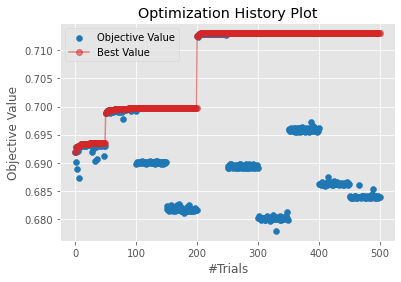

In [35]:
from optuna.visualization.matplotlib import plot_optimization_history

plot_optimization_history(study_rf);

In [36]:
detailed_objective_rf_CV(study_rf.best_trial, X, Y, Y_class)

,Metric,Value (average),Value (std)
0,R2,0.717169,0.048519
1,TP,17.000000,2.357023
2,TN,154.500000,2.173067
3,FP,3.100000,1.523884
4,FN,16.400000,1.712698
5,Accuracy,0.897906,0.009949
6,Precision,0.850144,0.055234
7,Sensitivity,0.507963,0.058045
8,Specificity,0.980290,0.009749
9,F1 score,0.633409,0.045756


In [37]:
mat_met_rf_test['ave'] = mat_met_rf_test.iloc[:,1:11].mean(axis='columns', numeric_only=True)
mat_met_rf_test['std'] = mat_met_rf_test.iloc[:,1:11].std(axis='columns', numeric_only=True)
mat_met_rf_test

,Metric,Set0,Set1,Set2,Set3,Set4,Set5,Set6,Set7,Set8,Set9,ave,std
0,R2,0.686187,0.735183,0.712420,0.725186,0.632286,0.679581,0.673585,0.722280,0.676301,0.717944,0.696095,0.031876
1,TP,34.000000,36.000000,32.000000,35.000000,31.000000,35.000000,31.000000,35.000000,34.000000,28.000000,33.100000,2.514403
2,TN,306.000000,309.000000,303.000000,304.000000,306.000000,304.000000,310.000000,307.000000,308.000000,312.000000,306.900000,2.884826
3,FP,7.000000,5.000000,11.000000,11.000000,9.000000,8.000000,5.000000,7.000000,5.000000,3.000000,7.100000,2.685351
4,FN,35.000000,32.000000,36.000000,32.000000,36.000000,35.000000,36.000000,33.000000,35.000000,39.000000,34.900000,2.131770
5,Accuracy,0.890052,0.903141,0.876963,0.887435,0.882199,0.887435,0.892670,0.895288,0.895288,0.890052,0.890052,0.007301
6,Precision,0.829268,0.878049,0.744186,0.760870,0.775000,0.813953,0.861111,0.833333,0.871795,0.903226,0.827079,0.053476
7,Sensitivity,0.492754,0.529412,0.470588,0.522388,0.462687,0.500000,0.462687,0.514706,0.492754,0.417910,0.486588,0.033792
8,Specificity,0.977600,0.984100,0.965000,0.965100,0.971400,0.974400,0.984100,0.977700,0.984000,0.990500,0.977390,0.008532
9,F1 score,0.618182,0.660550,0.576577,0.619469,0.579439,0.619469,0.601942,0.636364,0.629630,0.571429,0.611305,0.028807


In [38]:
#change to fit into these X values 

TP =np.empty(10)
TN = np.empty(10)
FP = np.empty(10)
FN = np.empty(10)


r2_scores_outer = []
Accuracy_outer = []
Precision_outer = [] #Also called Positive Predictive Value(PPV)
Sensitivity_outer = [] # Also called Recall or True Positive Rate (TPR)
Specificity_outer = [] #Also called selectivity or True Negative Rate  (TNR)
f1_scores_outer = []
f1_scores_W_outer = []
f1_scores_M_outer = []
BA_scores_outer = []
MCC_outer = []
NPV_outer = []
ROC_AUC_outer = []
data_rf=pd.DataFrame()

NUM_TRIALS = 5
random_state= [687266, 98656, 56, 280189, 76543] # 

for i in range(NUM_TRIALS):
    cv_change = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state[i])
    data_inner = pd.DataFrame({'y_test_idx': pd.Series(dtype='int'),
                   'y_test': pd.Series(dtype='float'),
                   'y_pred': pd.Series(dtype='float')})
    
    
    for idx, (train_idx, test_idx) in enumerate(cv_change.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        eval_set = [(X_train, y_train), (X_test, y_test)]
        optimizedCV_rf = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=4, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )
        optimizedCV_rf.fit(X_train,
                          y_train, 
                          
                  )
        #print(test_idx)
        y_pred_optimized_rf = optimizedCV_rf.predict(X_test) 
        data_inner = data_inner.append(pd.DataFrame({'y_test_idx': test_idx, 'y_test': y_test, 'y_pred_rf': y_pred_optimized_rf } ), )
        data_inner.reset_index(inplace=True, drop=True) 
        data_inner.sort_values(by='y_test_idx', inplace=True) 
        
        y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
        y_pred_optimized_rf_cat = np.where(((y_pred_optimized_rf >= 2) | (y_pred_optimized_rf <= -2)), 1, 0)
        
        conf_matrix = confusion_matrix(y_test_cat, y_pred_optimized_rf_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        
        r2_scores_outer.append(r2_score(y_test, y_pred_optimized_rf))
        Accuracy_outer.append(accuracy_score(y_test_cat, y_pred_optimized_rf_cat))
        Precision_outer.append(precision_score(y_test_cat, y_pred_optimized_rf_cat))
        Sensitivity_outer.append(recall_score(y_test_cat, y_pred_optimized_rf_cat))
        Specificity_outer.append(round( TN[idx] / (TN[idx]+FP[idx]),4 ))
        f1_scores_outer.append(f1_score(y_test_cat, y_pred_optimized_rf_cat))
        f1_scores_W_outer.append(f1_score(y_test_cat, y_pred_optimized_rf_cat, average="weighted"))
        f1_scores_M_outer.append(f1_score(y_test_cat, y_pred_optimized_rf_cat, average="macro"))
        BA_scores_outer.append(balanced_accuracy_score(y_test_cat, y_pred_optimized_rf_cat))
        MCC_outer.append(matthews_corrcoef(y_test_cat, y_pred_optimized_rf_cat))
        NPV_outer.append(round( TN[idx] / (TN[idx]+FN[idx]),4 ))
        ROC_AUC_outer.append(roc_auc_score(y_test_cat, y_pred_optimized_rf_cat))
    data_rf['y_test_idx' + str(i)] = data_inner['y_test_idx']
    data_rf['y_test' + str(i)] = data_inner['y_test']
    data_rf['y_pred_rf' + str(i)] = data_inner['y_pred_rf']
   # data_rf['correct' + str(i)] = correct_value
   # data_rf['pred' + str(i)] = y_pred_optimized_rf

mat_met_optimized_rf = pd.DataFrame({'Metric':['R2','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores_outer), np.mean(Accuracy_outer),np.mean(Precision_outer),
                                           np.mean(Sensitivity_outer),np.mean(Specificity_outer),np.mean(f1_scores_outer),
                                           np.mean(f1_scores_W_outer), np.mean(f1_scores_M_outer), np.mean(BA_scores_outer), 
                                           np.mean(MCC_outer),np.mean(NPV_outer),np.mean(ROC_AUC_outer)],
                        'Value (std)': [np.std(r2_scores_outer, ddof=1), np.std(Accuracy_outer, ddof=1),np.std(Precision_outer, ddof=1),
                                        np.std(Sensitivity_outer,ddof=1),np.std(Specificity_outer,ddof=1),np.std(f1_scores_outer, ddof=1),
                                        np.std(f1_scores_W_outer, ddof=1),np.std(f1_scores_M_outer, ddof=1), np.std(BA_scores_outer, ddof=1), 
                                        np.std(MCC_outer, ddof=1),np.std(NPV_outer, ddof=1),np.std(ROC_AUC_outer, ddof=1)]
                       }) 


rf_run0 = data_rf[['y_test_idx0', 'y_test0', 'y_pred_rf0']]
rf_run0.sort_values(by='y_test_idx0', inplace=True)
rf_run0.reset_index(inplace=True, drop=True)
rf_run1 = data_rf[['y_test_idx1', 'y_test1', 'y_pred_rf1']]
rf_run1.sort_values(by='y_test_idx1', inplace=True)
rf_run1.reset_index(inplace=True, drop=True)
rf_run2 = data_rf[['y_test_idx2', 'y_test2', 'y_pred_rf2']]
rf_run2.sort_values(by='y_test_idx2', inplace=True)
rf_run2.reset_index(inplace=True, drop=True)
rf_run3 = data_rf[['y_test_idx3', 'y_test3', 'y_pred_rf3']]
rf_run3.sort_values(by='y_test_idx3', inplace=True)
rf_run3.reset_index(inplace=True, drop=True)
rf_run4 = data_rf[['y_test_idx4', 'y_test4', 'y_pred_rf4']]
rf_run4.sort_values(by='y_test_idx4', inplace=True)
rf_run4.reset_index(inplace=True, drop=True)
chembl_id = df['molecule_chembl_id']
rf_5preds = pd.concat([chembl_id, rf_run0, rf_run1, rf_run2, rf_run3, rf_run4], axis=1)
rf_5preds = rf_5preds[['molecule_chembl_id','y_test_idx0', 'y_test0', 'y_pred_rf0', 'y_pred_rf1', 'y_pred_rf2', 'y_pred_rf3', 'y_pred_rf4']]
rf_5preds['y_pred_rf_ave'] = rf_5preds.iloc[:,2:11].mean(axis='columns', numeric_only=True)
rf_5preds['y_pred_rf_std'] = rf_5preds.iloc[:,2:].std(axis='columns', numeric_only=True)
# maybe also calculate the std for each value
rf_5preds

,molecule_chembl_id,y_test_idx0,y_test0,y_pred_rf0,y_pred_rf1,y_pred_rf2,y_pred_rf3,y_pred_rf4,y_pred_rf_ave,y_pred_rf_std
0,CHEMBL585939,0,-1.19,-0.466978,-0.516722,-0.510956,-0.499591,-0.444505,-0.604792,0.262926
1,CHEMBL96051,1,0.78,0.958527,0.903405,0.959831,0.839009,0.967601,0.901395,0.070350
2,CHEMBL3356916,2,0.30,0.533193,0.523964,0.420861,0.515474,0.533998,0.471248,0.085999
3,CHEMBL3907413,3,0.97,0.838872,0.900065,1.842364,0.922014,0.878542,1.058643,0.352757
4,CHEMBL2047704,4,-2.25,-2.751918,-2.828513,-2.863556,-2.844224,-2.870000,-2.734702,0.220203
...,...,...,...,...,...,...,...,...,...,...
1905,CHEMBL1095136,1905,-1.20,-0.882156,-0.995647,-1.012706,-0.924442,-0.922984,-0.989656,0.104136
1906,CHEMBL2012817,1906,-2.94,0.383658,1.130019,1.149580,1.143315,0.843927,0.285083,1.467482
1907,CHEMBL496511,1907,0.80,0.849727,0.989066,0.927252,1.008317,0.986807,0.926862,0.077612
1908,CHEMBL3940062,1908,2.27,1.543203,1.531139,1.656392,1.756081,1.682863,1.739946,0.249588


In [39]:
mat_met_optimized_rf

,Metric,Value (average),Value (std)
0,R2,0.712916,0.033983
1,Accuracy,0.898743,0.017496
2,Precision,0.858208,0.069145
3,Sensitivity,0.506166,0.085786
4,Specificity,0.981968,0.009958
5,F1 score,0.632754,0.076938
6,F1 score (weighted),0.887277,0.021585
7,F1 score (macro),0.786991,0.043117
8,Balanced Accuracy,0.744072,0.043182
9,MCC,0.608291,0.076102


In [40]:
rf_5preds.to_csv(output/'rf_5test_CV_result_withSemiSel.csv')
mat_met_optimized_rf.to_csv(output/'mat_met_rf_opt_withSemiSel.csv')

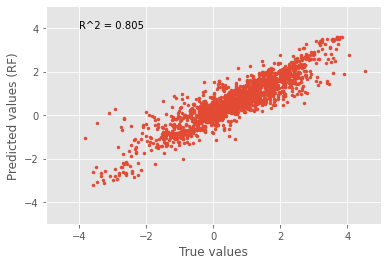

In [41]:
# Scatter plot

limits = -5,5
plt.figsize=(10,10)

plt.scatter(rf_5preds['y_test0'], rf_5preds['y_pred_rf_ave'], marker=".")
lin = np.linspace(*limits, 100)

plt.ylabel("Predicted values (RF)")
plt.xlabel("True values")

plt.xlim(limits)
plt.ylim(limits)

plt.annotate("R^2 = {:.3f}".format(r2_score(rf_5preds['y_test0'], rf_5preds['y_pred_rf_ave'])), (-4, 4))
plt.show()

In [42]:
#cross valide using this optimized RF 
rf_baseline_CVscore = cross_val_score(rf_reg, X, Y, cv=10, scoring="r2")
#rf_opt_testSet_score = cross_val_score(optimized_rf, X, Y, cv=10, scoring="r2")
rf_opt_CVscore = cross_val_score(optimizedCV_rf, X, Y, cv=10, scoring="r2")
print("RF baseline model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(rf_baseline_CVscore), np.std(rf_baseline_CVscore, ddof=1)))
#print("RF optimized model (tested on Y_te) r2_score %0.4f with a standard deviation of %0.4f" % (rf_opt_testSet_score.mean(), rf_opt_testSet_score.std()))
print("RF optimized model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(rf_opt_CVscore), np.std(rf_opt_CVscore, ddof=1)))

RF baseline model r2_score 0.7074 with a standard deviation of 0.0471
RF optimized model r2_score 0.7098 with a standard deviation of 0.0485


In [43]:
import joblib
joblib.dump(rf_reg, "./rf_reg.joblib")
#joblib.dump(optimized_rf, "./optimized_rf.joblib") # fitted to whole training set with last random_state selected
joblib.dump(optimizedCV_rf, "./optimizedCV_rf.joblib")

['./optimizedCV_rf.joblib']

## LGBMRegressor

In [44]:
%%time


r2_scores = np.empty(10)
TP=np.empty(10)
TN = np.empty(10)
FP= np.empty(10)
FN= np.empty(10)
Accuracy = np.empty(10)
Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
f1_scores = np.empty(10)
f1_scores_W=np.empty(10)
f1_scores_M = np.empty(10)
BA_scores = np.empty(10)
MCC = np.empty(10)
NPV = np.empty(10)
ROC_AUC= np.empty(10)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1121218)

for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]

        
        lgbm_reg = lgbm.LGBMRegressor(
        objective="regression",
        random_state=1121218,
        #n_estimators=150,
        boosting_type ="gbdt",  # default histogram binning of LGBM,
        n_jobs=4,
        #min_child_samples = 15,
        subsample=0.8, # also called bagging_fraction
        subsample_freq=10,
     
           )


        eval_set = [(X_train, y_train), (X_test, y_test)]
        lgbm_reg.fit(
                    X_train,
                    y_train,
                    eval_set=eval_set,
                    eval_metric="rmse",
                    #early_stopping_rounds=150,
                    verbose=False,
                    )

        y_pred = lgbm_reg.predict(X_test) 
        # r2 score of the regression model before evaluating categorical evaluation parameters
        r2_scores[idx] = r2_score(y_test, y_pred)
        # now convert the resuls to binary with cutoff 6.3
        y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
        y_pred_cat = np.where(((y_pred >= 2) | (y_pred <= -2)), 1, 0)
        #calculate the evaluation results
        conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
        Precision[idx] = precision_score(y_test_cat, y_pred_cat)
        Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
        f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
        MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)


mat_met_lgbm = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })  
print(mat_met_lgbm)

                 Metric  Value (average)  Value (std)
0                    R2         0.717002     0.039258
1                    TP        18.200000     1.932184
2                    TN       153.400000     1.776388
3                    FP         4.200000     1.229273
4                    FN        15.200000     1.549193
5              Accuracy         0.898429     0.009622
6             Precision         0.813894     0.047709
7           Sensitivity         0.544411     0.050206
8           Specificity         0.973340     0.007839
9              F1 score         0.651074     0.042146
10  F1 score (weighted)         0.889984     0.011173
11     F1 score (macro)         0.795800     0.023394
12    Balanced Accuracy         0.758876     0.024682
13                  MCC         0.611667     0.043945
14                  NPV         0.909920     0.008292
15              ROC_AUC         0.758876     0.024682
CPU times: user 7.68 s, sys: 92.1 ms, total: 7.78 s
Wall time: 1.99 s


In [45]:
import optuna  

def objective_lgbm_CV(trial, X, Y, Y_class):
    param_grid = {
        #"device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_int("n_estimators", 50, 900),
        "learning_rate": trial.suggest_float("learning_rate", 1e-4, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        #"min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 20, 100),
        "max_bin": trial.suggest_int("max_bin", 150, 300),
        #"min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        #"lambda_l1": trial.suggest_float("lambda_l1", 0, 0.001),
        #"lambda_l2": trial.suggest_float("lambda_l2", 1.0,100),
        "num_leaves": trial.suggest_int("num_leaves", 30, 750),
        #"min_child_samples": trial.suggest_int("min_child_samples", 15, 100),
        #"min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        #"bagging_fraction": trial.suggest_float("bagging_fraction", 0.6,1),
        #"bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        }
  
    
    
    
    cv_scores=np.empty(10)
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        lgbm_model = lgbm.LGBMRegressor(objective="regression", 
                                            random_state=1121218, 
                                            boosting_type ="gbdt", 
                                            **param_grid, n_jobs=4,
                                            subsample=0.8, # also called bagging_fraction
                                            subsample_freq=10,
                                         )
    
        eval_set = [(X_train, y_train), (X_test, y_test)]
        lgbm_model.fit(
                X_train,
                y_train,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        y_pred = lgbm_model.predict(X_test)
        cv_scores[idx] = r2_score(y_test, y_pred)
       
        
    return np.mean(cv_scores)

In [46]:
#this is basically inner set parameters
def detailed_objective_lgbm_cv(trial, X, Y, Y_class):
    param_grid = {
        #"device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_int("n_estimators", 50, 900),
        "learning_rate": trial.suggest_float("learning_rate", 1e-4, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        #"min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 20, 100),
        "max_bin": trial.suggest_int("max_bin", 150, 300),
        #"min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        #"lambda_l1": trial.suggest_float("lambda_l1", 0, 0.001),
        #"lambda_l2": trial.suggest_float("lambda_l2", 1.0,100),
        "num_leaves": trial.suggest_int("num_leaves", 30, 750),
        #"min_child_samples": trial.suggest_int("min_child_samples", 15, 100),
        #"min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        #"bagging_fraction": trial.suggest_float("bagging_fraction", 0.6,1),
        #"bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        
    }
    
    
    
    
    
    r2_scores = np.empty(10)
    TP=np.empty(10)
    TN = np.empty(10)
    FP= np.empty(10)
    FN= np.empty(10)
    Accuracy = np.empty(10)
    Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
    Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
    Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
    f1_scores = np.empty(10)
    f1_scores_W = np.empty(10)
    f1_scores_M =np.empty(10)
    BA_scores = np.empty(10)
    MCC = np.empty(10)
    NPV = np.empty(10)
    ROC_AUC= np.empty(10)
    
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        lgbm_model = lgbm.LGBMRegressor(objective="regression", 
                                            random_state=1121218, 
                                            boosting_type ="gbdt", 
                                            **param_grid, n_jobs=4,
                                            subsample=0.8, # also called bagging_fraction
                                            subsample_freq=10,
                                         )
    
        eval_set = [(X_train, y_train), (X_test, y_test)]
        lgbm_model.fit(
                X_train,
                y_train,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        y_pred = lgbm_model.predict(X_test)
         # r2 score of the regression model before evaluating categorical evaluation parameters
        r2_scores[idx] = r2_score(y_test, y_pred)
        # now convert the resuls to binary with cutoff 6.3
        y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
        y_pred_cat = np.where(((y_pred >= 2) | (y_pred <= -2)), 1, 0)
        #calculate the evaluation results
        conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
        Precision[idx] = precision_score(y_test_cat, y_pred_cat)
        Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
        f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
        MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)


    mat_met = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [ np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })  
    print(mat_met)

In [47]:
#Execute optuna and set hyperparameters
study_lgbm = optuna.create_study(direction='maximize', study_name="lgbmRegressor")
func_lgbm_0 = lambda trial: objective_lgbm_CV(trial, X_trainSet0, Y_trainSet0, Y_trainSet0_class)
study_lgbm.optimize(func_lgbm_0, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 07:00:07,454] A new study created in memory with name: lgbmRegressor
[I 2023-02-22 07:00:11,307] Trial 0 finished with value: 0.6913377463843091 and parameters: {'n_estimators': 837, 'learning_rate': 0.04431612822281546, 'max_depth': 7, 'max_bin': 182, 'num_leaves': 102}. Best is trial 0 with value: 0.6913377463843091.
[I 2023-02-22 07:00:13,305] Trial 1 finished with value: 0.6945974872639238 and parameters: {'n_estimators': 332, 'learning_rate': 0.09753530040386284, 'max_depth': 7, 'max_bin': 180, 'num_leaves': 311}. Best is trial 1 with value: 0.6945974872639238.
[I 2023-02-22 07:00:14,780] Trial 2 finished with value: 0.6728940315371804 and parameters: {'n_estimators': 852, 'learning_rate': 0.14449908621977858, 'max_depth': 4, 'max_bin': 168, 'num_leaves': 390}. Best is trial 1 with value: 0.6945974872639238.
[I 2023-02-22 07:00:15,557] Trial 3 finished with value: 0.6584736951179161 and parameters: {'n_estimators': 94, 'learning_rate': 0.15087829566437327, 'max_depth

[I 2023-02-22 07:01:54,831] Trial 31 finished with value: 0.7008216487330118 and parameters: {'n_estimators': 531, 'learning_rate': 0.08021361446643056, 'max_depth': 11, 'max_bin': 199, 'num_leaves': 213}. Best is trial 24 with value: 0.708414549149311.
[I 2023-02-22 07:01:58,106] Trial 32 finished with value: 0.7002422861719854 and parameters: {'n_estimators': 294, 'learning_rate': 0.050680108220974004, 'max_depth': 12, 'max_bin': 214, 'num_leaves': 298}. Best is trial 24 with value: 0.708414549149311.
[I 2023-02-22 07:02:00,557] Trial 33 finished with value: 0.6927223409391993 and parameters: {'n_estimators': 432, 'learning_rate': 0.08753864198820166, 'max_depth': 10, 'max_bin': 187, 'num_leaves': 332}. Best is trial 24 with value: 0.708414549149311.
[I 2023-02-22 07:02:03,007] Trial 34 finished with value: 0.634014496194548 and parameters: {'n_estimators': 697, 'learning_rate': 0.03149378551707962, 'max_depth': 3, 'max_bin': 191, 'num_leaves': 375}. Best is trial 24 with value: 0.70

	Number of trials: 50.0
	Best value (r2_score): 0.7084
	Best params:
		n_estimators: 679
		learning_rate: 0.053679183074714976
		max_depth: 12
		max_bin: 205
		num_leaves: 147


In [48]:
optimized_lgbm_0 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )
                                         
    
eval_set = [(X_testSet0, Y_testSet0)]
optimized_lgbm_0.fit(X_trainSet0,
                Y_trainSet0,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )

#predict        
y_pred_lgbm_0 = optimized_lgbm_0.predict(X_testSet0)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet0, y_pred_lgbm_0)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet1 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_lgbm_0_cat = np.where(((y_pred_lgbm_0 >= 2) | (y_pred_lgbm_0 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet0_cat, y_pred_lgbm_0_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet0_cat, y_pred_lgbm_0_cat)
Precision = precision_score(Y_testSet0_cat, y_pred_lgbm_0_cat)
Sensitivity = recall_score(Y_testSet0_cat, y_pred_lgbm_0_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet0_cat, y_pred_lgbm_0_cat)      
f1_scores_W = f1_score(Y_testSet0_cat, y_pred_lgbm_0_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet0_cat, y_pred_lgbm_0_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet0_cat, y_pred_lgbm_0_cat)
MCC = matthews_corrcoef(Y_testSet0_cat, y_pred_lgbm_0_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet0_cat, y_pred_lgbm_0_cat)


mat_met_lgbm_test = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Set0':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
    
print(mat_met_lgbm_test)



                 Metric        Set0
0                    R2    0.745041
1                    TP   45.000000
2                    TN  304.000000
3                    FP    9.000000
4                    FN   24.000000
5              Accuracy    0.913613
6             Precision    0.833333
7           Sensitivity    0.652174
8           Specificity    0.971200
9              F1 score    0.731707
10  F1 score (weighted)    0.909356
11     F1 score (macro)    0.840113
12    Balanced Accuracy    0.811710
13                  MCC    0.688404
14                  NPV    0.926800
15              ROC_AUC    0.811710


In [49]:
#Execute optuna and set hyperparameters

func_lgbm_1 = lambda trial: objective_lgbm_CV(trial, X_trainSet1, Y_trainSet1, Y_trainSet1_class)
study_lgbm.optimize(func_lgbm_1, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 07:02:54,968] Trial 50 finished with value: 0.710386080909658 and parameters: {'n_estimators': 672, 'learning_rate': 0.09517167292823696, 'max_depth': 12, 'max_bin': 216, 'num_leaves': 97}. Best is trial 50 with value: 0.710386080909658.
[I 2023-02-22 07:02:58,215] Trial 51 finished with value: 0.7147007280270257 and parameters: {'n_estimators': 663, 'learning_rate': 0.09155011060127356, 'max_depth': 12, 'max_bin': 218, 'num_leaves': 99}. Best is trial 51 with value: 0.7147007280270257.
[I 2023-02-22 07:03:01,239] Trial 52 finished with value: 0.7090418037062193 and parameters: {'n_estimators': 673, 'learning_rate': 0.09278294348537174, 'max_depth': 12, 'max_bin': 216, 'num_leaves': 79}. Best is trial 51 with value: 0.7147007280270257.
[I 2023-02-22 07:03:03,814] Trial 53 finished with value: 0.7063189555756126 and parameters: {'n_estimators': 679, 'learning_rate': 0.09878789348488534, 'max_depth': 12, 'max_bin': 227, 'num_leaves': 88}. Best is trial 51 with value: 0.7147

[I 2023-02-22 07:04:06,627] Trial 81 finished with value: 0.7132222200044348 and parameters: {'n_estimators': 522, 'learning_rate': 0.12613912418608036, 'max_depth': 11, 'max_bin': 244, 'num_leaves': 154}. Best is trial 68 with value: 0.7171001749707007.
[I 2023-02-22 07:04:08,463] Trial 82 finished with value: 0.7062078546648614 and parameters: {'n_estimators': 182, 'learning_rate': 0.13152573157272415, 'max_depth': 11, 'max_bin': 262, 'num_leaves': 152}. Best is trial 68 with value: 0.7171001749707007.
[I 2023-02-22 07:04:10,788] Trial 83 finished with value: 0.7128216729950317 and parameters: {'n_estimators': 510, 'learning_rate': 0.1276482949437351, 'max_depth': 11, 'max_bin': 248, 'num_leaves': 133}. Best is trial 68 with value: 0.7171001749707007.
[I 2023-02-22 07:04:13,020] Trial 84 finished with value: 0.7117747298623044 and parameters: {'n_estimators': 441, 'learning_rate': 0.11763756379610954, 'max_depth': 11, 'max_bin': 244, 'num_leaves': 68}. Best is trial 68 with value: 0.

	Number of trials: 100.0
	Best value (r2_score): 0.7178
	Best params:
		n_estimators: 483
		learning_rate: 0.12809550852587728
		max_depth: 11
		max_bin: 247
		num_leaves: 45


In [50]:
optimized_lgbm_1 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )
    
eval_set = [(X_testSet1, Y_testSet1)]
optimized_lgbm_1.fit(X_trainSet1,
                Y_trainSet1,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )

#predict        
y_pred_lgbm_1 = optimized_lgbm_1.predict(X_testSet1)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet1, y_pred_lgbm_1)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet1 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_lgbm_1_cat = np.where(((y_pred_lgbm_1 >= 2) | (y_pred_lgbm_1 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet1_cat, y_pred_lgbm_1_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet1_cat, y_pred_lgbm_1_cat)
Precision = precision_score(Y_testSet1_cat, y_pred_lgbm_1_cat)
Sensitivity = recall_score(Y_testSet1_cat, y_pred_lgbm_1_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet1_cat, y_pred_lgbm_1_cat)      
f1_scores_W = f1_score(Y_testSet1_cat, y_pred_lgbm_1_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet1_cat, y_pred_lgbm_1_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet1_cat, y_pred_lgbm_1_cat)
MCC = matthews_corrcoef(Y_testSet1_cat, y_pred_lgbm_1_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet1_cat, y_pred_lgbm_1_cat)


set1 = pd.DataFrame({ 'Set1':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set1'] =set1
print(mat_met_lgbm_test)


                 Metric        Set0        Set1
0                    R2    0.745041    0.725091
1                    TP   45.000000   40.000000
2                    TN  304.000000  308.000000
3                    FP    9.000000    6.000000
4                    FN   24.000000   28.000000
5              Accuracy    0.913613    0.910995
6             Precision    0.833333    0.869565
7           Sensitivity    0.652174    0.588235
8           Specificity    0.971200    0.980900
9              F1 score    0.731707    0.701754
10  F1 score (weighted)    0.909356    0.903913
11     F1 score (macro)    0.840113    0.824723
12    Balanced Accuracy    0.811710    0.784564
13                  MCC    0.688404    0.668929
14                  NPV    0.926800    0.916700
15              ROC_AUC    0.811710    0.784564


In [51]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="lgbmRegressor_1")
func_lgbm_2 = lambda trial: objective_lgbm_CV(trial, X_trainSet2, Y_trainSet2, Y_trainSet2_class)
study_lgbm.optimize(func_lgbm_2, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 07:04:49,742] Trial 100 finished with value: 0.6826798482955796 and parameters: {'n_estimators': 693, 'learning_rate': 0.1338851721190315, 'max_depth': 12, 'max_bin': 280, 'num_leaves': 135}. Best is trial 92 with value: 0.7178341678552046.
[I 2023-02-22 07:04:51,877] Trial 101 finished with value: 0.6832508082236279 and parameters: {'n_estimators': 514, 'learning_rate': 0.12692250117533338, 'max_depth': 11, 'max_bin': 244, 'num_leaves': 159}. Best is trial 92 with value: 0.7178341678552046.
[I 2023-02-22 07:04:53,844] Trial 102 finished with value: 0.6886058793907078 and parameters: {'n_estimators': 472, 'learning_rate': 0.13746863802499715, 'max_depth': 11, 'max_bin': 234, 'num_leaves': 41}. Best is trial 92 with value: 0.7178341678552046.
[I 2023-02-22 07:04:56,026] Trial 103 finished with value: 0.6860428007027466 and parameters: {'n_estimators': 545, 'learning_rate': 0.12312224179289147, 'max_depth': 11, 'max_bin': 252, 'num_leaves': 75}. Best is trial 92 with value:

[I 2023-02-22 07:05:57,199] Trial 131 finished with value: 0.6902367268172472 and parameters: {'n_estimators': 775, 'learning_rate': 0.13858055204648945, 'max_depth': 12, 'max_bin': 205, 'num_leaves': 87}. Best is trial 92 with value: 0.7178341678552046.
[I 2023-02-22 07:05:59,486] Trial 132 finished with value: 0.685868475724274 and parameters: {'n_estimators': 496, 'learning_rate': 0.12643129702382885, 'max_depth': 12, 'max_bin': 219, 'num_leaves': 66}. Best is trial 92 with value: 0.7178341678552046.
[I 2023-02-22 07:06:01,820] Trial 133 finished with value: 0.6919150456768509 and parameters: {'n_estimators': 670, 'learning_rate': 0.14611888821014662, 'max_depth': 12, 'max_bin': 254, 'num_leaves': 117}. Best is trial 92 with value: 0.7178341678552046.
[I 2023-02-22 07:06:03,903] Trial 134 finished with value: 0.6845858665546222 and parameters: {'n_estimators': 526, 'learning_rate': 0.13601581746112157, 'max_depth': 11, 'max_bin': 250, 'num_leaves': 52}. Best is trial 92 with value: 

	Number of trials: 150.0
	Best value (r2_score): 0.7178
	Best params:
		n_estimators: 483
		learning_rate: 0.12809550852587728
		max_depth: 11
		max_bin: 247
		num_leaves: 45


In [52]:
optimized_lgbm_2 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet2, Y_testSet2)]
optimized_lgbm_2.fit(X_trainSet2,
                Y_trainSet2,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_2 = optimized_lgbm_2.predict(X_testSet2)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet2, y_pred_lgbm_2)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet2 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_lgbm_2_cat = np.where(((y_pred_lgbm_2 >= 2) | (y_pred_lgbm_2 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet2_cat, y_pred_lgbm_2_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet2_cat, y_pred_lgbm_2_cat)
Precision = precision_score(Y_testSet2_cat, y_pred_lgbm_2_cat)
Sensitivity = recall_score(Y_testSet2_cat, y_pred_lgbm_2_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet2_cat, y_pred_lgbm_2_cat)      
f1_scores_W = f1_score(Y_testSet2_cat, y_pred_lgbm_2_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet2_cat, y_pred_lgbm_2_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet2_cat, y_pred_lgbm_2_cat)
MCC = matthews_corrcoef(Y_testSet2_cat, y_pred_lgbm_2_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet2_cat, y_pred_lgbm_2_cat)


Set2 = pd.DataFrame({ 'Set2':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set2'] = Set2
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2
0                    R2    0.745041    0.725091    0.720576
1                    TP   45.000000   40.000000   32.000000
2                    TN  304.000000  308.000000  301.000000
3                    FP    9.000000    6.000000   13.000000
4                    FN   24.000000   28.000000   36.000000
5              Accuracy    0.913613    0.910995    0.871728
6             Precision    0.833333    0.869565    0.711111
7           Sensitivity    0.652174    0.588235    0.470588
8           Specificity    0.971200    0.980900    0.958600
9              F1 score    0.731707    0.701754    0.566372
10  F1 score (weighted)    0.909356    0.903913    0.860939
11     F1 score (macro)    0.840113    0.824723    0.745551
12    Balanced Accuracy    0.811710    0.784564    0.714593
13                  MCC    0.688404    0.668929    0.509266
14                  NPV    0.926800    0.916700    0.893200
15              ROC_AUC    0.811710    0

In [53]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="lgbmRegressor_1")
func_lgbm_3 = lambda trial: objective_lgbm_CV(trial, X_trainSet3, Y_trainSet3, Y_trainSet3_class)
study_lgbm.optimize(func_lgbm_3, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 07:06:39,603] Trial 150 finished with value: 0.6875234552086713 and parameters: {'n_estimators': 247, 'learning_rate': 0.151078380928928, 'max_depth': 12, 'max_bin': 255, 'num_leaves': 64}. Best is trial 92 with value: 0.7178341678552046.
[I 2023-02-22 07:06:42,051] Trial 151 finished with value: 0.6929003726778752 and parameters: {'n_estimators': 502, 'learning_rate': 0.12866315050104463, 'max_depth': 12, 'max_bin': 241, 'num_leaves': 87}. Best is trial 92 with value: 0.7178341678552046.
[I 2023-02-22 07:06:45,312] Trial 152 finished with value: 0.6955288500529793 and parameters: {'n_estimators': 485, 'learning_rate': 0.123591750798496, 'max_depth': 12, 'max_bin': 247, 'num_leaves': 414}. Best is trial 92 with value: 0.7178341678552046.
[I 2023-02-22 07:06:47,698] Trial 153 finished with value: 0.6890550811815153 and parameters: {'n_estimators': 713, 'learning_rate': 0.09749490413203511, 'max_depth': 11, 'max_bin': 249, 'num_leaves': 77}. Best is trial 92 with value: 0.7

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

[I 2023-02-22 07:07:22,641] Trial 168 finished with value: 0.6852859602266916 and parameters: {'n_estimators': 557, 'learning_rate': 0.13813151890947356, 'max_depth': 11, 'max_bin': 250, 'num_leaves': 31}. Best is trial 92 with value: 0.7178341678552046.
[I 2023-02-22 07:07:25,267] Trial 169 finished with value: 0.6881079246890354 and parameters: {'n_estimators': 648, 'learning_rate': 0.1197072485738754, 'max_depth': 11, 'max_bin': 258, 'num_leaves': 80}. Best is trial 92 with value: 0.7178341678552046.
[I 2023-02-22 07:07:27,496] Trial 170 finished with value: 0.6932854793790162 and parameters: {'n_estimators': 622, 'learning_rate': 0.13081964219248635, 'max_depth': 12, 'max_bin': 150, 'num_leaves': 54}. Best is trial 92 with value: 0.7178341678552046.
[I 2023-02-22 07:07:30,012] Trial 171 finished with value: 0.6908043551409155 and parameters: {'n_estimators': 427, 'learning_rate': 0.10351202675553092, 'max_depth': 11, 'max_bin': 243, 'num_leaves': 70}. Best is trial 92 with value: 0

[I 2023-02-22 07:08:38,066] Trial 199 finished with value: 0.6925468649111663 and parameters: {'n_estimators': 572, 'learning_rate': 0.13542089772605023, 'max_depth': 11, 'max_bin': 248, 'num_leaves': 138}. Best is trial 92 with value: 0.7178341678552046.


	Number of trials: 200.0
	Best value (r2_score): 0.7178
	Best params:
		n_estimators: 483
		learning_rate: 0.12809550852587728
		max_depth: 11
		max_bin: 247
		num_leaves: 45


In [54]:
optimized_lgbm_3 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet3, Y_testSet3)]
optimized_lgbm_3.fit(X_trainSet3,
                Y_trainSet3,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_3 = optimized_lgbm_3.predict(X_testSet3)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet3, y_pred_lgbm_3)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet3 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_lgbm_3_cat = np.where(((y_pred_lgbm_3 >= 2) | (y_pred_lgbm_3 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet3_cat, y_pred_lgbm_3_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet3_cat, y_pred_lgbm_3_cat)
Precision = precision_score(Y_testSet3_cat, y_pred_lgbm_3_cat)
Sensitivity = recall_score(Y_testSet3_cat, y_pred_lgbm_3_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet3_cat, y_pred_lgbm_3_cat)      
f1_scores_W = f1_score(Y_testSet3_cat, y_pred_lgbm_3_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet3_cat, y_pred_lgbm_3_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet3_cat, y_pred_lgbm_3_cat)
MCC = matthews_corrcoef(Y_testSet3_cat, y_pred_lgbm_3_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet3_cat, y_pred_lgbm_3_cat)


Set3 = pd.DataFrame({ 'Set3':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set3'] = Set3
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3
0                    R2    0.745041    0.725091    0.720576    0.742078
1                    TP   45.000000   40.000000   32.000000   36.000000
2                    TN  304.000000  308.000000  301.000000  308.000000
3                    FP    9.000000    6.000000   13.000000    7.000000
4                    FN   24.000000   28.000000   36.000000   31.000000
5              Accuracy    0.913613    0.910995    0.871728    0.900524
6             Precision    0.833333    0.869565    0.711111    0.837209
7           Sensitivity    0.652174    0.588235    0.470588    0.537313
8           Specificity    0.971200    0.980900    0.958600    0.977800
9              F1 score    0.731707    0.701754    0.566372    0.654545
10  F1 score (weighted)    0.909356    0.903913    0.860939    0.891497
11     F1 score (macro)    0.840113    0.824723    0.745551    0.798221
12    Balanced Accuracy    0.811710    0.784564    0.714593    0

In [55]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="lgbmRegressor_1")
func_lgbm_4 = lambda trial: objective_lgbm_CV(trial, X_trainSet4, Y_trainSet4, Y_trainSet4_class)
study_lgbm.optimize(func_lgbm_4, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 07:08:40,897] Trial 200 finished with value: 0.7219741414624783 and parameters: {'n_estimators': 550, 'learning_rate': 0.09569941080342356, 'max_depth': 12, 'max_bin': 252, 'num_leaves': 61}. Best is trial 200 with value: 0.7219741414624783.
[I 2023-02-22 07:08:43,573] Trial 201 finished with value: 0.716352356007096 and parameters: {'n_estimators': 552, 'learning_rate': 0.09694979681243907, 'max_depth': 12, 'max_bin': 252, 'num_leaves': 48}. Best is trial 200 with value: 0.7219741414624783.
[I 2023-02-22 07:08:46,074] Trial 202 finished with value: 0.7172837222235133 and parameters: {'n_estimators': 549, 'learning_rate': 0.09142570718417145, 'max_depth': 12, 'max_bin': 252, 'num_leaves': 62}. Best is trial 200 with value: 0.7219741414624783.
[I 2023-02-22 07:08:48,825] Trial 203 finished with value: 0.7200593445299944 and parameters: {'n_estimators': 581, 'learning_rate': 0.09243654591341967, 'max_depth': 12, 'max_bin': 257, 'num_leaves': 77}. Best is trial 200 with valu

[I 2023-02-22 07:10:05,376] Trial 231 finished with value: 0.7215256913831343 and parameters: {'n_estimators': 616, 'learning_rate': 0.09972966729055391, 'max_depth': 12, 'max_bin': 293, 'num_leaves': 123}. Best is trial 213 with value: 0.7244357231527775.
[I 2023-02-22 07:10:08,015] Trial 232 finished with value: 0.7202451601557259 and parameters: {'n_estimators': 618, 'learning_rate': 0.08429118986436349, 'max_depth': 12, 'max_bin': 292, 'num_leaves': 128}. Best is trial 213 with value: 0.7244357231527775.
[I 2023-02-22 07:10:11,064] Trial 233 finished with value: 0.7199524108629538 and parameters: {'n_estimators': 624, 'learning_rate': 0.0840946292388133, 'max_depth': 12, 'max_bin': 292, 'num_leaves': 129}. Best is trial 213 with value: 0.7244357231527775.
[I 2023-02-22 07:10:13,900] Trial 234 finished with value: 0.7185887168869096 and parameters: {'n_estimators': 615, 'learning_rate': 0.07818219155258281, 'max_depth': 12, 'max_bin': 296, 'num_leaves': 130}. Best is trial 213 with 

	Number of trials: 250.0
	Best value (r2_score): 0.7257
	Best params:
		n_estimators: 633
		learning_rate: 0.0889173543678935
		max_depth: 12
		max_bin: 291
		num_leaves: 131


In [56]:
optimized_lgbm_4 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet4, Y_testSet4)]
optimized_lgbm_4.fit(X_trainSet4,
                Y_trainSet4,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_4 = optimized_lgbm_4.predict(X_testSet4)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet4, y_pred_lgbm_4)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet4 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_lgbm_4_cat = np.where(((y_pred_lgbm_4 >= 2) | (y_pred_lgbm_4 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet4_cat, y_pred_lgbm_4_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet4_cat, y_pred_lgbm_4_cat)
Precision = precision_score(Y_testSet4_cat, y_pred_lgbm_4_cat)
Sensitivity = recall_score(Y_testSet4_cat, y_pred_lgbm_4_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet4_cat, y_pred_lgbm_4_cat)      
f1_scores_W = f1_score(Y_testSet4_cat, y_pred_lgbm_4_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet4_cat, y_pred_lgbm_4_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet4_cat, y_pred_lgbm_4_cat)
MCC = matthews_corrcoef(Y_testSet4_cat, y_pred_lgbm_4_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet4_cat, y_pred_lgbm_4_cat)


Set4 = pd.DataFrame({ 'Set4':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set4'] = Set4
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.745041    0.725091    0.720576    0.742078   
1                    TP   45.000000   40.000000   32.000000   36.000000   
2                    TN  304.000000  308.000000  301.000000  308.000000   
3                    FP    9.000000    6.000000   13.000000    7.000000   
4                    FN   24.000000   28.000000   36.000000   31.000000   
5              Accuracy    0.913613    0.910995    0.871728    0.900524   
6             Precision    0.833333    0.869565    0.711111    0.837209   
7           Sensitivity    0.652174    0.588235    0.470588    0.537313   
8           Specificity    0.971200    0.980900    0.958600    0.977800   
9              F1 score    0.731707    0.701754    0.566372    0.654545   
10  F1 score (weighted)    0.909356    0.903913    0.860939    0.891497   
11     F1 score (macro)    0.840113    0.824723    0.745551    0.798221   
12    Balanced Accuracy  

In [57]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="lgbmRegressor_1")
func_lgbm_5 = lambda trial: objective_lgbm_CV(trial, X_trainSet5, Y_trainSet5, Y_trainSet5_class)
study_lgbm.optimize(func_lgbm_5, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 07:11:00,262] Trial 250 finished with value: 0.699404863334689 and parameters: {'n_estimators': 647, 'learning_rate': 0.07806691958025944, 'max_depth': 12, 'max_bin': 284, 'num_leaves': 97}. Best is trial 237 with value: 0.7257077408139523.
[I 2023-02-22 07:11:03,601] Trial 251 finished with value: 0.6975087886344368 and parameters: {'n_estimators': 633, 'learning_rate': 0.07417411554508313, 'max_depth': 12, 'max_bin': 300, 'num_leaves': 101}. Best is trial 237 with value: 0.7257077408139523.
[I 2023-02-22 07:11:06,671] Trial 252 finished with value: 0.6986262285317487 and parameters: {'n_estimators': 574, 'learning_rate': 0.06847743519626366, 'max_depth': 12, 'max_bin': 285, 'num_leaves': 105}. Best is trial 237 with value: 0.7257077408139523.
[I 2023-02-22 07:11:09,821] Trial 253 finished with value: 0.6957631241837142 and parameters: {'n_estimators': 602, 'learning_rate': 0.08114609046200844, 'max_depth': 12, 'max_bin': 290, 'num_leaves': 141}. Best is trial 237 with v

[I 2023-02-22 07:12:28,732] Trial 281 finished with value: 0.7006784380338615 and parameters: {'n_estimators': 606, 'learning_rate': 0.086046140089931, 'max_depth': 12, 'max_bin': 282, 'num_leaves': 87}. Best is trial 237 with value: 0.7257077408139523.
[I 2023-02-22 07:12:31,578] Trial 282 finished with value: 0.7010234645388835 and parameters: {'n_estimators': 638, 'learning_rate': 0.09637274708967326, 'max_depth': 12, 'max_bin': 293, 'num_leaves': 112}. Best is trial 237 with value: 0.7257077408139523.
[I 2023-02-22 07:12:34,704] Trial 283 finished with value: 0.6992840118189575 and parameters: {'n_estimators': 591, 'learning_rate': 0.09364741669216121, 'max_depth': 12, 'max_bin': 270, 'num_leaves': 132}. Best is trial 237 with value: 0.7257077408139523.
[I 2023-02-22 07:12:37,524] Trial 284 finished with value: 0.7048928713871421 and parameters: {'n_estimators': 623, 'learning_rate': 0.08989867269540922, 'max_depth': 12, 'max_bin': 288, 'num_leaves': 97}. Best is trial 237 with val

	Number of trials: 300.0
	Best value (r2_score): 0.7257
	Best params:
		n_estimators: 633
		learning_rate: 0.0889173543678935
		max_depth: 12
		max_bin: 291
		num_leaves: 131


In [58]:
optimized_lgbm_5 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet5, Y_testSet5)]
optimized_lgbm_5.fit(X_trainSet5,
                Y_trainSet5,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_5 = optimized_lgbm_5.predict(X_testSet5)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet5, y_pred_lgbm_5)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet5 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_lgbm_5_cat = np.where(((y_pred_lgbm_5 >= 2) | (y_pred_lgbm_5 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet5_cat, y_pred_lgbm_5_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet5_cat, y_pred_lgbm_5_cat)
Precision = precision_score(Y_testSet5_cat, y_pred_lgbm_5_cat)
Sensitivity = recall_score(Y_testSet5_cat, y_pred_lgbm_5_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet5_cat, y_pred_lgbm_5_cat)      
f1_scores_W = f1_score(Y_testSet5_cat, y_pred_lgbm_5_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet5_cat, y_pred_lgbm_5_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet5_cat, y_pred_lgbm_5_cat)
MCC = matthews_corrcoef(Y_testSet5_cat, y_pred_lgbm_5_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet5_cat, y_pred_lgbm_5_cat)


Set5 = pd.DataFrame({ 'Set5':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set5'] = Set5
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.745041    0.725091    0.720576    0.742078   
1                    TP   45.000000   40.000000   32.000000   36.000000   
2                    TN  304.000000  308.000000  301.000000  308.000000   
3                    FP    9.000000    6.000000   13.000000    7.000000   
4                    FN   24.000000   28.000000   36.000000   31.000000   
5              Accuracy    0.913613    0.910995    0.871728    0.900524   
6             Precision    0.833333    0.869565    0.711111    0.837209   
7           Sensitivity    0.652174    0.588235    0.470588    0.537313   
8           Specificity    0.971200    0.980900    0.958600    0.977800   
9              F1 score    0.731707    0.701754    0.566372    0.654545   
10  F1 score (weighted)    0.909356    0.903913    0.860939    0.891497   
11     F1 score (macro)    0.840113    0.824723    0.745551    0.798221   
12    Balanced Accuracy  

In [59]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="lgbmRegressor_1")
func_lgbm_6 = lambda trial: objective_lgbm_CV(trial, X_trainSet6, Y_trainSet6, Y_trainSet6_class)
study_lgbm.optimize(func_lgbm_6, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.6f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 07:13:23,223] Trial 300 finished with value: 0.6946661049347437 and parameters: {'n_estimators': 615, 'learning_rate': 0.09272464784688675, 'max_depth': 9, 'max_bin': 266, 'num_leaves': 148}. Best is trial 237 with value: 0.7257077408139523.
[I 2023-02-22 07:13:25,362] Trial 301 finished with value: 0.6758071247843777 and parameters: {'n_estimators': 600, 'learning_rate': 0.07773339670952986, 'max_depth': 4, 'max_bin': 289, 'num_leaves': 109}. Best is trial 237 with value: 0.7257077408139523.
[I 2023-02-22 07:13:27,805] Trial 302 finished with value: 0.6995692606852832 and parameters: {'n_estimators': 631, 'learning_rate': 0.08579258136077306, 'max_depth': 12, 'max_bin': 271, 'num_leaves': 81}. Best is trial 237 with value: 0.7257077408139523.
[I 2023-02-22 07:13:30,886] Trial 303 finished with value: 0.691294307945118 and parameters: {'n_estimators': 563, 'learning_rate': 0.06152458321217009, 'max_depth': 12, 'max_bin': 285, 'num_leaves': 127}. Best is trial 237 with val

[I 2023-02-22 07:14:47,313] Trial 331 finished with value: 0.6951279357721277 and parameters: {'n_estimators': 606, 'learning_rate': 0.0829292972729328, 'max_depth': 12, 'max_bin': 289, 'num_leaves': 379}. Best is trial 237 with value: 0.7257077408139523.
[I 2023-02-22 07:14:50,404] Trial 332 finished with value: 0.6975073383692555 and parameters: {'n_estimators': 581, 'learning_rate': 0.07167524712645808, 'max_depth': 12, 'max_bin': 294, 'num_leaves': 107}. Best is trial 237 with value: 0.7257077408139523.
[I 2023-02-22 07:14:52,856] Trial 333 finished with value: 0.6971736657920194 and parameters: {'n_estimators': 632, 'learning_rate': 0.09915019043412354, 'max_depth': 12, 'max_bin': 278, 'num_leaves': 86}. Best is trial 237 with value: 0.7257077408139523.
[I 2023-02-22 07:14:55,478] Trial 334 finished with value: 0.6956133700313194 and parameters: {'n_estimators': 593, 'learning_rate': 0.0903315035236523, 'max_depth': 12, 'max_bin': 282, 'num_leaves': 148}. Best is trial 237 with va

	Number of trials: 350.0
	Best value (r2_score): 0.725708
	Best params:
		n_estimators: 633
		learning_rate: 0.0889173543678935
		max_depth: 12
		max_bin: 291
		num_leaves: 131


In [60]:
optimized_lgbm_6 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet6, Y_testSet6)]
optimized_lgbm_6.fit(X_trainSet6,
                Y_trainSet6,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_6 = optimized_lgbm_6.predict(X_testSet6)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet6, y_pred_lgbm_6)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet6 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_lgbm_6_cat = np.where(((y_pred_lgbm_6 >= 2) | (y_pred_lgbm_6 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet6_cat, y_pred_lgbm_6_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet6_cat, y_pred_lgbm_6_cat)
Precision = precision_score(Y_testSet6_cat, y_pred_lgbm_6_cat)
Sensitivity = recall_score(Y_testSet6_cat, y_pred_lgbm_6_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet6_cat, y_pred_lgbm_6_cat)      
f1_scores_W = f1_score(Y_testSet6_cat, y_pred_lgbm_6_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet6_cat, y_pred_lgbm_6_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet6_cat, y_pred_lgbm_6_cat)
MCC = matthews_corrcoef(Y_testSet6_cat, y_pred_lgbm_6_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet6_cat, y_pred_lgbm_6_cat)


Set6 = pd.DataFrame({ 'Set6':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set6'] = Set6
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.745041    0.725091    0.720576    0.742078   
1                    TP   45.000000   40.000000   32.000000   36.000000   
2                    TN  304.000000  308.000000  301.000000  308.000000   
3                    FP    9.000000    6.000000   13.000000    7.000000   
4                    FN   24.000000   28.000000   36.000000   31.000000   
5              Accuracy    0.913613    0.910995    0.871728    0.900524   
6             Precision    0.833333    0.869565    0.711111    0.837209   
7           Sensitivity    0.652174    0.588235    0.470588    0.537313   
8           Specificity    0.971200    0.980900    0.958600    0.977800   
9              F1 score    0.731707    0.701754    0.566372    0.654545   
10  F1 score (weighted)    0.909356    0.903913    0.860939    0.891497   
11     F1 score (macro)    0.840113    0.824723    0.745551    0.798221   
12    Balanced Accuracy  

In [61]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="lgbmRegressor_1")
func_lgbm_7 = lambda trial: objective_lgbm_CV(trial, X_trainSet7, Y_trainSet7, Y_trainSet7_class)
study_lgbm.optimize(func_lgbm_7, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.7f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 07:15:37,268] Trial 350 finished with value: 0.702621844724201 and parameters: {'n_estimators': 590, 'learning_rate': 0.08552972311700498, 'max_depth': 12, 'max_bin': 272, 'num_leaves': 141}. Best is trial 237 with value: 0.7257077408139523.
[I 2023-02-22 07:15:39,743] Trial 351 finished with value: 0.6980825562348979 and parameters: {'n_estimators': 612, 'learning_rate': 0.10017001089277527, 'max_depth': 12, 'max_bin': 289, 'num_leaves': 99}. Best is trial 237 with value: 0.7257077408139523.
[I 2023-02-22 07:15:42,448] Trial 352 finished with value: 0.7014858533707298 and parameters: {'n_estimators': 565, 'learning_rate': 0.0943928138264617, 'max_depth': 12, 'max_bin': 293, 'num_leaves': 114}. Best is trial 237 with value: 0.7257077408139523.
[I 2023-02-22 07:15:44,554] Trial 353 finished with value: 0.6890282908895478 and parameters: {'n_estimators': 627, 'learning_rate': 0.08994522991473197, 'max_depth': 7, 'max_bin': 166, 'num_leaves': 131}. Best is trial 237 with val

[I 2023-02-22 07:16:57,894] Trial 381 finished with value: 0.707880279229758 and parameters: {'n_estimators': 629, 'learning_rate': 0.08372403573780826, 'max_depth': 12, 'max_bin': 269, 'num_leaves': 145}. Best is trial 237 with value: 0.7257077408139523.
[I 2023-02-22 07:17:00,361] Trial 382 finished with value: 0.6996835540660584 and parameters: {'n_estimators': 592, 'learning_rate': 0.09403578973701639, 'max_depth': 12, 'max_bin': 194, 'num_leaves': 119}. Best is trial 237 with value: 0.7257077408139523.
[I 2023-02-22 07:17:03,254] Trial 383 finished with value: 0.7087517392490834 and parameters: {'n_estimators': 562, 'learning_rate': 0.08742299520609775, 'max_depth': 12, 'max_bin': 282, 'num_leaves': 105}. Best is trial 237 with value: 0.7257077408139523.
[I 2023-02-22 07:17:07,393] Trial 384 finished with value: 0.7023871024784772 and parameters: {'n_estimators': 609, 'learning_rate': 0.030574336528421217, 'max_depth': 12, 'max_bin': 289, 'num_leaves': 132}. Best is trial 237 with

	Number of trials: 400.0
	Best value (r2_score): 0.7257077
	Best params:
		n_estimators: 633
		learning_rate: 0.0889173543678935
		max_depth: 12
		max_bin: 291
		num_leaves: 131


In [62]:
optimized_lgbm_7 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet7, Y_testSet7)]
optimized_lgbm_7.fit(X_trainSet7,
                Y_trainSet7,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_7 = optimized_lgbm_7.predict(X_testSet7)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet7, y_pred_lgbm_7)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet7 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_lgbm_7_cat = np.where(((y_pred_lgbm_7 >= 2) | (y_pred_lgbm_7 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet7_cat, y_pred_lgbm_7_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet7_cat, y_pred_lgbm_7_cat)
Precision = precision_score(Y_testSet7_cat, y_pred_lgbm_7_cat)
Sensitivity = recall_score(Y_testSet7_cat, y_pred_lgbm_7_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet7_cat, y_pred_lgbm_7_cat)      
f1_scores_W = f1_score(Y_testSet7_cat, y_pred_lgbm_7_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet7_cat, y_pred_lgbm_7_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet7_cat, y_pred_lgbm_7_cat)
MCC = matthews_corrcoef(Y_testSet7_cat, y_pred_lgbm_7_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet7_cat, y_pred_lgbm_7_cat)


Set7 = pd.DataFrame({ 'Set7':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set7'] = Set7
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.745041    0.725091    0.720576    0.742078   
1                    TP   45.000000   40.000000   32.000000   36.000000   
2                    TN  304.000000  308.000000  301.000000  308.000000   
3                    FP    9.000000    6.000000   13.000000    7.000000   
4                    FN   24.000000   28.000000   36.000000   31.000000   
5              Accuracy    0.913613    0.910995    0.871728    0.900524   
6             Precision    0.833333    0.869565    0.711111    0.837209   
7           Sensitivity    0.652174    0.588235    0.470588    0.537313   
8           Specificity    0.971200    0.980900    0.958600    0.977800   
9              F1 score    0.731707    0.701754    0.566372    0.654545   
10  F1 score (weighted)    0.909356    0.903913    0.860939    0.891497   
11     F1 score (macro)    0.840113    0.824723    0.745551    0.798221   
12    Balanced Accuracy  

In [63]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="lgbmRegressor_1")
func_lgbm_8 = lambda trial: objective_lgbm_CV(trial, X_trainSet8, Y_trainSet8, Y_trainSet8_class)
study_lgbm.optimize(func_lgbm_8, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.8f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 07:17:49,404] Trial 400 finished with value: 0.692960566954802 and parameters: {'n_estimators': 606, 'learning_rate': 0.06863937314613953, 'max_depth': 12, 'max_bin': 295, 'num_leaves': 156}. Best is trial 237 with value: 0.7257077408139523.
[I 2023-02-22 07:17:52,684] Trial 401 finished with value: 0.698632852967705 and parameters: {'n_estimators': 640, 'learning_rate': 0.06282111775565902, 'max_depth': 12, 'max_bin': 274, 'num_leaves': 116}. Best is trial 237 with value: 0.7257077408139523.
[I 2023-02-22 07:17:55,963] Trial 402 finished with value: 0.7033454961018804 and parameters: {'n_estimators': 543, 'learning_rate': 0.09708040263526029, 'max_depth': 12, 'max_bin': 278, 'num_leaves': 98}. Best is trial 237 with value: 0.7257077408139523.
[I 2023-02-22 07:17:58,809] Trial 403 finished with value: 0.6980468155904042 and parameters: {'n_estimators': 572, 'learning_rate': 0.08030526111523144, 'max_depth': 12, 'max_bin': 291, 'num_leaves': 134}. Best is trial 237 with va

[I 2023-02-22 07:19:17,283] Trial 431 finished with value: 0.6945224139709891 and parameters: {'n_estimators': 612, 'learning_rate': 0.10234654470465072, 'max_depth': 12, 'max_bin': 292, 'num_leaves': 63}. Best is trial 237 with value: 0.7257077408139523.
[I 2023-02-22 07:19:19,860] Trial 432 finished with value: 0.694767942029551 and parameters: {'n_estimators': 589, 'learning_rate': 0.08789078393757507, 'max_depth': 11, 'max_bin': 288, 'num_leaves': 127}. Best is trial 237 with value: 0.7257077408139523.
[I 2023-02-22 07:19:23,194] Trial 433 finished with value: 0.6978107485934023 and parameters: {'n_estimators': 648, 'learning_rate': 0.09556144745414069, 'max_depth': 12, 'max_bin': 268, 'num_leaves': 98}. Best is trial 237 with value: 0.7257077408139523.
[I 2023-02-22 07:19:25,836] Trial 434 finished with value: 0.6927934755293332 and parameters: {'n_estimators': 563, 'learning_rate': 0.09125231437548238, 'max_depth': 12, 'max_bin': 282, 'num_leaves': 361}. Best is trial 237 with va

	Number of trials: 450.0
	Best value (r2_score): 0.72570774
	Best params:
		n_estimators: 633
		learning_rate: 0.0889173543678935
		max_depth: 12
		max_bin: 291
		num_leaves: 131


In [64]:
optimized_lgbm_8 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet8, Y_testSet8)]
optimized_lgbm_8.fit(X_trainSet8,
                Y_trainSet8,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_8 = optimized_lgbm_8.predict(X_testSet8)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet8, y_pred_lgbm_8)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet8 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_lgbm_8_cat = np.where(((y_pred_lgbm_8 >= 2) | (y_pred_lgbm_8 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet8_cat, y_pred_lgbm_8_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet8_cat, y_pred_lgbm_8_cat)
Precision = precision_score(Y_testSet8_cat, y_pred_lgbm_8_cat)
Sensitivity = recall_score(Y_testSet8_cat, y_pred_lgbm_8_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet8_cat, y_pred_lgbm_8_cat)      
f1_scores_W = f1_score(Y_testSet8_cat, y_pred_lgbm_8_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet8_cat, y_pred_lgbm_8_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet8_cat, y_pred_lgbm_8_cat)
MCC = matthews_corrcoef(Y_testSet8_cat, y_pred_lgbm_8_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet8_cat, y_pred_lgbm_8_cat)


Set8 = pd.DataFrame({ 'Set8':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set8'] = Set8
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.745041    0.725091    0.720576    0.742078   
1                    TP   45.000000   40.000000   32.000000   36.000000   
2                    TN  304.000000  308.000000  301.000000  308.000000   
3                    FP    9.000000    6.000000   13.000000    7.000000   
4                    FN   24.000000   28.000000   36.000000   31.000000   
5              Accuracy    0.913613    0.910995    0.871728    0.900524   
6             Precision    0.833333    0.869565    0.711111    0.837209   
7           Sensitivity    0.652174    0.588235    0.470588    0.537313   
8           Specificity    0.971200    0.980900    0.958600    0.977800   
9              F1 score    0.731707    0.701754    0.566372    0.654545   
10  F1 score (weighted)    0.909356    0.903913    0.860939    0.891497   
11     F1 score (macro)    0.840113    0.824723    0.745551    0.798221   
12    Balanced Accuracy  

In [65]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="lgbmRegressor_1")
func_lgbm_9 = lambda trial: objective_lgbm_CV(trial, X_trainSet9, Y_trainSet9, Y_trainSet9_class)
study_lgbm.optimize(func_lgbm_9, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.9f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 07:20:10,307] Trial 450 finished with value: 0.7126948443851407 and parameters: {'n_estimators': 562, 'learning_rate': 0.10108046279578074, 'max_depth': 12, 'max_bin': 264, 'num_leaves': 93}. Best is trial 237 with value: 0.7257077408139523.
[I 2023-02-22 07:20:13,446] Trial 451 finished with value: 0.7151009305297092 and parameters: {'n_estimators': 600, 'learning_rate': 0.0862056888761353, 'max_depth': 12, 'max_bin': 274, 'num_leaves': 140}. Best is trial 237 with value: 0.7257077408139523.
[I 2023-02-22 07:20:16,338] Trial 452 finished with value: 0.7137061483831203 and parameters: {'n_estimators': 632, 'learning_rate': 0.09225171053970618, 'max_depth': 11, 'max_bin': 295, 'num_leaves': 76}. Best is trial 237 with value: 0.7257077408139523.
[I 2023-02-22 07:20:19,722] Trial 453 finished with value: 0.7158848145697824 and parameters: {'n_estimators': 576, 'learning_rate': 0.08068270354017754, 'max_depth': 12, 'max_bin': 280, 'num_leaves': 119}. Best is trial 237 with va

[I 2023-02-22 07:21:39,744] Trial 481 finished with value: 0.7107711858977954 and parameters: {'n_estimators': 605, 'learning_rate': 0.09615744308880782, 'max_depth': 11, 'max_bin': 284, 'num_leaves': 122}. Best is trial 237 with value: 0.7257077408139523.
[I 2023-02-22 07:21:42,670] Trial 482 finished with value: 0.7218187084756644 and parameters: {'n_estimators': 574, 'learning_rate': 0.09939510399705968, 'max_depth': 12, 'max_bin': 277, 'num_leaves': 125}. Best is trial 237 with value: 0.7257077408139523.
[I 2023-02-22 07:21:45,211] Trial 483 finished with value: 0.7139229741199575 and parameters: {'n_estimators': 551, 'learning_rate': 0.0962267080158993, 'max_depth': 12, 'max_bin': 271, 'num_leaves': 188}. Best is trial 237 with value: 0.7257077408139523.
[I 2023-02-22 07:21:48,774] Trial 484 finished with value: 0.7138564945808562 and parameters: {'n_estimators': 567, 'learning_rate': 0.058876506383277794, 'max_depth': 12, 'max_bin': 276, 'num_leaves': 142}. Best is trial 237 with

	Number of trials: 500.0
	Best value (r2_score): 0.725707741
	Best params:
		n_estimators: 633
		learning_rate: 0.0889173543678935
		max_depth: 12
		max_bin: 291
		num_leaves: 131


In [66]:
optimized_lgbm_9 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet9, Y_testSet9)]
optimized_lgbm_9.fit(X_trainSet9,
                Y_trainSet9,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_9 = optimized_lgbm_9.predict(X_testSet9)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet9, y_pred_lgbm_9)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet9 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_lgbm_9_cat = np.where(((y_pred_lgbm_9 >= 2) | (y_pred_lgbm_9 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet9_cat, y_pred_lgbm_9_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet9_cat, y_pred_lgbm_9_cat)
Precision = precision_score(Y_testSet9_cat, y_pred_lgbm_9_cat)
Sensitivity = recall_score(Y_testSet9_cat, y_pred_lgbm_9_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet9_cat, y_pred_lgbm_9_cat)      
f1_scores_W = f1_score(Y_testSet9_cat, y_pred_lgbm_9_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet9_cat, y_pred_lgbm_9_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet9_cat, y_pred_lgbm_9_cat)
MCC = matthews_corrcoef(Y_testSet9_cat, y_pred_lgbm_9_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet9_cat, y_pred_lgbm_9_cat)


Set9 = pd.DataFrame({ 'Set9':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set9'] = Set9
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.745041    0.725091    0.720576    0.742078   
1                    TP   45.000000   40.000000   32.000000   36.000000   
2                    TN  304.000000  308.000000  301.000000  308.000000   
3                    FP    9.000000    6.000000   13.000000    7.000000   
4                    FN   24.000000   28.000000   36.000000   31.000000   
5              Accuracy    0.913613    0.910995    0.871728    0.900524   
6             Precision    0.833333    0.869565    0.711111    0.837209   
7           Sensitivity    0.652174    0.588235    0.470588    0.537313   
8           Specificity    0.971200    0.980900    0.958600    0.977800   
9              F1 score    0.731707    0.701754    0.566372    0.654545   
10  F1 score (weighted)    0.909356    0.903913    0.860939    0.891497   
11     F1 score (macro)    0.840113    0.824723    0.745551    0.798221   
12    Balanced Accuracy  

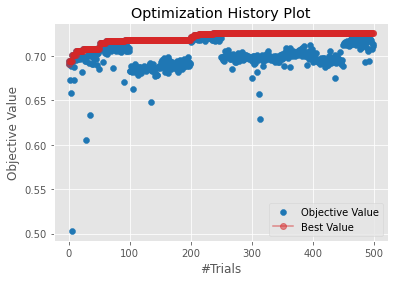

In [67]:
from optuna.visualization.matplotlib import plot_optimization_history

plot_optimization_history(study_lgbm);

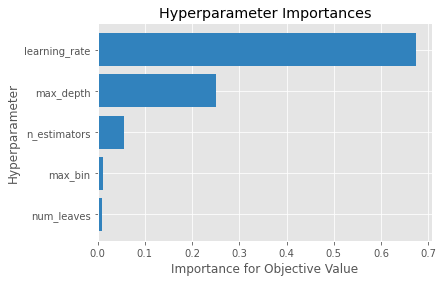

In [68]:
from optuna.visualization.matplotlib import plot_param_importances
plot_param_importances(study_lgbm);

In [69]:
detailed_objective_lgbm_cv(study_lgbm.best_trial, X, Y, Y_class)

                 Metric  Value (average)  Value (std)
0                    R2         0.724337     0.039550
1                    TP        18.000000     2.000000
2                    TN       153.700000     2.263233
3                    FP         3.900000     1.728840
4                    FN        15.400000     1.646545
5              Accuracy         0.898953     0.010486
6             Precision         0.826777     0.061355
7           Sensitivity         0.538455     0.050479
8           Specificity         0.975230     0.011015
9              F1 score         0.650019     0.038619
10  F1 score (weighted)         0.890088     0.011386
11     F1 score (macro)         0.795464     0.021827
12    Balanced Accuracy         0.756845     0.023844
13                  MCC         0.613991     0.042704
14                  NPV         0.909020     0.008706
15              ROC_AUC         0.756845     0.023844


In [70]:
mat_met_lgbm_test['ave'] = mat_met_lgbm_test.iloc[:,1:11].mean(axis='columns', numeric_only=True)
mat_met_lgbm_test['std'] = mat_met_lgbm_test.iloc[:,1:11].std(axis='columns', numeric_only=True)
mat_met_lgbm_test

,Metric,Set0,Set1,Set2,Set3,Set4,Set5,Set6,Set7,Set8,Set9,ave,std
0,R2,0.745041,0.725091,0.720576,0.742078,0.653028,0.716987,0.690088,0.727135,0.680677,0.719926,0.712063,0.028862
1,TP,45.000000,40.000000,32.000000,36.000000,39.000000,39.000000,34.000000,35.000000,38.000000,33.000000,37.100000,3.900142
2,TN,304.000000,308.000000,301.000000,308.000000,305.000000,304.000000,305.000000,305.000000,306.000000,306.000000,305.200000,2.043961
3,FP,9.000000,6.000000,13.000000,7.000000,10.000000,8.000000,10.000000,9.000000,7.000000,9.000000,8.800000,1.988858
4,FN,24.000000,28.000000,36.000000,31.000000,28.000000,31.000000,33.000000,33.000000,31.000000,34.000000,30.900000,3.478505
5,Accuracy,0.913613,0.910995,0.871728,0.900524,0.900524,0.897906,0.887435,0.890052,0.900524,0.887435,0.896073,0.012344
6,Precision,0.833333,0.869565,0.711111,0.837209,0.795918,0.829787,0.772727,0.795455,0.844444,0.785714,0.807527,0.045360
7,Sensitivity,0.652174,0.588235,0.470588,0.537313,0.582090,0.557143,0.507463,0.514706,0.550725,0.492537,0.545297,0.053319
8,Specificity,0.971200,0.980900,0.958600,0.977800,0.968300,0.974400,0.968300,0.971300,0.977600,0.971400,0.971980,0.006310
9,F1 score,0.731707,0.701754,0.566372,0.654545,0.672414,0.666667,0.612613,0.625000,0.666667,0.605505,0.650324,0.048795


In [71]:
#change to fit into these X values 

TP = np.empty(10)
FP = np.empty(10)
TN = np.empty(10)
FN = np.empty(10)

r2_scores_outer = []
Accuracy_outer = []
Precision_outer = [] #Also called Positive Predictive Value(PPV)
Sensitivity_outer = [] # Also called Recall or True Positive Rate (TPR)
Specificity_outer = [] #Also called selectivity or True Negative Rate  (TNR)
f1_scores_outer = []
f1_scores_W_outer = []
f1_scores_M_outer = []
BA_scores_outer = []
MCC_outer = []
NPV_outer = []
ROC_AUC_outer = []

NUM_TRIALS = 5
random_state= [687266, 98656, 56, 280189, 76543] # 
data_lgbm=pd.DataFrame()

for i in range(NUM_TRIALS):
    cv_change = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state[i])
    data_inner = pd.DataFrame({'y_test_idx': pd.Series(dtype='int'),
                   'y_test': pd.Series(dtype='float'),
                   'y_pred': pd.Series(dtype='float')})
    
    
    for idx, (train_idx, test_idx) in enumerate(cv_change.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        eval_set = [(X_train, y_train), (X_test, y_test)]
        optimizedCV_lgbm = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


        #learn
        eval_set = [(X_test, y_test)]
        optimizedCV_lgbm.fit(X_train,
                y_train,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
                          
                  
        #print(test_idx)
        y_pred_optimized_lgbm = optimizedCV_lgbm.predict(X_test) 
        data_inner = data_inner.append(pd.DataFrame({'y_test_idx': test_idx, 'y_test': y_test, 'y_pred_lgbm': y_pred_optimized_lgbm } ), )
        data_inner.reset_index(inplace=True, drop=True) 
        data_inner.sort_values(by='y_test_idx', inplace=True) 
        
        y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
        y_pred_optimized_lgbm_cat = np.where(((y_pred_optimized_lgbm >= 2) | (y_pred_optimized_lgbm <= -2)), 1, 0)
        
        conf_matrix = confusion_matrix(y_test_cat, y_pred_optimized_lgbm_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        
        
        r2_scores_outer.append(r2_score(y_test, y_pred_optimized_lgbm))
        Accuracy_outer.append(accuracy_score(y_test_cat, y_pred_optimized_lgbm_cat))
        Precision_outer.append(precision_score(y_test_cat, y_pred_optimized_lgbm_cat))
        Sensitivity_outer.append(recall_score(y_test_cat, y_pred_optimized_lgbm_cat))
        Specificity_outer.append(round( TN[idx] / (TN[idx]+FP[idx]),4 ))
        f1_scores_outer.append(f1_score(y_test_cat, y_pred_optimized_lgbm_cat))
        f1_scores_W_outer.append(f1_score(y_test_cat, y_pred_optimized_lgbm_cat, average="weighted"))
        f1_scores_M_outer.append(f1_score(y_test_cat, y_pred_optimized_lgbm_cat, average="macro"))
        BA_scores_outer.append(balanced_accuracy_score(y_test_cat, y_pred_optimized_lgbm_cat))
        MCC_outer.append(matthews_corrcoef(y_test_cat, y_pred_optimized_lgbm_cat))
        NPV_outer.append(round( TN[idx] / (TN[idx]+FN[idx]),4 ))
        ROC_AUC_outer.append(roc_auc_score(y_test_cat, y_pred_optimized_lgbm_cat))
        
    data_lgbm['y_test_idx' + str(i)] = data_inner['y_test_idx']
    data_lgbm['y_test' + str(i)] = data_inner['y_test']
    data_lgbm['y_pred_lgbm' + str(i)] = data_inner['y_pred_lgbm']
   # data_lgbm['correct' + str(i)] = correct_value
   # data_lgbm['pred' + str(i)] = y_pred_optimized_lgbm

mat_met_optimized_lgbm = pd.DataFrame({'Metric':['R2','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores_outer), np.mean(Accuracy_outer),np.mean(Precision_outer),
                                           np.mean(Sensitivity_outer),np.mean(Specificity_outer),np.mean(f1_scores_outer),
                                           np.mean(f1_scores_W_outer), np.mean(f1_scores_M_outer), np.mean(BA_scores_outer), 
                                           np.mean(MCC_outer),np.mean(NPV_outer),np.mean(ROC_AUC_outer)],
                        'Value (std)': [np.std(r2_scores_outer, ddof=1), np.std(Accuracy_outer, ddof=1),np.std(Precision_outer, ddof=1),
                                        np.std(Sensitivity_outer,ddof=1),np.std(Specificity_outer,ddof=1),np.std(f1_scores_outer, ddof=1),
                                        np.std(f1_scores_W_outer, ddof=1),np.std(f1_scores_M_outer, ddof=1), np.std(BA_scores_outer, ddof=1), 
                                        np.std(MCC_outer, ddof=1),np.std(NPV_outer, ddof=1),np.std(ROC_AUC_outer, ddof=1)]
                       }) 


lgbm_run0 = data_lgbm[['y_test_idx0', 'y_test0', 'y_pred_lgbm0']]
lgbm_run0.sort_values(by='y_test_idx0', inplace=True)
lgbm_run0.reset_index(inplace=True, drop=True)
lgbm_run1 = data_lgbm[['y_test_idx1', 'y_test1', 'y_pred_lgbm1']]
lgbm_run1.sort_values(by='y_test_idx1', inplace=True)
lgbm_run1.reset_index(inplace=True, drop=True)
lgbm_run2 = data_lgbm[['y_test_idx2', 'y_test2', 'y_pred_lgbm2']]
lgbm_run2.sort_values(by='y_test_idx2', inplace=True)
lgbm_run2.reset_index(inplace=True, drop=True)
lgbm_run3 = data_lgbm[['y_test_idx3', 'y_test3', 'y_pred_lgbm3']]
lgbm_run3.sort_values(by='y_test_idx3', inplace=True)
lgbm_run3.reset_index(inplace=True, drop=True)
lgbm_run4 = data_lgbm[['y_test_idx4', 'y_test4', 'y_pred_lgbm4']]
lgbm_run4.sort_values(by='y_test_idx4', inplace=True)
lgbm_run4.reset_index(inplace=True, drop=True)
chembl_id = df['molecule_chembl_id']
lgbm_5preds = pd.concat([chembl_id, lgbm_run0, lgbm_run1, lgbm_run2, lgbm_run3, lgbm_run4], axis=1)
lgbm_5preds = lgbm_5preds[['molecule_chembl_id','y_test_idx0', 'y_test0', 'y_pred_lgbm0', 'y_pred_lgbm1', 'y_pred_lgbm2', 'y_pred_lgbm3', 'y_pred_lgbm4']]
lgbm_5preds['y_pred_lgbm_ave'] = lgbm_5preds.iloc[:,2:11].mean(axis='columns', numeric_only=True)
lgbm_5preds['y_pred_lgbm_std'] = lgbm_5preds.iloc[:,2:].std(axis='columns', numeric_only=True)
# maybe also calculate the std for each value
lgbm_5preds

,molecule_chembl_id,y_test_idx0,y_test0,y_pred_lgbm0,y_pred_lgbm1,y_pred_lgbm2,y_pred_lgbm3,y_pred_lgbm4,y_pred_lgbm_ave,y_pred_lgbm_std
0,CHEMBL585939,0,-1.19,-0.714486,-0.255430,-0.788424,-0.185674,-0.414071,-0.591347,0.346705
1,CHEMBL96051,1,0.78,1.276888,1.434402,1.308201,1.412354,1.540924,1.292128,0.244732
2,CHEMBL3356916,2,0.30,0.273121,0.348923,0.594428,0.519786,0.734478,0.461789,0.168239
3,CHEMBL3907413,3,0.97,0.585416,0.942361,1.901628,1.103528,0.677827,1.030127,0.427805
4,CHEMBL2047704,4,-2.25,-2.973014,-3.031431,-2.883394,-2.948150,-2.845229,-2.821870,0.262702
...,...,...,...,...,...,...,...,...,...,...
1905,CHEMBL1095136,1905,-1.20,-0.820868,-0.564535,-0.936651,-0.863018,-0.926041,-0.885186,0.187470
1906,CHEMBL2012817,1906,-2.94,-0.542199,-0.954378,0.700284,0.403273,-0.520349,-0.642228,1.175972
1907,CHEMBL496511,1907,0.80,0.980597,1.127518,1.313734,0.978516,0.957668,1.026339,0.159769
1908,CHEMBL3940062,1908,2.27,1.526553,1.155296,1.409799,1.476165,1.091139,1.488159,0.384590


In [72]:
mat_met_optimized_lgbm.to_csv(output/'mat_met_lgbm_opt_withSemiSel.csv')
lgbm_5preds.to_csv(output/'lgbm_5test_CV_result_withSemiSel.csv')

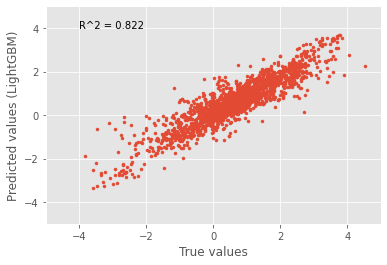

In [73]:
# Scatter plot

limits = -5,5
plt.figsize=(10,10)

plt.scatter(lgbm_5preds['y_test0'], lgbm_5preds['y_pred_lgbm_ave'], marker=".")
lin = np.linspace(*limits, 100)

plt.ylabel("Predicted values (LightGBM)")
plt.xlabel("True values")

plt.xlim(limits)
plt.ylim(limits)

plt.annotate("R^2 = {:.3f}".format(r2_score(lgbm_5preds['y_test0'], lgbm_5preds['y_pred_lgbm_ave'])), (-4, 4))
plt.show()

In [74]:
#cross valide using this optimized LightGBM 
fit_params={'early_stopping_rounds': 50, 
        'eval_set': [(X_tr, Y_tr), (X_te, Y_te)],
            'verbose':False,
           }
#cross valide using this optimized LightGBM 
lgbm_baseline_CVscore = cross_val_score(lgbm_reg, X, Y, cv=10, scoring="r2")
#r2_cv_lgbm_opt_testSet = cross_val_score(optimized_lgbm, X, Y, cv=10, scoring="r2")
r2_cv_lgbm_opt = cross_val_score(optimizedCV_lgbm, X, Y, cv=10, scoring="r2", fit_params=fit_params)
print("LightGBM baseline model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(lgbm_baseline_CVscore), np.std(lgbm_baseline_CVscore, ddof=1)))
#print("LightGBM optimized model (tested on Y_te)r2_score %0.4f with a standard deviation of %0.4f" % (r2_cv_lgbm_opt_testSet.mean(), r2_cv_lgbm_opt_testSet.std()))
print("LightGBM optimized model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(r2_cv_lgbm_opt), np.std(r2_cv_lgbm_opt, ddof=1)))

LightGBM baseline model r2_score 0.7087 with a standard deviation of 0.0478
LightGBM optimized model r2_score 0.7215 with a standard deviation of 0.0436


In [75]:
joblib.dump(lgbm_reg, "./lgbm_reg.joblib")
#joblib.dump(optimized_lgbm, "./optimized_lgbm.joblib")
joblib.dump(optimizedCV_lgbm, "./optimizedCV_lgbm.joblib") 
#loaded_rf = joblib.load("./optimized_rf.joblib")

['./optimizedCV_lgbm.joblib']

## XGBoost

In [76]:
%%time

r2_scores = np.empty(10)
TP =np.empty(10)
TN = np.empty(10)
FP = np.empty(10)
FN = np.empty(10)
Accuracy = np.empty(10)
Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
f1_scores = np.empty(10)
f1_scores_W = np.empty(10)
f1_scores_M = np.empty(10)
BA_scores = np.empty(10)
MCC = np.empty(10)
NPV = np.empty(10)
ROC_AUC= np.empty(10)



for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = Y[train_idx], Y[test_idx]

    xgb_reg = xgb.XGBRegressor(
    objective="reg:squarederror",
    random_state=1121218,
    #n_estimators=10000,  
    tree_method="hist",  # enable histogram binning in XGB
    subsample=0.8, 
    )
    
    eval_set = [(X_train, y_train), (X_test, y_test)]
    xgb_reg.fit(X_train,
                y_train,
    
    eval_set=eval_set,
    eval_metric="rmse",
    early_stopping_rounds=50,
    verbose=False,  # Disable logs
               )

    y_pred = xgb_reg.predict(X_test) 
    # r2 score of the regression model before evaluating categorical evaluation parameters
    r2_scores[idx] = r2_score(y_test, y_pred)
    # now convert the resuls to binary with cutoff 6.3
    y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
    y_pred_cat = np.where(((y_pred >= 2) | (y_pred <= -2)), 1, 0)
    #calculate the evaluation results
    conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
    TP[idx] = conf_matrix[1][1]
    TN[idx] = conf_matrix[0][0]
    FP[idx] = conf_matrix[0][1] 
    FN[idx] = conf_matrix[1][0]
    Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
    Precision[idx] = precision_score(y_test_cat, y_pred_cat)
    Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
    Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
    f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
    f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
    f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
    BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
    MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
    NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
    ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)


mat_met = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores),np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })   
    
print(mat_met)


                 Metric  Value (average)  Value (std)
0                    R2         0.722420     0.042071
1                    TP        17.300000     2.945807
2                    TN       153.500000     2.368778
3                    FP         4.100000     2.233582
4                    FN        16.100000     2.424413
5              Accuracy         0.894241     0.019402
6             Precision         0.812706     0.097307
7           Sensitivity         0.516854     0.078971
8           Specificity         0.974000     0.014109
9              F1 score         0.628782     0.076185
10  F1 score (weighted)         0.884332     0.021516
11     F1 score (macro)         0.783532     0.043284
12    Balanced Accuracy         0.745424     0.041844
13                  MCC         0.592344     0.084341
14                  NPV         0.905200     0.013191
15              ROC_AUC         0.745424     0.041844
CPU times: user 59min 39s, sys: 1.04 s, total: 59min 40s
Wall time: 1min 56s


In [77]:
def objective_xgb_CV(trial, X, Y, Y_class):
    param_grid = {
        
        "n_estimators": trial.suggest_int("n_estimators", 50, 900),
        "eta": trial.suggest_float("eta", 1e-6, 0.1),  
        "max_depth": trial.suggest_int("max_depth", 5, 12),  
        "alpha": trial.suggest_float("alpha", 0, 1, step=1e-04),
        "lambda": trial.suggest_float("lambda", 1,40),
        #"alpha": trial.suggest_float("alpha", 0, 1.0),
        #"lambda": trial.suggest_float("lambda", 1e-8, 40.0),
        "max_bin": trial.suggest_int("max_bin", 250, 500),
    }
    
    
    cv_scores=np.empty(10)
    #y_comb=pd.DataFrame()
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=1121218, booster ="gbtree", tree_method='hist',
                                  **param_grid,  n_jobs=4, subsample=0.8, )
    
        eval_set = [(X_test, y_test)]
        xgb_model.fit(
            X_train,
            y_train,
            eval_set=eval_set,
            eval_metric="rmse",    
            early_stopping_rounds=50,
            verbose=False)
    
        y_pred = xgb_model.predict(X_test)
        cv_scores[idx] = r2_score(y_test, y_pred)
            
    return np.mean(cv_scores)

In [78]:
def detailed_objective_xgb_CV(trial, X, Y, Y_class):
    param_grid = {
        
        "n_estimators": trial.suggest_int("n_estimators", 50, 900),
        "eta": trial.suggest_float("eta", 1e-6, 0.1),  
        "max_depth": trial.suggest_int("max_depth", 5, 12),  
        "alpha": trial.suggest_float("alpha", 0, 1, step=1e-04),
        "lambda": trial.suggest_float("lambda", 1,40),
        #"alpha": trial.suggest_float("alpha", 0, 1.0),
        #"lambda": trial.suggest_float("lambda", 1e-8, 40.0),
        "max_bin": trial.suggest_int("max_bin", 250, 500),
    }
    
    
    r2_scores = np.empty(10)
    TP=np.empty(10)
    TN = np.empty(10)
    FP= np.empty(10)
    FN= np.empty(10)
    Accuracy = np.empty(10)
    Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
    Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
    Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
    f1_scores = np.empty(10)
    f1_scores_W=np.empty(10)
    f1_scores_M=np.empty(10)
    BA_scores = np.empty(10)
    MCC = np.empty(10)
    NPV = np.empty(10)
    ROC_AUC= np.empty(10)
    
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=1121218, booster ="gbtree", tree_method='hist',
                                  **param_grid,  n_jobs=4, subsample=0.8, )
    
        eval_set = [(X_test, y_test)]
        xgb_model.fit(
            X_train,
            y_train,
            eval_set=eval_set,
            eval_metric="rmse",    
            early_stopping_rounds=50,
            verbose=False)
        
        y_pred = xgb_model.predict(X_test)
        # r2 score of the regression model before evaluating categorical evaluation parameters
        r2_scores[idx] = r2_score(y_test, y_pred)
        # convert to categorical values
        y_test_cat = np.where( ((y_test>=2) | (y_test<= -2.0)), 1, 0) 
        y_pred_cat = np.where(((y_pred>=2) | (y_pred<= -2.0)), 1, 0)
       
           
        #calculate parameters
        conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)      
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
        Precision[idx] = precision_score(y_test_cat, y_pred_cat)
        Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
        f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
        MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)

    mat_met = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })   
    
    return (mat_met)   

In [79]:
#Execute optuna and set hyperparameters
study_xgb = optuna.create_study(direction='maximize', study_name="XGBRegressor")
func_xgb_0 = lambda trial: objective_xgb_CV(trial, X_trainSet0, Y_trainSet0, Y_trainSet0_class)
study_xgb.optimize(func_xgb_0, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 07:25:13,632] A new study created in memory with name: XGBRegressor
[I 2023-02-22 07:25:27,509] Trial 0 finished with value: 0.7207669382186664 and parameters: {'n_estimators': 713, 'eta': 0.0546014861815863, 'max_depth': 8, 'alpha': 0.6425000000000001, 'lambda': 35.06832039283391, 'max_bin': 407}. Best is trial 0 with value: 0.7207669382186664.
[I 2023-02-22 07:25:33,948] Trial 1 finished with value: 0.7021512305208821 and parameters: {'n_estimators': 472, 'eta': 0.06314044113455024, 'max_depth': 5, 'alpha': 0.6693, 'lambda': 33.91299816568814, 'max_bin': 358}. Best is trial 0 with value: 0.7207669382186664.
[I 2023-02-22 07:25:38,094] Trial 2 finished with value: 0.2744184776338769 and parameters: {'n_estimators': 115, 'eta': 0.0030980732607482197, 'max_depth': 11, 'alpha': 0.2305, 'lambda': 3.377614226586842, 'max_bin': 290}. Best is trial 0 with value: 0.7207669382186664.
[I 2023-02-22 07:25:49,946] Trial 3 finished with value: 0.6409708833854174 and parameters: {'n_e

[I 2023-02-22 07:30:46,170] Trial 29 finished with value: 0.7213582133735051 and parameters: {'n_estimators': 722, 'eta': 0.03521643690117439, 'max_depth': 8, 'alpha': 0.6204000000000001, 'lambda': 12.661688941655644, 'max_bin': 391}. Best is trial 25 with value: 0.7260302042508978.
[I 2023-02-22 07:31:01,314] Trial 30 finished with value: 0.7248822452139067 and parameters: {'n_estimators': 844, 'eta': 0.053015977879483756, 'max_depth': 10, 'alpha': 0.4728, 'lambda': 22.741245452892223, 'max_bin': 460}. Best is trial 25 with value: 0.7260302042508978.
[I 2023-02-22 07:31:14,723] Trial 31 finished with value: 0.7214175736968808 and parameters: {'n_estimators': 723, 'eta': 0.052101013331770446, 'max_depth': 9, 'alpha': 0.3677, 'lambda': 17.123851424198758, 'max_bin': 479}. Best is trial 25 with value: 0.7260302042508978.
[I 2023-02-22 07:31:27,713] Trial 32 finished with value: 0.7261961297184086 and parameters: {'n_estimators': 815, 'eta': 0.06416837263913072, 'max_depth': 9, 'alpha': 0

	Number of trials: 50.0
	Best value (r2_score): 0.7264
	Best params:
		n_estimators: 806
		eta: 0.048440545216615144
		max_depth: 9
		alpha: 0.3558
		lambda: 14.406132910358032
		max_bin: 487


In [80]:
#Create an instance with tuned hyperparameters

optimized_xgb_0 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=4,
                                    subsample=0.8, 
                                   )
    #learn
eval_set = [(X_testSet0, Y_testSet0)]

optimized_xgb_0.fit(X_trainSet0,Y_trainSet0, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

    # r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_xgb_0 = optimized_xgb_0.predict(X_testSet0)
r2_scores = r2_score(Y_testSet0, y_pred_xgb_0)
# now convert the resuls to binary with cutoff 6.3
Y_testSet0_cat = np.where(((Y_testSet0>=2) | (Y_testSet0<=-2)), 1, 0) 
y_pred_xgb_0_cat = np.where(((y_pred_xgb_0 >= 2) | (y_pred_xgb_0 <= -2)), 1, 0)
    #calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet0_cat, y_pred_xgb_0_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet0_cat, y_pred_xgb_0_cat)
Precision = precision_score(Y_testSet0_cat, y_pred_xgb_0_cat)
Sensitivity = recall_score(Y_testSet0_cat, y_pred_xgb_0_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet0_cat, y_pred_xgb_0_cat)      
f1_scores_W = f1_score(Y_testSet0_cat, y_pred_xgb_0_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet0_cat, y_pred_xgb_0_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet0_cat, y_pred_xgb_0_cat)
MCC = matthews_corrcoef(Y_testSet0_cat, y_pred_xgb_0_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet0_cat, y_pred_xgb_0_cat)
    

mat_met_xgb_test = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Set0':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })    
print(mat_met_xgb_test)


                 Metric        Set0
0                    R2    0.743638
1                    TP   43.000000
2                    TN  305.000000
3                    FP    8.000000
4                    FN   26.000000
5              Accuracy    0.910995
6             Precision    0.843137
7           Sensitivity    0.623188
8           Specificity    0.974400
9              F1 score    0.716667
10  F1 score (weighted)    0.905563
11     F1 score (macro)    0.831936
12    Balanced Accuracy    0.798815
13                  MCC    0.675973
14                  NPV    0.921500
15              ROC_AUC    0.798815


In [81]:
#Execute optuna and set hyperparameters

func_xgb_1 = lambda trial: objective_xgb_CV(trial, X_trainSet1, Y_trainSet1, Y_trainSet1_class)
study_xgb.optimize(func_xgb_1, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 07:35:10,850] Trial 50 finished with value: 0.7053372741752071 and parameters: {'n_estimators': 813, 'eta': 0.012113843628789811, 'max_depth': 7, 'alpha': 0.43570000000000003, 'lambda': 17.174733790554484, 'max_bin': 415}. Best is trial 41 with value: 0.726440942041735.
[I 2023-02-22 07:35:21,024] Trial 51 finished with value: 0.7305840345666594 and parameters: {'n_estimators': 394, 'eta': 0.06446547002246494, 'max_depth': 10, 'alpha': 0.2592, 'lambda': 27.453509530451154, 'max_bin': 449}. Best is trial 51 with value: 0.7305840345666594.
[I 2023-02-22 07:35:30,276] Trial 52 finished with value: 0.7277488161285154 and parameters: {'n_estimators': 376, 'eta': 0.053953105809956714, 'max_depth': 9, 'alpha': 0.15990000000000001, 'lambda': 20.659618017057753, 'max_bin': 485}. Best is trial 51 with value: 0.7305840345666594.
[I 2023-02-22 07:35:39,697] Trial 53 finished with value: 0.7315314053262874 and parameters: {'n_estimators': 437, 'eta': 0.0712784556567793, 'max_depth': 9

[I 2023-02-22 07:39:56,656] Trial 79 finished with value: 0.7326214781123309 and parameters: {'n_estimators': 296, 'eta': 0.09666323819707767, 'max_depth': 12, 'alpha': 0.1829, 'lambda': 33.82879908933694, 'max_bin': 398}. Best is trial 67 with value: 0.7372846414475894.
[I 2023-02-22 07:40:02,639] Trial 80 finished with value: 0.7272967168763469 and parameters: {'n_estimators': 171, 'eta': 0.09964676754434804, 'max_depth': 11, 'alpha': 0.039900000000000005, 'lambda': 38.16679741618924, 'max_bin': 443}. Best is trial 67 with value: 0.7372846414475894.
[I 2023-02-22 07:40:12,185] Trial 81 finished with value: 0.734557352559462 and parameters: {'n_estimators': 273, 'eta': 0.0919275984044568, 'max_depth': 12, 'alpha': 0.0548, 'lambda': 39.58622002503617, 'max_bin': 437}. Best is trial 67 with value: 0.7372846414475894.
[I 2023-02-22 07:40:21,954] Trial 82 finished with value: 0.7319285788815129 and parameters: {'n_estimators': 288, 'eta': 0.09265536403492988, 'max_depth': 12, 'alpha': 0.1

	Number of trials: 100.0
	Best value (r2_score): 0.7373
	Best params:
		n_estimators: 281
		eta: 0.09991575107965912
		max_depth: 12
		alpha: 0.11860000000000001
		lambda: 39.52636832968151
		max_bin: 438


In [82]:
optimized_xgb_1 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=4,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet1, Y_testSet1)]
optimized_xgb_1.fit(X_trainSet1,Y_trainSet1, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_1 = optimized_xgb_1.predict(X_testSet1)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet1, y_pred_xgb_1)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet1 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_xgb_1_cat = np.where(((y_pred_xgb_1 >= 2) | (y_pred_xgb_1 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet1_cat, y_pred_xgb_1_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet1_cat, y_pred_xgb_1_cat)
Precision = precision_score(Y_testSet1_cat, y_pred_xgb_1_cat)
Sensitivity = recall_score(Y_testSet1_cat, y_pred_xgb_1_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet1_cat, y_pred_xgb_1_cat)      
f1_scores_W = f1_score(Y_testSet1_cat, y_pred_xgb_1_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet1_cat, y_pred_xgb_1_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet1_cat, y_pred_xgb_1_cat)
MCC = matthews_corrcoef(Y_testSet1_cat, y_pred_xgb_1_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet1_cat, y_pred_xgb_1_cat)


set1 = pd.DataFrame({ 'Set1':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set1'] =set1
print(mat_met_xgb_test)


                 Metric        Set0        Set1
0                    R2    0.743638    0.730201
1                    TP   43.000000   43.000000
2                    TN  305.000000  305.000000
3                    FP    8.000000    9.000000
4                    FN   26.000000   25.000000
5              Accuracy    0.910995    0.910995
6             Precision    0.843137    0.826923
7           Sensitivity    0.623188    0.632353
8           Specificity    0.974400    0.971300
9              F1 score    0.716667    0.716667
10  F1 score (weighted)    0.905563    0.906167
11     F1 score (macro)    0.831936    0.831936
12    Balanced Accuracy    0.798815    0.801845
13                  MCC    0.675973    0.673403
14                  NPV    0.921500    0.924200
15              ROC_AUC    0.798815    0.801845


In [83]:
#Execute optuna and set hyperparameters
func_xgb_2 = lambda trial: objective_xgb_CV(trial, X_trainSet2, Y_trainSet2, Y_trainSet2_class)
study_xgb.optimize(func_xgb_2, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 07:43:10,849] Trial 100 finished with value: 0.7176671196253248 and parameters: {'n_estimators': 270, 'eta': 0.08870352333317158, 'max_depth': 12, 'alpha': 0.9503, 'lambda': 37.87255021354108, 'max_bin': 416}. Best is trial 67 with value: 0.7372846414475894.
[I 2023-02-22 07:43:20,915] Trial 101 finished with value: 0.7212905296454132 and parameters: {'n_estimators': 324, 'eta': 0.08595139096906346, 'max_depth': 11, 'alpha': 0.09620000000000001, 'lambda': 36.536350002680784, 'max_bin': 425}. Best is trial 67 with value: 0.7372846414475894.
[I 2023-02-22 07:43:31,815] Trial 102 finished with value: 0.7208719439997612 and parameters: {'n_estimators': 359, 'eta': 0.09419527942775346, 'max_depth': 11, 'alpha': 0.0819, 'lambda': 31.922331596523268, 'max_bin': 387}. Best is trial 67 with value: 0.7372846414475894.
[I 2023-02-22 07:43:40,622] Trial 103 finished with value: 0.7185152606100569 and parameters: {'n_estimators': 289, 'eta': 0.09161432962759354, 'max_depth': 11, 'alph

[I 2023-02-22 07:48:26,521] Trial 129 finished with value: 0.7190043891959154 and parameters: {'n_estimators': 335, 'eta': 0.07865824031722175, 'max_depth': 10, 'alpha': 0.0666, 'lambda': 33.768237426806614, 'max_bin': 402}. Best is trial 67 with value: 0.7372846414475894.
[I 2023-02-22 07:48:35,637] Trial 130 finished with value: 0.718313189738183 and parameters: {'n_estimators': 254, 'eta': 0.09316497417916889, 'max_depth': 12, 'alpha': 0.17900000000000002, 'lambda': 36.02311094561626, 'max_bin': 423}. Best is trial 67 with value: 0.7372846414475894.
[I 2023-02-22 07:48:45,581] Trial 131 finished with value: 0.7141632564717437 and parameters: {'n_estimators': 279, 'eta': 0.0869509630979066, 'max_depth': 12, 'alpha': 0.026500000000000003, 'lambda': 39.80638233809472, 'max_bin': 439}. Best is trial 67 with value: 0.7372846414475894.
[I 2023-02-22 07:48:53,855] Trial 132 finished with value: 0.7161197596332352 and parameters: {'n_estimators': 228, 'eta': 0.0850231553281797, 'max_depth':

	Number of trials: 150.0
	Best value (r2_score): 0.7373
	Best params:
		n_estimators: 281
		eta: 0.09991575107965912
		max_depth: 12
		alpha: 0.11860000000000001
		lambda: 39.52636832968151
		max_bin: 438


In [84]:
optimized_xgb_2 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=4,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet2, Y_testSet2)]
optimized_xgb_2.fit(X_trainSet2,Y_trainSet2, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_2 = optimized_xgb_2.predict(X_testSet2)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet2, y_pred_xgb_2)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet2 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_xgb_2_cat = np.where(((y_pred_xgb_2 >= 2) | (y_pred_xgb_2 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet2_cat, y_pred_xgb_2_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet2_cat, y_pred_xgb_2_cat)
Precision = precision_score(Y_testSet2_cat, y_pred_xgb_2_cat)
Sensitivity = recall_score(Y_testSet2_cat, y_pred_xgb_2_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet2_cat, y_pred_xgb_2_cat)      
f1_scores_W = f1_score(Y_testSet2_cat, y_pred_xgb_2_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet2_cat, y_pred_xgb_2_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet2_cat, y_pred_xgb_2_cat)
MCC = matthews_corrcoef(Y_testSet2_cat, y_pred_xgb_2_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet2_cat, y_pred_xgb_2_cat)


Set2 = pd.DataFrame({ 'Set2':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set2'] =Set2
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2
0                    R2    0.743638    0.730201    0.745800
1                    TP   43.000000   43.000000   35.000000
2                    TN  305.000000  305.000000  299.000000
3                    FP    8.000000    9.000000   15.000000
4                    FN   26.000000   25.000000   33.000000
5              Accuracy    0.910995    0.910995    0.874346
6             Precision    0.843137    0.826923    0.700000
7           Sensitivity    0.623188    0.632353    0.514706
8           Specificity    0.974400    0.971300    0.952200
9              F1 score    0.716667    0.716667    0.593220
10  F1 score (weighted)    0.905563    0.906167    0.866512
11     F1 score (macro)    0.831936    0.831936    0.759458
12    Balanced Accuracy    0.798815    0.801845    0.733468
13                  MCC    0.675973    0.673403    0.529568
14                  NPV    0.921500    0.924200    0.900600
15              ROC_AUC    0.798815    0

In [85]:
#Execute optuna and set hyperparameters
func_xgb_3 = lambda trial: objective_xgb_CV(trial, X_trainSet3, Y_trainSet3, Y_trainSet3_class)
study_xgb.optimize(func_xgb_3, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 07:51:59,411] Trial 150 finished with value: 0.7271042386428457 and parameters: {'n_estimators': 476, 'eta': 0.08598441953304929, 'max_depth': 12, 'alpha': 0.07970000000000001, 'lambda': 23.770551484940906, 'max_bin': 437}. Best is trial 67 with value: 0.7372846414475894.
[I 2023-02-22 07:52:08,358] Trial 151 finished with value: 0.7253810023280864 and parameters: {'n_estimators': 252, 'eta': 0.09690383075080686, 'max_depth': 12, 'alpha': 0.0403, 'lambda': 35.35817675668797, 'max_bin': 411}. Best is trial 67 with value: 0.7372846414475894.
[I 2023-02-22 07:52:17,395] Trial 152 finished with value: 0.7210084191789192 and parameters: {'n_estimators': 256, 'eta': 0.09960476149080222, 'max_depth': 12, 'alpha': 0.0195, 'lambda': 37.331532401076686, 'max_bin': 418}. Best is trial 67 with value: 0.7372846414475894.
[I 2023-02-22 07:52:25,085] Trial 153 finished with value: 0.7232502814891393 and parameters: {'n_estimators': 214, 'eta': 0.09401309707876716, 'max_depth': 12, 'alph

[I 2023-02-22 07:56:22,794] Trial 178 finished with value: 0.7251952623705149 and parameters: {'n_estimators': 512, 'eta': 0.09224031046840178, 'max_depth': 11, 'alpha': 0.06620000000000001, 'lambda': 37.70175663665791, 'max_bin': 446}. Best is trial 67 with value: 0.7372846414475894.
[I 2023-02-22 07:56:30,501] Trial 179 finished with value: 0.7206945094750705 and parameters: {'n_estimators': 271, 'eta': 0.08675051250294777, 'max_depth': 10, 'alpha': 0.0179, 'lambda': 39.98684010463155, 'max_bin': 437}. Best is trial 67 with value: 0.7372846414475894.
[I 2023-02-22 07:56:39,755] Trial 180 finished with value: 0.7213011698640743 and parameters: {'n_estimators': 307, 'eta': 0.09011935244033596, 'max_depth': 12, 'alpha': 0.7634000000000001, 'lambda': 33.25588682282923, 'max_bin': 431}. Best is trial 67 with value: 0.7372846414475894.
[I 2023-02-22 07:56:47,779] Trial 181 finished with value: 0.7204859709675048 and parameters: {'n_estimators': 237, 'eta': 0.09290058861557889, 'max_depth':

	Number of trials: 200.0
	Best value (r2_score): 0.7373
	Best params:
		n_estimators: 281
		eta: 0.09991575107965912
		max_depth: 12
		alpha: 0.11860000000000001
		lambda: 39.52636832968151
		max_bin: 438


In [86]:
optimized_xgb_3 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=4,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet3, Y_testSet3)]
optimized_xgb_3.fit(X_trainSet3,Y_trainSet3, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_3 = optimized_xgb_3.predict(X_testSet3)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet3, y_pred_xgb_3)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet3 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_xgb_3_cat = np.where(((y_pred_xgb_3 >= 2) | (y_pred_xgb_3 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet3_cat, y_pred_xgb_3_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet3_cat, y_pred_xgb_3_cat)
Precision = precision_score(Y_testSet3_cat, y_pred_xgb_3_cat)
Sensitivity = recall_score(Y_testSet3_cat, y_pred_xgb_3_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet3_cat, y_pred_xgb_3_cat)      
f1_scores_W = f1_score(Y_testSet3_cat, y_pred_xgb_3_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet3_cat, y_pred_xgb_3_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet3_cat, y_pred_xgb_3_cat)
MCC = matthews_corrcoef(Y_testSet3_cat, y_pred_xgb_3_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet3_cat, y_pred_xgb_3_cat)


Set3 = pd.DataFrame({ 'Set3':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set3'] =Set3
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3
0                    R2    0.743638    0.730201    0.745800    0.748070
1                    TP   43.000000   43.000000   35.000000   36.000000
2                    TN  305.000000  305.000000  299.000000  300.000000
3                    FP    8.000000    9.000000   15.000000   15.000000
4                    FN   26.000000   25.000000   33.000000   31.000000
5              Accuracy    0.910995    0.910995    0.874346    0.879581
6             Precision    0.843137    0.826923    0.700000    0.705882
7           Sensitivity    0.623188    0.632353    0.514706    0.537313
8           Specificity    0.974400    0.971300    0.952200    0.952400
9              F1 score    0.716667    0.716667    0.593220    0.610169
10  F1 score (weighted)    0.905563    0.906167    0.866512    0.872908
11     F1 score (macro)    0.831936    0.831936    0.759458    0.769481
12    Balanced Accuracy    0.798815    0.801845    0.733468    0

In [87]:
#Execute optuna and set hyperparameters
func_xgb_4 = lambda trial: objective_xgb_CV(trial, X_trainSet4, Y_trainSet4, Y_trainSet4_class)
study_xgb.optimize(func_xgb_4, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 07:59:45,262] Trial 200 finished with value: 0.7116560970043829 and parameters: {'n_estimators': 260, 'eta': 0.08365857037946006, 'max_depth': 5, 'alpha': 0.046900000000000004, 'lambda': 33.25842399546457, 'max_bin': 413}. Best is trial 67 with value: 0.7372846414475894.
[I 2023-02-22 07:59:56,287] Trial 201 finished with value: 0.7398814228623598 and parameters: {'n_estimators': 404, 'eta': 0.08480651831012566, 'max_depth': 12, 'alpha': 0.095, 'lambda': 31.690019609250456, 'max_bin': 426}. Best is trial 201 with value: 0.7398814228623598.
[I 2023-02-22 08:00:07,654] Trial 202 finished with value: 0.7455406770366659 and parameters: {'n_estimators': 408, 'eta': 0.08777846500101312, 'max_depth': 12, 'alpha': 0.11, 'lambda': 31.855553059350896, 'max_bin': 422}. Best is trial 202 with value: 0.7455406770366659.
[I 2023-02-22 08:00:19,433] Trial 203 finished with value: 0.7409558561657154 and parameters: {'n_estimators': 404, 'eta': 0.08540856010032605, 'max_depth': 12, 'alpha

[I 2023-02-22 08:05:20,148] Trial 229 finished with value: 0.7402759623458556 and parameters: {'n_estimators': 425, 'eta': 0.07013892719836781, 'max_depth': 12, 'alpha': 0.262, 'lambda': 27.842489772412293, 'max_bin': 403}. Best is trial 202 with value: 0.7455406770366659.
[I 2023-02-22 08:05:31,301] Trial 230 finished with value: 0.7418320728791638 and parameters: {'n_estimators': 427, 'eta': 0.06894401053859586, 'max_depth': 12, 'alpha': 0.2635, 'lambda': 27.858941270858303, 'max_bin': 408}. Best is trial 202 with value: 0.7455406770366659.
[I 2023-02-22 08:05:42,992] Trial 231 finished with value: 0.741366215622677 and parameters: {'n_estimators': 425, 'eta': 0.06936932747199634, 'max_depth': 12, 'alpha': 0.2669, 'lambda': 27.782243276023873, 'max_bin': 404}. Best is trial 202 with value: 0.7455406770366659.
[I 2023-02-22 08:05:54,280] Trial 232 finished with value: 0.7431769365838206 and parameters: {'n_estimators': 387, 'eta': 0.06676478601345803, 'max_depth': 12, 'alpha': 0.2788,

	Number of trials: 250.0
	Best value (r2_score): 0.7455
	Best params:
		n_estimators: 408
		eta: 0.08777846500101312
		max_depth: 12
		alpha: 0.11
		lambda: 31.855553059350896
		max_bin: 422


In [88]:
optimized_xgb_4 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=4,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet4, Y_testSet4)]
optimized_xgb_4.fit(X_trainSet4,Y_trainSet4, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_4 = optimized_xgb_4.predict(X_testSet4)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet4, y_pred_xgb_4)
# now convert the resuls to binary with cutoff 6.4
#Y_trainSet4 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_xgb_4_cat = np.where(((y_pred_xgb_4 >= 2) | (y_pred_xgb_4 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet4_cat, y_pred_xgb_4_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet4_cat, y_pred_xgb_4_cat)
Precision = precision_score(Y_testSet4_cat, y_pred_xgb_4_cat)
Sensitivity = recall_score(Y_testSet4_cat, y_pred_xgb_4_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet4_cat, y_pred_xgb_4_cat)      
f1_scores_W = f1_score(Y_testSet4_cat, y_pred_xgb_4_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet4_cat, y_pred_xgb_4_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet4_cat, y_pred_xgb_4_cat)
MCC = matthews_corrcoef(Y_testSet4_cat, y_pred_xgb_4_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet4_cat, y_pred_xgb_4_cat)


Set4 = pd.DataFrame({ 'Set4':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set4'] =Set4
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.743638    0.730201    0.745800    0.748070   
1                    TP   43.000000   43.000000   35.000000   36.000000   
2                    TN  305.000000  305.000000  299.000000  300.000000   
3                    FP    8.000000    9.000000   15.000000   15.000000   
4                    FN   26.000000   25.000000   33.000000   31.000000   
5              Accuracy    0.910995    0.910995    0.874346    0.879581   
6             Precision    0.843137    0.826923    0.700000    0.705882   
7           Sensitivity    0.623188    0.632353    0.514706    0.537313   
8           Specificity    0.974400    0.971300    0.952200    0.952400   
9              F1 score    0.716667    0.716667    0.593220    0.610169   
10  F1 score (weighted)    0.905563    0.906167    0.866512    0.872908   
11     F1 score (macro)    0.831936    0.831936    0.759458    0.769481   
12    Balanced Accuracy  

In [89]:
#Execute optuna and set hyperparameters
func_xgb_5 = lambda trial: objective_xgb_CV(trial, X_trainSet5, Y_trainSet5, Y_trainSet5_class)
study_xgb.optimize(func_xgb_5, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 08:09:23,412] Trial 250 finished with value: 0.7205864851125388 and parameters: {'n_estimators': 432, 'eta': 0.06235147521659232, 'max_depth': 12, 'alpha': 0.32020000000000004, 'lambda': 24.339937346644035, 'max_bin': 371}. Best is trial 202 with value: 0.7455406770366659.
[I 2023-02-22 08:09:33,899] Trial 251 finished with value: 0.7223381701068096 and parameters: {'n_estimators': 388, 'eta': 0.06973620893869859, 'max_depth': 12, 'alpha': 0.3493, 'lambda': 25.8346431505001, 'max_bin': 383}. Best is trial 202 with value: 0.7455406770366659.
[I 2023-02-22 08:09:44,828] Trial 252 finished with value: 0.7233818212649784 and parameters: {'n_estimators': 374, 'eta': 0.06548837282799881, 'max_depth': 12, 'alpha': 0.29000000000000004, 'lambda': 27.245017042574787, 'max_bin': 385}. Best is trial 202 with value: 0.7455406770366659.
[I 2023-02-22 08:09:52,215] Trial 253 finished with value: 0.7112876645056272 and parameters: {'n_estimators': 390, 'eta': 0.05788085054508, 'max_depth

[I 2023-02-22 08:14:38,900] Trial 279 finished with value: 0.7210801652727612 and parameters: {'n_estimators': 359, 'eta': 0.06933766463067936, 'max_depth': 12, 'alpha': 0.2843, 'lambda': 27.3650484488378, 'max_bin': 405}. Best is trial 202 with value: 0.7455406770366659.
[I 2023-02-22 08:14:49,546] Trial 280 finished with value: 0.7201861454795335 and parameters: {'n_estimators': 423, 'eta': 0.06538037986008156, 'max_depth': 12, 'alpha': 0.19210000000000002, 'lambda': 24.98421580549584, 'max_bin': 397}. Best is trial 202 with value: 0.7455406770366659.
[I 2023-02-22 08:15:01,257] Trial 281 finished with value: 0.7208889825370497 and parameters: {'n_estimators': 379, 'eta': 0.06325420017886095, 'max_depth': 12, 'alpha': 0.32080000000000003, 'lambda': 30.75710166086431, 'max_bin': 375}. Best is trial 202 with value: 0.7455406770366659.
[I 2023-02-22 08:15:13,923] Trial 282 finished with value: 0.7216592653015349 and parameters: {'n_estimators': 399, 'eta': 0.05583080057259436, 'max_dept

	Number of trials: 300.0
	Best value (r2_score): 0.7455
	Best params:
		n_estimators: 408
		eta: 0.08777846500101312
		max_depth: 12
		alpha: 0.11
		lambda: 31.855553059350896
		max_bin: 422


In [90]:
optimized_xgb_5 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=4,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet5, Y_testSet5)]
optimized_xgb_5.fit(X_trainSet5,Y_trainSet5, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_5 = optimized_xgb_5.predict(X_testSet5)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet5, y_pred_xgb_5)
# now convert the resuls to binary with cutoff 6.5
#Y_trainSet5 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_xgb_5_cat = np.where(((y_pred_xgb_5 >= 2) | (y_pred_xgb_5 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet5_cat, y_pred_xgb_5_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet5_cat, y_pred_xgb_5_cat)
Precision = precision_score(Y_testSet5_cat, y_pred_xgb_5_cat)
Sensitivity = recall_score(Y_testSet5_cat, y_pred_xgb_5_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet5_cat, y_pred_xgb_5_cat)      
f1_scores_W = f1_score(Y_testSet5_cat, y_pred_xgb_5_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet5_cat, y_pred_xgb_5_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet5_cat, y_pred_xgb_5_cat)
MCC = matthews_corrcoef(Y_testSet5_cat, y_pred_xgb_5_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet5_cat, y_pred_xgb_5_cat)


Set5 = pd.DataFrame({ 'Set5':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set5'] =Set5
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.743638    0.730201    0.745800    0.748070   
1                    TP   43.000000   43.000000   35.000000   36.000000   
2                    TN  305.000000  305.000000  299.000000  300.000000   
3                    FP    8.000000    9.000000   15.000000   15.000000   
4                    FN   26.000000   25.000000   33.000000   31.000000   
5              Accuracy    0.910995    0.910995    0.874346    0.879581   
6             Precision    0.843137    0.826923    0.700000    0.705882   
7           Sensitivity    0.623188    0.632353    0.514706    0.537313   
8           Specificity    0.974400    0.971300    0.952200    0.952400   
9              F1 score    0.716667    0.716667    0.593220    0.610169   
10  F1 score (weighted)    0.905563    0.906167    0.866512    0.872908   
11     F1 score (macro)    0.831936    0.831936    0.759458    0.769481   
12    Balanced Accuracy  

In [91]:
#Execute optuna and set hyperparameters
func_xgb_6 = lambda trial: objective_xgb_CV(trial, X_trainSet6, Y_trainSet6, Y_trainSet6_class)
study_xgb.optimize(func_xgb_6, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 08:18:28,594] Trial 300 finished with value: 0.7151087338799724 and parameters: {'n_estimators': 397, 'eta': 0.06698171064069713, 'max_depth': 12, 'alpha': 0.2558, 'lambda': 29.48726107807855, 'max_bin': 400}. Best is trial 202 with value: 0.7455406770366659.
[I 2023-02-22 08:18:40,556] Trial 301 finished with value: 0.7199529950537316 and parameters: {'n_estimators': 375, 'eta': 0.07501881073584357, 'max_depth': 12, 'alpha': 0.31970000000000004, 'lambda': 25.988131557216487, 'max_bin': 413}. Best is trial 202 with value: 0.7455406770366659.
[I 2023-02-22 08:18:51,910] Trial 302 finished with value: 0.7193977184525979 and parameters: {'n_estimators': 414, 'eta': 0.0712932965457246, 'max_depth': 12, 'alpha': 0.3553, 'lambda': 26.918978446853675, 'max_bin': 382}. Best is trial 202 with value: 0.7455406770366659.
[I 2023-02-22 08:19:01,443] Trial 303 finished with value: 0.7182892549105955 and parameters: {'n_estimators': 444, 'eta': 0.0645886108068791, 'max_depth': 8, 'alph

[I 2023-02-22 08:24:06,255] Trial 329 finished with value: 0.7172794961430121 and parameters: {'n_estimators': 368, 'eta': 0.06704907139082043, 'max_depth': 12, 'alpha': 0.29650000000000004, 'lambda': 29.33430643593273, 'max_bin': 423}. Best is trial 202 with value: 0.7455406770366659.
[I 2023-02-22 08:24:16,803] Trial 330 finished with value: 0.7173995075314864 and parameters: {'n_estimators': 429, 'eta': 0.07197082233383048, 'max_depth': 12, 'alpha': 0.31570000000000004, 'lambda': 18.000658288639244, 'max_bin': 416}. Best is trial 202 with value: 0.7455406770366659.
[I 2023-02-22 08:24:27,371] Trial 331 finished with value: 0.7161075796509108 and parameters: {'n_estimators': 386, 'eta': 0.07470991911902217, 'max_depth': 12, 'alpha': 0.2619, 'lambda': 27.53436822049579, 'max_bin': 407}. Best is trial 202 with value: 0.7455406770366659.
[I 2023-02-22 08:24:42,218] Trial 332 finished with value: 0.7099039870997798 and parameters: {'n_estimators': 409, 'eta': 0.024012968715142444, 'max_d

	Number of trials: 350.0
	Best value (r2_score): 0.7455
	Best params:
		n_estimators: 408
		eta: 0.08777846500101312
		max_depth: 12
		alpha: 0.11
		lambda: 31.855553059350896
		max_bin: 422


In [92]:
optimized_xgb_6 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=4,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet6, Y_testSet6)]
optimized_xgb_6.fit(X_trainSet6,Y_trainSet6, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_6 = optimized_xgb_6.predict(X_testSet6)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet6, y_pred_xgb_6)
# now convert the resuls to binary with cutoff 6.6
#Y_trainSet6 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_xgb_6_cat = np.where(((y_pred_xgb_6 >= 2) | (y_pred_xgb_6 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet6_cat, y_pred_xgb_6_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet6_cat, y_pred_xgb_6_cat)
Precision = precision_score(Y_testSet6_cat, y_pred_xgb_6_cat)
Sensitivity = recall_score(Y_testSet6_cat, y_pred_xgb_6_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet6_cat, y_pred_xgb_6_cat)      
f1_scores_W = f1_score(Y_testSet6_cat, y_pred_xgb_6_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet6_cat, y_pred_xgb_6_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet6_cat, y_pred_xgb_6_cat)
MCC = matthews_corrcoef(Y_testSet6_cat, y_pred_xgb_6_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet6_cat, y_pred_xgb_6_cat)


Set6 = pd.DataFrame({ 'Set6':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set6'] =Set6
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.743638    0.730201    0.745800    0.748070   
1                    TP   43.000000   43.000000   35.000000   36.000000   
2                    TN  305.000000  305.000000  299.000000  300.000000   
3                    FP    8.000000    9.000000   15.000000   15.000000   
4                    FN   26.000000   25.000000   33.000000   31.000000   
5              Accuracy    0.910995    0.910995    0.874346    0.879581   
6             Precision    0.843137    0.826923    0.700000    0.705882   
7           Sensitivity    0.623188    0.632353    0.514706    0.537313   
8           Specificity    0.974400    0.971300    0.952200    0.952400   
9              F1 score    0.716667    0.716667    0.593220    0.610169   
10  F1 score (weighted)    0.905563    0.906167    0.866512    0.872908   
11     F1 score (macro)    0.831936    0.831936    0.759458    0.769481   
12    Balanced Accuracy  

In [93]:
#Execute optuna and set hyperparameters
func_xgb_7 = lambda trial: objective_xgb_CV(trial, X_trainSet7, Y_trainSet7, Y_trainSet7_class)
study_xgb.optimize(func_xgb_7, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 08:28:19,107] Trial 350 finished with value: 0.726485770011792 and parameters: {'n_estimators': 385, 'eta': 0.06904974743083539, 'max_depth': 12, 'alpha': 0.23750000000000002, 'lambda': 24.63939595479541, 'max_bin': 358}. Best is trial 202 with value: 0.7455406770366659.
[I 2023-02-22 08:28:30,109] Trial 351 finished with value: 0.7252667518259528 and parameters: {'n_estimators': 356, 'eta': 0.07212546928945315, 'max_depth': 12, 'alpha': 0.3229, 'lambda': 26.20936461727509, 'max_bin': 426}. Best is trial 202 with value: 0.7455406770366659.
[I 2023-02-22 08:28:42,017] Trial 352 finished with value: 0.7231845844724702 and parameters: {'n_estimators': 398, 'eta': 0.07492071073292766, 'max_depth': 12, 'alpha': 0.2713, 'lambda': 27.1930406626295, 'max_bin': 255}. Best is trial 202 with value: 0.7455406770366659.
[I 2023-02-22 08:28:55,134] Trial 353 finished with value: 0.7252597709529376 and parameters: {'n_estimators': 469, 'eta': 0.06529038136092528, 'max_depth': 12, 'alpha

[I 2023-02-22 08:33:59,433] Trial 379 finished with value: 0.7210820049893865 and parameters: {'n_estimators': 462, 'eta': 0.0794489253997296, 'max_depth': 12, 'alpha': 0.2647, 'lambda': 31.126287223730227, 'max_bin': 424}. Best is trial 202 with value: 0.7455406770366659.
[I 2023-02-22 08:34:11,673] Trial 380 finished with value: 0.7243267659662564 and parameters: {'n_estimators': 409, 'eta': 0.07065166185132313, 'max_depth': 12, 'alpha': 0.2286, 'lambda': 27.393795245215113, 'max_bin': 370}. Best is trial 202 with value: 0.7455406770366659.
[I 2023-02-22 08:34:16,878] Trial 381 finished with value: 0.7024268997538027 and parameters: {'n_estimators': 382, 'eta': 0.07306342516826443, 'max_depth': 5, 'alpha': 0.3252, 'lambda': 29.562983369908945, 'max_bin': 395}. Best is trial 202 with value: 0.7455406770366659.
[I 2023-02-22 08:34:28,226] Trial 382 finished with value: 0.7243232385687222 and parameters: {'n_estimators': 425, 'eta': 0.07758411104451071, 'max_depth': 12, 'alpha': 0.281, 

	Number of trials: 400.0
	Best value (r2_score): 0.7455
	Best params:
		n_estimators: 408
		eta: 0.08777846500101312
		max_depth: 12
		alpha: 0.11
		lambda: 31.855553059350896
		max_bin: 422


In [94]:
optimized_xgb_7 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=4,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet7, Y_testSet7)]
optimized_xgb_7.fit(X_trainSet7,Y_trainSet7, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_7 = optimized_xgb_7.predict(X_testSet7)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet7, y_pred_xgb_7)
# now convert the resuls to binary with cutoff 6.7
#Y_trainSet7 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_xgb_7_cat = np.where(((y_pred_xgb_7 >= 2) | (y_pred_xgb_7 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet7_cat, y_pred_xgb_7_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet7_cat, y_pred_xgb_7_cat)
Precision = precision_score(Y_testSet7_cat, y_pred_xgb_7_cat)
Sensitivity = recall_score(Y_testSet7_cat, y_pred_xgb_7_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet7_cat, y_pred_xgb_7_cat)      
f1_scores_W = f1_score(Y_testSet7_cat, y_pred_xgb_7_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet7_cat, y_pred_xgb_7_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet7_cat, y_pred_xgb_7_cat)
MCC = matthews_corrcoef(Y_testSet7_cat, y_pred_xgb_7_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet7_cat, y_pred_xgb_7_cat)


Set7 = pd.DataFrame({ 'Set7':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set7'] =Set7
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.743638    0.730201    0.745800    0.748070   
1                    TP   43.000000   43.000000   35.000000   36.000000   
2                    TN  305.000000  305.000000  299.000000  300.000000   
3                    FP    8.000000    9.000000   15.000000   15.000000   
4                    FN   26.000000   25.000000   33.000000   31.000000   
5              Accuracy    0.910995    0.910995    0.874346    0.879581   
6             Precision    0.843137    0.826923    0.700000    0.705882   
7           Sensitivity    0.623188    0.632353    0.514706    0.537313   
8           Specificity    0.974400    0.971300    0.952200    0.952400   
9              F1 score    0.716667    0.716667    0.593220    0.610169   
10  F1 score (weighted)    0.905563    0.906167    0.866512    0.872908   
11     F1 score (macro)    0.831936    0.831936    0.759458    0.769481   
12    Balanced Accuracy  

In [95]:
#Execute optuna and set hyperparameters
func_xgb_8 = lambda trial: objective_xgb_CV(trial, X_trainSet8, Y_trainSet8, Y_trainSet8_class)
study_xgb.optimize(func_xgb_8, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 08:38:00,387] Trial 400 finished with value: 0.7167709763516326 and parameters: {'n_estimators': 381, 'eta': 0.07677247604215687, 'max_depth': 12, 'alpha': 0.3254, 'lambda': 28.048126230625616, 'max_bin': 388}. Best is trial 202 with value: 0.7455406770366659.
[I 2023-02-22 08:38:11,254] Trial 401 finished with value: 0.7182557360105039 and parameters: {'n_estimators': 359, 'eta': 0.06633009870560744, 'max_depth': 12, 'alpha': 0.29050000000000004, 'lambda': 28.868106670296182, 'max_bin': 421}. Best is trial 202 with value: 0.7455406770366659.
[I 2023-02-22 08:38:23,114] Trial 402 finished with value: 0.71801511957984 and parameters: {'n_estimators': 765, 'eta': 0.07112227545713067, 'max_depth': 12, 'alpha': 0.1779, 'lambda': 29.95617851058406, 'max_bin': 413}. Best is trial 202 with value: 0.7455406770366659.
[I 2023-02-22 08:38:33,990] Trial 403 finished with value: 0.7200887908355151 and parameters: {'n_estimators': 423, 'eta': 0.06808814624304294, 'max_depth': 12, 'alp

[I 2023-02-22 08:43:14,473] Trial 429 finished with value: 0.7169064284112711 and parameters: {'n_estimators': 350, 'eta': 0.055038748679824036, 'max_depth': 12, 'alpha': 0.23820000000000002, 'lambda': 30.300394594600938, 'max_bin': 401}. Best is trial 202 with value: 0.7455406770366659.
[I 2023-02-22 08:43:25,337] Trial 430 finished with value: 0.7170048949129388 and parameters: {'n_estimators': 407, 'eta': 0.061215480607902696, 'max_depth': 12, 'alpha': 0.30310000000000004, 'lambda': 26.740134703271604, 'max_bin': 409}. Best is trial 202 with value: 0.7455406770366659.
[I 2023-02-22 08:43:36,216] Trial 431 finished with value: 0.7167547749050407 and parameters: {'n_estimators': 479, 'eta': 0.06889185973415352, 'max_depth': 12, 'alpha': 0.5932000000000001, 'lambda': 28.98345887097794, 'max_bin': 429}. Best is trial 202 with value: 0.7455406770366659.
[I 2023-02-22 08:43:46,567] Trial 432 finished with value: 0.7198872151196272 and parameters: {'n_estimators': 386, 'eta': 0.07178619555

	Number of trials: 450.0
	Best value (r2_score): 0.7455
	Best params:
		n_estimators: 408
		eta: 0.08777846500101312
		max_depth: 12
		alpha: 0.11
		lambda: 31.855553059350896
		max_bin: 422


In [96]:
optimized_xgb_8 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=4,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet8, Y_testSet8)]
optimized_xgb_8.fit(X_trainSet8,Y_trainSet8, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_8 = optimized_xgb_8.predict(X_testSet8)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet8, y_pred_xgb_8)
# now convert the resuls to binary with cutoff 6.8
#Y_trainSet8 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_xgb_8_cat = np.where(((y_pred_xgb_8 >= 2) | (y_pred_xgb_8 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet8_cat, y_pred_xgb_8_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet8_cat, y_pred_xgb_8_cat)
Precision = precision_score(Y_testSet8_cat, y_pred_xgb_8_cat)
Sensitivity = recall_score(Y_testSet8_cat, y_pred_xgb_8_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet8_cat, y_pred_xgb_8_cat)      
f1_scores_W = f1_score(Y_testSet8_cat, y_pred_xgb_8_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet8_cat, y_pred_xgb_8_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet8_cat, y_pred_xgb_8_cat)
MCC = matthews_corrcoef(Y_testSet8_cat, y_pred_xgb_8_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet8_cat, y_pred_xgb_8_cat)


Set8 = pd.DataFrame({ 'Set8':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set8'] =Set8
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.743638    0.730201    0.745800    0.748070   
1                    TP   43.000000   43.000000   35.000000   36.000000   
2                    TN  305.000000  305.000000  299.000000  300.000000   
3                    FP    8.000000    9.000000   15.000000   15.000000   
4                    FN   26.000000   25.000000   33.000000   31.000000   
5              Accuracy    0.910995    0.910995    0.874346    0.879581   
6             Precision    0.843137    0.826923    0.700000    0.705882   
7           Sensitivity    0.623188    0.632353    0.514706    0.537313   
8           Specificity    0.974400    0.971300    0.952200    0.952400   
9              F1 score    0.716667    0.716667    0.593220    0.610169   
10  F1 score (weighted)    0.905563    0.906167    0.866512    0.872908   
11     F1 score (macro)    0.831936    0.831936    0.759458    0.769481   
12    Balanced Accuracy  

In [97]:
#Execute optuna and set hyperparameters
func_xgb_9 = lambda trial: objective_xgb_CV(trial, X_trainSet9, Y_trainSet9, Y_trainSet9_class)
study_xgb.optimize(func_xgb_9, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 08:47:02,309] Trial 450 finished with value: 0.7180636649003491 and parameters: {'n_estimators': 388, 'eta': 0.0767724427392718, 'max_depth': 12, 'alpha': 0.29100000000000004, 'lambda': 26.78445302675143, 'max_bin': 414}. Best is trial 202 with value: 0.7455406770366659.
[I 2023-02-22 08:47:13,660] Trial 451 finished with value: 0.7201852450719708 and parameters: {'n_estimators': 439, 'eta': 0.07063861751268183, 'max_depth': 12, 'alpha': 0.2741, 'lambda': 28.182947185005773, 'max_bin': 421}. Best is trial 202 with value: 0.7455406770366659.
[I 2023-02-22 08:47:24,256] Trial 452 finished with value: 0.7203741940992747 and parameters: {'n_estimators': 470, 'eta': 0.06759145721582852, 'max_depth': 9, 'alpha': 0.24780000000000002, 'lambda': 25.69716454008576, 'max_bin': 276}. Best is trial 202 with value: 0.7455406770366659.
[I 2023-02-22 08:47:35,368] Trial 453 finished with value: 0.7166106859841608 and parameters: {'n_estimators': 367, 'eta': 0.07380189557936284, 'max_dept

[I 2023-02-22 08:52:29,965] Trial 479 finished with value: 0.7193008090343234 and parameters: {'n_estimators': 380, 'eta': 0.07187699176048624, 'max_depth': 12, 'alpha': 0.30460000000000004, 'lambda': 28.125369181899522, 'max_bin': 397}. Best is trial 202 with value: 0.7455406770366659.
[I 2023-02-22 08:52:41,979] Trial 480 finished with value: 0.7257108014848161 and parameters: {'n_estimators': 412, 'eta': 0.062084054444616996, 'max_depth': 12, 'alpha': 0.2456, 'lambda': 29.61119318870621, 'max_bin': 403}. Best is trial 202 with value: 0.7455406770366659.
[I 2023-02-22 08:52:54,697] Trial 481 finished with value: 0.7195300929095365 and parameters: {'n_estimators': 454, 'eta': 0.06691237265139087, 'max_depth': 12, 'alpha': 0.17650000000000002, 'lambda': 27.031194244229994, 'max_bin': 425}. Best is trial 202 with value: 0.7455406770366659.
[I 2023-02-22 08:53:06,453] Trial 482 finished with value: 0.7209053729406641 and parameters: {'n_estimators': 426, 'eta': 0.07864235425288961, 'max_

	Number of trials: 500.0
	Best value (r2_score): 0.7455
	Best params:
		n_estimators: 408
		eta: 0.08777846500101312
		max_depth: 12
		alpha: 0.11
		lambda: 31.855553059350896
		max_bin: 422


In [98]:
optimized_xgb_9 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=4,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet9, Y_testSet9)]
optimized_xgb_9.fit(X_trainSet9,Y_trainSet9, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_9 = optimized_xgb_9.predict(X_testSet9)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet9, y_pred_xgb_9)
# now convert the resuls to binary with cutoff 6.9
#Y_trainSet9 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_xgb_9_cat = np.where(((y_pred_xgb_9 >= 2) | (y_pred_xgb_9 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet9_cat, y_pred_xgb_9_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet9_cat, y_pred_xgb_9_cat)
Precision = precision_score(Y_testSet9_cat, y_pred_xgb_9_cat)
Sensitivity = recall_score(Y_testSet9_cat, y_pred_xgb_9_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet9_cat, y_pred_xgb_9_cat)      
f1_scores_W = f1_score(Y_testSet9_cat, y_pred_xgb_9_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet9_cat, y_pred_xgb_9_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet9_cat, y_pred_xgb_9_cat)
MCC = matthews_corrcoef(Y_testSet9_cat, y_pred_xgb_9_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet9_cat, y_pred_xgb_9_cat)


Set9 = pd.DataFrame({ 'Set9':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set9'] =Set9
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.743638    0.730201    0.745800    0.748070   
1                    TP   43.000000   43.000000   35.000000   36.000000   
2                    TN  305.000000  305.000000  299.000000  300.000000   
3                    FP    8.000000    9.000000   15.000000   15.000000   
4                    FN   26.000000   25.000000   33.000000   31.000000   
5              Accuracy    0.910995    0.910995    0.874346    0.879581   
6             Precision    0.843137    0.826923    0.700000    0.705882   
7           Sensitivity    0.623188    0.632353    0.514706    0.537313   
8           Specificity    0.974400    0.971300    0.952200    0.952400   
9              F1 score    0.716667    0.716667    0.593220    0.610169   
10  F1 score (weighted)    0.905563    0.906167    0.866512    0.872908   
11     F1 score (macro)    0.831936    0.831936    0.759458    0.769481   
12    Balanced Accuracy  

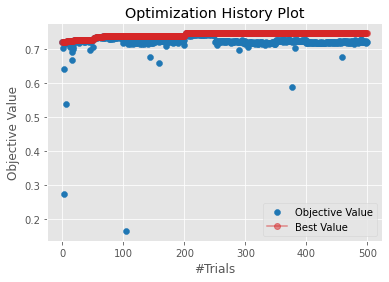

In [99]:
plot_optimization_history(study_xgb);

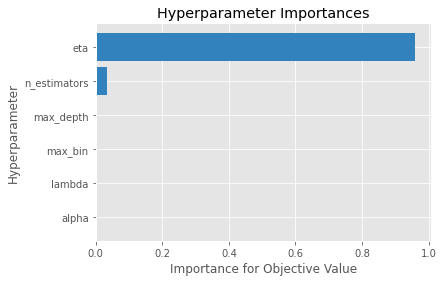

In [100]:
plot_param_importances(study_xgb);

In [101]:
detailed_objective_xgb_CV(study_xgb.best_trial, X, Y, Y_class)

,Metric,Value (average),Value (std)
0,R2,0.744585,0.042165
1,TP,18.300000,1.946507
2,TN,153.800000,2.250926
3,FP,3.800000,1.549193
4,FN,15.100000,1.370320
5,Accuracy,0.901047,0.007978
6,Precision,0.832574,0.050782
7,Sensitivity,0.547195,0.046431
8,Specificity,0.975850,0.009928
9,F1 score,0.658341,0.032081


In [102]:
mat_met_xgb_test['ave'] = mat_met_xgb_test.iloc[:,1:11].mean(axis='columns', numeric_only=True)
mat_met_xgb_test['std'] = mat_met_xgb_test.iloc[:,1:11].std(axis='columns', numeric_only=True)
mat_met_xgb_test

,Metric,Set0,Set1,Set2,Set3,Set4,Set5,Set6,Set7,Set8,Set9,ave,std
0,R2,0.743638,0.730201,0.745800,0.748070,0.677579,0.714666,0.729740,0.750225,0.702400,0.745376,0.728770,0.023892
1,TP,43.000000,43.000000,35.000000,36.000000,37.000000,40.000000,37.000000,36.000000,41.000000,31.000000,37.900000,3.813718
2,TN,305.000000,305.000000,299.000000,300.000000,301.000000,301.000000,303.000000,307.000000,304.000000,310.000000,303.500000,3.407508
3,FP,8.000000,9.000000,15.000000,15.000000,14.000000,11.000000,12.000000,7.000000,9.000000,5.000000,10.500000,3.472111
4,FN,26.000000,25.000000,33.000000,31.000000,30.000000,30.000000,30.000000,32.000000,28.000000,36.000000,30.100000,3.247221
5,Accuracy,0.910995,0.910995,0.874346,0.879581,0.884817,0.892670,0.890052,0.897906,0.903141,0.892670,0.893717,0.012353
6,Precision,0.843137,0.826923,0.700000,0.705882,0.725490,0.784314,0.755102,0.837209,0.820000,0.861111,0.785917,0.060363
7,Sensitivity,0.623188,0.632353,0.514706,0.537313,0.552239,0.571429,0.552239,0.529412,0.594203,0.462687,0.556977,0.051131
8,Specificity,0.974400,0.971300,0.952200,0.952400,0.955600,0.964700,0.961900,0.977700,0.971200,0.984100,0.966550,0.011001
9,F1 score,0.716667,0.716667,0.593220,0.610169,0.627119,0.661157,0.637931,0.648649,0.689076,0.601942,0.650260,0.045130


In [103]:
#change to fit into these X values 

TP = np.empty(10)
FP = np.empty(10)
TN = np.empty(10)
FN = np.empty(10)

r2_scores_outer = []
Accuracy_outer = []
Precision_outer = [] #Also called Positive Predictive Value(PPV)
Sensitivity_outer = [] # Also called Recall or True Positive Rate (TPR)
Specificity_outer = [] #Also called selectivity or True Negative Rate  (TNR)
f1_scores_outer = []
f1_scores_W_outer = []
f1_scores_M_outer = []
BA_scores_outer = []
MCC_outer = []
NPV_outer = []
ROC_AUC_outer = []

NUM_TRIALS = 5
random_state= [687266, 98656, 56, 280189, 76543] # 
data_xgb=pd.DataFrame()

for i in range(NUM_TRIALS):
    cv_change = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state[i])
    data_inner = pd.DataFrame({'y_test_idx': pd.Series(dtype='int'),
                   'y_test': pd.Series(dtype='float'),
                   'y_pred': pd.Series(dtype='float')})
    
    
    for idx, (train_idx, test_idx) in enumerate(cv_change.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        eval_set = [(X_train, y_train), (X_test, y_test)]
        optimizedCV_xgb = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=4,
                                    subsample=0.8, 
                                   )


        #learn
        eval_set = [(X_test, y_test)]
        optimizedCV_xgb.fit(X_train,y_train, 
            eval_set=eval_set,
            eval_metric=["rmse"],
            early_stopping_rounds=50,
            verbose= False,
                  )
                          
                  
        #print(test_idx)
        y_pred_optimized_xgb = optimizedCV_xgb.predict(X_test) 
        data_inner = data_inner.append(pd.DataFrame({'y_test_idx': test_idx, 'y_test': y_test, 'y_pred_xgb': y_pred_optimized_xgb } ), )
        data_inner.reset_index(inplace=True, drop=True) 
        data_inner.sort_values(by='y_test_idx', inplace=True) 
        
        y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
        y_pred_optimized_xgb_cat = np.where(((y_pred_optimized_xgb >= 2) | (y_pred_optimized_xgb <= -2)), 1, 0)
        
        conf_matrix = confusion_matrix(y_test_cat, y_pred_optimized_xgb_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        
        
        r2_scores_outer.append(r2_score(y_test, y_pred_optimized_xgb))
        Accuracy_outer.append(accuracy_score(y_test_cat, y_pred_optimized_xgb_cat))
        Precision_outer.append(precision_score(y_test_cat, y_pred_optimized_xgb_cat))
        Sensitivity_outer.append(recall_score(y_test_cat, y_pred_optimized_xgb_cat))
        Specificity_outer.append(round( TN[idx] / (TN[idx]+FP[idx]),4 ))
        f1_scores_outer.append(f1_score(y_test_cat, y_pred_optimized_xgb_cat))
        f1_scores_W_outer.append(f1_score(y_test_cat, y_pred_optimized_xgb_cat, average="weighted"))
        f1_scores_M_outer.append(f1_score(y_test_cat, y_pred_optimized_xgb_cat, average="macro"))
        BA_scores_outer.append(balanced_accuracy_score(y_test_cat, y_pred_optimized_xgb_cat))
        MCC_outer.append(matthews_corrcoef(y_test_cat, y_pred_optimized_xgb_cat))
        NPV_outer.append(round( TN[idx] / (TN[idx]+FN[idx]),4 ))
        ROC_AUC_outer.append(roc_auc_score(y_test_cat, y_pred_optimized_xgb_cat))
        
    data_xgb['y_test_idx' + str(i)] = data_inner['y_test_idx']
    data_xgb['y_test' + str(i)] = data_inner['y_test']
    data_xgb['y_pred_xgb' + str(i)] = data_inner['y_pred_xgb']
   # data_xgb['correct' + str(i)] = correct_value
   # data_xgb['pred' + str(i)] = y_pred_optimized_xgb

mat_met_optimized_xgb = pd.DataFrame({'Metric':['R2','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores_outer), np.mean(Accuracy_outer),np.mean(Precision_outer),
                                           np.mean(Sensitivity_outer),np.mean(Specificity_outer),np.mean(f1_scores_outer),
                                           np.mean(f1_scores_W_outer), np.mean(f1_scores_M_outer), np.mean(BA_scores_outer), 
                                           np.mean(MCC_outer),np.mean(NPV_outer),np.mean(ROC_AUC_outer)],
                        'Value (std)': [np.std(r2_scores_outer, ddof=1), np.std(Accuracy_outer, ddof=1),np.std(Precision_outer, ddof=1),
                                        np.std(Sensitivity_outer,ddof=1),np.std(Specificity_outer,ddof=1),np.std(f1_scores_outer, ddof=1),
                                        np.std(f1_scores_W_outer, ddof=1),np.std(f1_scores_M_outer, ddof=1), np.std(BA_scores_outer, ddof=1), 
                                        np.std(MCC_outer, ddof=1),np.std(NPV_outer, ddof=1),np.std(ROC_AUC_outer, ddof=1)]
                       }) 


xgb_run0 = data_xgb[['y_test_idx0', 'y_test0', 'y_pred_xgb0']]
xgb_run0.sort_values(by='y_test_idx0', inplace=True)
xgb_run0.reset_index(inplace=True, drop=True)
xgb_run1 = data_xgb[['y_test_idx1', 'y_test1', 'y_pred_xgb1']]
xgb_run1.sort_values(by='y_test_idx1', inplace=True)
xgb_run1.reset_index(inplace=True, drop=True)
xgb_run2 = data_xgb[['y_test_idx2', 'y_test2', 'y_pred_xgb2']]
xgb_run2.sort_values(by='y_test_idx2', inplace=True)
xgb_run2.reset_index(inplace=True, drop=True)
xgb_run3 = data_xgb[['y_test_idx3', 'y_test3', 'y_pred_xgb3']]
xgb_run3.sort_values(by='y_test_idx3', inplace=True)
xgb_run3.reset_index(inplace=True, drop=True)
xgb_run4 = data_xgb[['y_test_idx4', 'y_test4', 'y_pred_xgb4']]
xgb_run4.sort_values(by='y_test_idx4', inplace=True)
xgb_run4.reset_index(inplace=True, drop=True)
chembl_id = df['molecule_chembl_id']
xgb_5preds = pd.concat([chembl_id,xgb_run0, xgb_run1, xgb_run2, xgb_run3, xgb_run4], axis=1)
xgb_5preds = xgb_5preds[['molecule_chembl_id', 'y_test_idx0', 'y_test0', 'y_pred_xgb0', 'y_pred_xgb1', 'y_pred_xgb2', 'y_pred_xgb3', 'y_pred_xgb4']]
xgb_5preds['y_pred_xgb_ave'] = xgb_5preds.iloc[:,2:11].mean(axis='columns', numeric_only=True)
xgb_5preds['y_pred_xgb_std'] = xgb_5preds.iloc[:,2:].std(axis='columns', numeric_only=True)
# maybe also calculate the std for each value
xgb_5preds

,molecule_chembl_id,y_test_idx0,y_test0,y_pred_xgb0,y_pred_xgb1,y_pred_xgb2,y_pred_xgb3,y_pred_xgb4,y_pred_xgb_ave,y_pred_xgb_std
0,CHEMBL585939,0,-1.19,-0.357235,-0.501857,-0.507951,-0.263064,-0.464698,-0.547468,0.300115
1,CHEMBL96051,1,0.78,1.727524,1.862799,1.640337,1.785949,1.790880,1.597915,0.372008
2,CHEMBL3356916,2,0.30,0.487420,0.471336,0.415176,0.538762,0.493862,0.451093,0.076772
3,CHEMBL3907413,3,0.97,0.303023,0.653664,1.691334,0.611730,0.316920,0.757779,0.474323
4,CHEMBL2047704,4,-2.25,-2.917163,-3.046047,-2.886846,-2.892398,-3.055449,-2.841317,0.273209
...,...,...,...,...,...,...,...,...,...,...
1905,CHEMBL1095136,1905,-1.20,-1.076517,-0.989931,-1.098946,-0.951889,-1.076014,-1.065550,0.079644
1906,CHEMBL2012817,1906,-2.94,-1.129502,-0.784106,-0.393459,-0.061521,-0.859311,-1.027983,0.921114
1907,CHEMBL496511,1907,0.80,0.877123,1.243157,1.153667,0.979903,0.860010,0.985643,0.161556
1908,CHEMBL3940062,1908,2.27,1.246309,1.276124,1.368273,1.200517,1.440004,1.466871,0.367749


In [104]:
mat_met_optimized_xgb.to_csv(output/'mat_met_xgb_opt_withSemiSel.csv')
xgb_5preds.to_csv(output/'xgb_5test_CV_result_withSemiSel.csv')

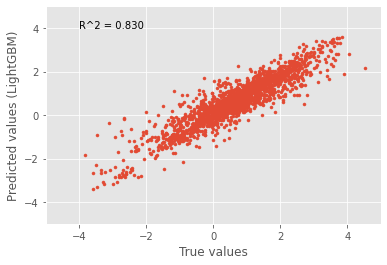

In [105]:
# Scatter plot

limits = -5,5
plt.figsize=(10,10)

plt.scatter(xgb_5preds['y_test0'], xgb_5preds['y_pred_xgb_ave'], marker=".")
lin = np.linspace(*limits, 100)

plt.ylabel("Predicted values (LightGBM)")
plt.xlabel("True values")

plt.xlim(limits)
plt.ylim(limits)

plt.annotate("R^2 = {:.3f}".format(r2_score(xgb_5preds['y_test0'], xgb_5preds['y_pred_xgb_ave'])), (-4, 4))
plt.show()

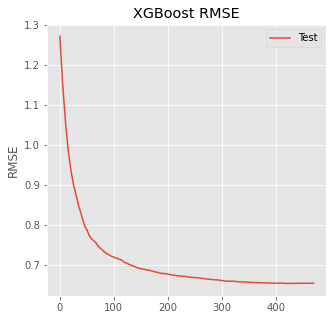

In [106]:
from matplotlib import pyplot
import matplotlib.pyplot as plt  
# retrieve performance metrics
results = optimized_xgb_0.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
    
# plot log loss
fig, ax = pyplot.subplots(figsize=(5,5))
ax.plot(x_axis, results['validation_0']['rmse'], label='Test')
ax.legend()
pyplot.ylabel('RMSE')
pyplot.title('XGBoost RMSE')
pyplot.show()

 # plot classification error
#fig, ax = pyplot.subplots(figsize=(5,5))
#ax.plot(x_axis, results['validation_0']['error'], label='Train')
#ax.plot(x_axis, results['validation_1']['error'], label='Test')
#ax.legend()
    
#pyplot.ylabel('Classification Error')
#pyplot.title('XGBoost Classification Error')
#pyplot.show()

In [107]:
#cross valide using this optimized XGBoost 
fit_params = {'early_stopping_rounds': 50, 
            'eval_set': [(X_tr, Y_tr), (X_te, Y_te)],
              'verbose' : False,
             }

xgb_baseline_CVscore = cross_val_score(xgb_reg, X, Y, cv=10, scoring="r2", )
#cv_xgb_opt_testSet = cross_val_score(optimized_xgb, X, Y, cv=10, scoring="r2", fit_params = fit_params)
cv_xgb_opt = cross_val_score(optimizedCV_xgb, X, Y, cv=10, scoring="r2", fit_params = fit_params)
print("XGBoost baseline model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(xgb_baseline_CVscore), np.std(xgb_baseline_CVscore, ddof=1)))
#print("XGBoost optimized model (tested with Y_te) r2_score %0.4f with a standard deviation of %0.4f" % (cv_xgb_opt_testSet.mean(), cv_xgb_opt_testSet.std()))
print("XGBoost optimized model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(cv_xgb_opt), np.std(cv_xgb_opt, ddof=1)))

XGBoost baseline model r2_score 0.6925 with a standard deviation of 0.0498
XGBoost optimized model r2_score 0.7344 with a standard deviation of 0.0365


In [108]:
joblib.dump(xgb_reg, "./xgb_reg.joblib")
#joblib.dump(optimized_xgb, "./optimized_xgb.joblib")
joblib.dump(optimizedCV_xgb, "./optimizedCV_xgb.joblib")


['./optimizedCV_xgb.joblib']

## KNeighbors (KNN)

In [109]:
%%time


r2_scores = np.empty(10)
TP =np.empty(10)
TN = np.empty(10)
FP = np.empty(10)
FN = np.empty(10)
Accuracy = np.empty(10)
Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
f1_scores = np.empty(10)
f1_scores_W = np.empty(10)
f1_scores_M = np.empty(10)
BA_scores = np.empty(10)
MCC = np.empty(10)
NPV = np.empty(10)
ROC_AUC= np.empty(10)



for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = Y[train_idx], Y[test_idx]

    knn_reg = KNeighborsRegressor()
    
    knn_reg.fit(X_train,y_train)

    y_pred = knn_reg.predict(X_test) 
    # r2 score of the regression model before evaluating categorical evaluation parameters
    r2_scores[idx] = r2_score(y_test, y_pred)
    # now convert the resuls to binary with cutoff 6.3
    y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
    y_pred_cat = np.where(((y_pred >= 2) | (y_pred <= -2)), 1, 0)
    #calculate the evaluation results
    conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
    TP[idx] = conf_matrix[1][1]
    TN[idx] = conf_matrix[0][0]
    FP[idx] = conf_matrix[0][1] 
    FN[idx] = conf_matrix[1][0]
    Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
    Precision[idx] = precision_score(y_test_cat, y_pred_cat)
    Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
    Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
    f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
    f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
    f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
    BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
    MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
    NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
    ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)


mat_met = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })  
    
print(mat_met)


                 Metric  Value (average)  Value (std)
0                    R2         0.701528     0.040884
1                    TP        19.400000     2.270585
2                    TN       152.400000     1.429841
3                    FP         5.200000     1.549193
4                    FN        14.000000     1.885618
5              Accuracy         0.899476     0.010413
6             Precision         0.790145     0.052428
7           Sensitivity         0.580266     0.058661
8           Specificity         0.967030     0.009732
9              F1 score         0.667248     0.045515
10  F1 score (weighted)         0.893044     0.011875
11     F1 score (macro)         0.804005     0.025451
12    Balanced Accuracy         0.773648     0.028602
13                  MCC         0.621015     0.048188
14                  NPV         0.916010     0.010094
15              ROC_AUC         0.773648     0.028602
CPU times: user 3.85 s, sys: 0 ns, total: 3.85 s
Wall time: 3.85 s


In [110]:
def objective_knn_CV(trial, X, Y, Y_class):
    param_grid = {
        "n_neighbors" : trial.suggest_int("n_neighbors", 5, 30),
        "weights" :trial.suggest_categorical("weights", ['uniform', 'distance']),
        "metric" : trial.suggest_categorical("metric", ['euclidean', 'manhattan', 'minkowski']),
        "leaf_size": trial.suggest_int("leaf_size", 20, 100)
        #"device_type": trial.suggest_categorical("device_type", ['gpu']),
        
    }
    
   
    cv_scores=np.empty(10)
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        knn_model = KNeighborsRegressor(**param_grid, n_jobs=4)
        knn_model.fit(X_train,y_train)
    
        y_pred = knn_model.predict(X_test)
    
    
        cv_scores[idx] = r2_score(y_test, y_pred)
       
        
    return np.mean(cv_scores)

In [111]:
def detailed_objective_knn_CV(trial, X, Y, Y_class):
    param_grid = {
        "n_neighbors" : trial.suggest_int("n_neighbors", 1, 30),
        "weights" :trial.suggest_categorical("weights", ['uniform', 'distance']),
        "metric" : trial.suggest_categorical("metric", ['euclidean', 'manhattan', 'minkowski']),
        "leaf_size": trial.suggest_int("leaf_size", 20, 100)
        #"device_type": trial.suggest_categorical("device_type", ['gpu']),      
    }
    
    r2_scores = np.empty(10)
    TP =np.empty(10)
    TN = np.empty(10)
    FP = np.empty(10)
    FN = np.empty(10)
    Accuracy = np.empty(10)
    Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
    Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
    Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
    f1_scores = np.empty(10)
    f1_scores_W = np.empty(10)
    f1_scores_M = np.empty(10)
    BA_scores = np.empty(10)
    MCC = np.empty(10)
    NPV = np.empty(10)
    ROC_AUC= np.empty(10)

    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1121218)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        knn_model = KNeighborsRegressor(**param_grid, n_jobs=4)
        knn_model.fit(X_train,y_train)
    
        y_pred = knn_model.predict(X_test)
        
        # r2 score of the regression model before evaluating categorical evaluation parameters
        r2_scores[idx] = r2_score(y_test, y_pred)
        # now convert the resuls to binary with cutoff 6.3
        y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
        y_pred_cat = np.where(((y_pred >= 2) | (y_pred <= -2)), 1, 0)
        #calculate the evaluation results
        conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
        Precision[idx] = precision_score(y_test_cat, y_pred_cat)
        Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
        f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
        MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)


    mat_met = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [ np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })  
    
    return(mat_met)
    

In [112]:
#Execute optuna and set hyperparameters
study_knn = optuna.create_study(direction='maximize', study_name="KNNregressor")
func_knn_0 = lambda trial: objective_knn_CV(trial, X_trainSet0, Y_trainSet0, Y_trainSet0_class)
study_knn.optimize(func_knn_0, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 09:00:36,083] A new study created in memory with name: KNNregressor
[I 2023-02-22 09:00:37,176] Trial 0 finished with value: 0.5378400662549885 and parameters: {'n_neighbors': 19, 'weights': 'uniform', 'metric': 'minkowski', 'leaf_size': 52}. Best is trial 0 with value: 0.5378400662549885.
[I 2023-02-22 09:00:38,271] Trial 1 finished with value: 0.4969115229322877 and parameters: {'n_neighbors': 24, 'weights': 'uniform', 'metric': 'euclidean', 'leaf_size': 69}. Best is trial 0 with value: 0.5378400662549885.
[I 2023-02-22 09:00:39,370] Trial 2 finished with value: 0.6246750719472615 and parameters: {'n_neighbors': 14, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 49}. Best is trial 2 with value: 0.6246750719472615.
[I 2023-02-22 09:00:40,476] Trial 3 finished with value: 0.5734472894625996 and parameters: {'n_neighbors': 15, 'weights': 'uniform', 'metric': 'manhattan', 'leaf_size': 51}. Best is trial 2 with value: 0.6246750719472615.
[I 2023-02-22 09:00:41,78

[I 2023-02-22 09:01:13,404] Trial 35 finished with value: 0.7049748869598941 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 93}. Best is trial 29 with value: 0.7049748869598941.
[I 2023-02-22 09:01:14,518] Trial 36 finished with value: 0.5085910039210749 and parameters: {'n_neighbors': 22, 'weights': 'uniform', 'metric': 'manhattan', 'leaf_size': 56}. Best is trial 29 with value: 0.7049748869598941.
[I 2023-02-22 09:01:15,622] Trial 37 finished with value: 0.6864557006496794 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 46}. Best is trial 29 with value: 0.7049748869598941.
[I 2023-02-22 09:01:16,732] Trial 38 finished with value: 0.558968684602925 and parameters: {'n_neighbors': 17, 'weights': 'uniform', 'metric': 'manhattan', 'leaf_size': 67}. Best is trial 29 with value: 0.7049748869598941.
[I 2023-02-22 09:01:18,049] Trial 39 finished with value: 0.696299150204432 and parameters: {'n_neigh

	Number of trials: 50.0
	Best value (r2_score): 0.7051
	Best params:
		n_neighbors: 5
		weights: distance
		metric: manhattan
		leaf_size: 80


In [113]:
#Create an instance with tuned hyperparameters

optimized_knn_0 = KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=4,
                                                 )

    
#learn


optimized_knn_0.fit(X_trainSet0,Y_trainSet0, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_0 = optimized_knn_0.predict(X_testSet0)
r2_scores = r2_score(Y_testSet0, y_pred_knn_0)
# now convert the resuls to binary with cutoff 
Y_testSet0_cat = np.where(((Y_testSet0>=2) | (Y_testSet0<=-2)), 1, 0) 
y_pred_knn_0_cat = np.where(((y_pred_knn_0 >= 2) | (y_pred_knn_0 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet0_cat, y_pred_knn_0_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet0_cat, y_pred_knn_0_cat)
Precision = precision_score(Y_testSet0_cat, y_pred_knn_0_cat)
Sensitivity = recall_score(Y_testSet0_cat, y_pred_knn_0_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet0_cat, y_pred_knn_0_cat)      
f1_scores_W = f1_score(Y_testSet0_cat, y_pred_knn_0_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet0_cat, y_pred_knn_0_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet0_cat, y_pred_knn_0_cat)
MCC = matthews_corrcoef(Y_testSet0_cat, y_pred_knn_0_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet0_cat, y_pred_knn_0_cat)
    

mat_met_knn_test = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Set0':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })    
print(mat_met_knn_test)


                 Metric        Set0
0                    R2    0.681130
1                    TP   39.000000
2                    TN  304.000000
3                    FP    9.000000
4                    FN   30.000000
5              Accuracy    0.897906
6             Precision    0.812500
7           Sensitivity    0.565217
8           Specificity    0.971200
9              F1 score    0.666667
10  F1 score (weighted)    0.890400
11     F1 score (macro)    0.803194
12    Balanced Accuracy    0.768232
13                  MCC    0.622649
14                  NPV    0.910200
15              ROC_AUC    0.768232


In [114]:
#Execute optuna and set hyperparameters

func_knn_1 = lambda trial: objective_knn_CV(trial, X_trainSet1, Y_trainSet1, Y_trainSet1_class)
study_knn.optimize(func_knn_1, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 09:01:29,723] Trial 50 finished with value: 0.6818884664642351 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 85}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:01:30,651] Trial 51 finished with value: 0.7014031756160014 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 87}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:01:31,582] Trial 52 finished with value: 0.7014031756160014 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 88}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:01:32,511] Trial 53 finished with value: 0.7026190576271137 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 100}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:01:33,439] Trial 54 finished with value: 0.7026190576271137 and parameters: {'n_ne

[I 2023-02-22 09:02:03,199] Trial 85 finished with value: 0.7014031756160014 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 92}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:02:04,140] Trial 86 finished with value: 0.6937969447816363 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 86}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:02:05,083] Trial 87 finished with value: 0.6053629301623984 and parameters: {'n_neighbors': 24, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 91}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:02:06,031] Trial 88 finished with value: 0.6961427465153656 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 98}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:02:06,963] Trial 89 finished with value: 0.6897837671289191 and parameters: {'n_ne

	Number of trials: 100.0
	Best value (r2_score): 0.7051
	Best params:
		n_neighbors: 5
		weights: distance
		metric: manhattan
		leaf_size: 80


In [115]:
#Create an instance with tuned hyperparameters

optimized_knn_1 =  KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=4,
                                                 )

    
#learn


optimized_knn_1.fit(X_trainSet1,Y_trainSet1, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_1 = optimized_knn_1.predict(X_testSet1)
r2_scores = r2_score(Y_testSet1, y_pred_knn_1)
# now convert the resuls to binary with cutoff 
Y_testSet1_cat = np.where(((Y_testSet1>=2) | (Y_testSet1<=-2)), 1, 0) 
y_pred_knn_1_cat = np.where(((y_pred_knn_1 >= 2) | (y_pred_knn_1 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet1_cat, y_pred_knn_1_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet1_cat, y_pred_knn_1_cat)
Precision = precision_score(Y_testSet1_cat, y_pred_knn_1_cat)
Sensitivity = recall_score(Y_testSet1_cat, y_pred_knn_1_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet1_cat, y_pred_knn_1_cat)      
f1_scores_W = f1_score(Y_testSet1_cat, y_pred_knn_1_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet1_cat, y_pred_knn_1_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet1_cat, y_pred_knn_1_cat)
MCC = matthews_corrcoef(Y_testSet1_cat, y_pred_knn_1_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet1_cat, y_pred_knn_1_cat)
    

set1 = pd.DataFrame({'Set1':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set1'] = set1
print(mat_met_knn_test)


                 Metric        Set0        Set1
0                    R2    0.681130    0.709181
1                    TP   39.000000   44.000000
2                    TN  304.000000  301.000000
3                    FP    9.000000   13.000000
4                    FN   30.000000   24.000000
5              Accuracy    0.897906    0.903141
6             Precision    0.812500    0.771930
7           Sensitivity    0.565217    0.647059
8           Specificity    0.971200    0.958600
9              F1 score    0.666667    0.704000
10  F1 score (weighted)    0.890400    0.899713
11     F1 score (macro)    0.803194    0.823049
12    Balanced Accuracy    0.768232    0.802829
13                  MCC    0.622649    0.650230
14                  NPV    0.910200    0.926200
15              ROC_AUC    0.768232    0.802829


In [116]:
#Execute optuna and set hyperparameters

func_knn_2 = lambda trial: objective_knn_CV(trial, X_trainSet2, Y_trainSet2, Y_trainSet2_class)
study_knn.optimize(func_knn_2, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 09:02:18,006] Trial 100 finished with value: 0.6814126537788354 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 37}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:02:18,939] Trial 101 finished with value: 0.6835151385985576 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 92}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:02:19,868] Trial 102 finished with value: 0.6843715746624659 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 94}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:02:20,803] Trial 103 finished with value: 0.6835151385985576 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 96}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:02:21,734] Trial 104 finished with value: 0.6753967138747214 and parameters: {'

[I 2023-02-22 09:02:51,138] Trial 135 finished with value: 0.681520363987518 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 88}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:02:52,072] Trial 136 finished with value: 0.6426128467145649 and parameters: {'n_neighbors': 14, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 94}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:02:53,008] Trial 137 finished with value: 0.6753967138747214 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 95}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:02:53,936] Trial 138 finished with value: 0.6754002530857959 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 92}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:02:54,866] Trial 139 finished with value: 0.6835151385985576 and parameters: {'

	Number of trials: 150.0
	Best value (r2_score): 0.7051
	Best params:
		n_neighbors: 5
		weights: distance
		metric: manhattan
		leaf_size: 80


In [117]:
#Create an instance with tuned hyperparameters

optimized_knn_2 = KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=4,
                                                 )

    
#learn


optimized_knn_2.fit(X_trainSet2,Y_trainSet2, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_2 = optimized_knn_2.predict(X_testSet2)
r2_scores = r2_score(Y_testSet2, y_pred_knn_2)
# now convert the resuls to binary with cutoff 
Y_testSet2_cat = np.where(((Y_testSet2>=2) | (Y_testSet2<=-2)), 1, 0) 
y_pred_knn_2_cat = np.where(((y_pred_knn_2 >= 2) | (y_pred_knn_2 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet2_cat, y_pred_knn_2_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet2_cat, y_pred_knn_2_cat)
Precision = precision_score(Y_testSet2_cat, y_pred_knn_2_cat)
Sensitivity = recall_score(Y_testSet2_cat, y_pred_knn_2_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet2_cat, y_pred_knn_2_cat)      
f1_scores_W = f1_score(Y_testSet2_cat, y_pred_knn_2_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet2_cat, y_pred_knn_2_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet2_cat, y_pred_knn_2_cat)
MCC = matthews_corrcoef(Y_testSet2_cat, y_pred_knn_2_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet2_cat, y_pred_knn_2_cat)
    

Set2 = pd.DataFrame({'Set2':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set2'] = Set2
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2
0                    R2    0.681130    0.709181    0.748912
1                    TP   39.000000   44.000000   41.000000
2                    TN  304.000000  301.000000  301.000000
3                    FP    9.000000   13.000000   13.000000
4                    FN   30.000000   24.000000   27.000000
5              Accuracy    0.897906    0.903141    0.895288
6             Precision    0.812500    0.771930    0.759259
7           Sensitivity    0.565217    0.647059    0.602941
8           Specificity    0.971200    0.958600    0.958600
9              F1 score    0.666667    0.704000    0.672131
10  F1 score (weighted)    0.890400    0.899713    0.890422
11     F1 score (macro)    0.803194    0.823049    0.804913
12    Balanced Accuracy    0.768232    0.802829    0.780770
13                  MCC    0.622649    0.650230    0.616547
14                  NPV    0.910200    0.926200    0.917700
15              ROC_AUC    0.768232    0

In [118]:
#Execute optuna and set hyperparameters

func_knn_3 = lambda trial: objective_knn_CV(trial, X_trainSet3, Y_trainSet3, Y_trainSet3_class)
study_knn.optimize(func_knn_3, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 09:03:05,879] Trial 150 finished with value: 0.6923289726330768 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 94}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:03:06,820] Trial 151 finished with value: 0.6996942981253647 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 90}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:03:07,754] Trial 152 finished with value: 0.6996942981253647 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 87}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:03:08,873] Trial 153 finished with value: 0.7005097982407589 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 75}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:03:09,812] Trial 154 finished with value: 0.6974860648978721 and parameters: {'

[I 2023-02-22 09:03:39,479] Trial 185 finished with value: 0.6996942981253647 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 95}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:03:40,579] Trial 186 finished with value: 0.6982127621392582 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 79}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:03:41,506] Trial 187 finished with value: 0.6378705675599932 and parameters: {'n_neighbors': 17, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 98}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:03:42,434] Trial 188 finished with value: 0.7005391119132771 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 92}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:03:43,358] Trial 189 finished with value: 0.6974860648978721 and parameters: {

	Number of trials: 200.0
	Best value (r2_score): 0.7051
	Best params:
		n_neighbors: 5
		weights: distance
		metric: manhattan
		leaf_size: 80


In [119]:
#Create an instance with tuned hyperparameters

optimized_knn_3 = KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=4,
                                                 )

    
#learn


optimized_knn_3.fit(X_trainSet3,Y_trainSet3, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_3 = optimized_knn_3.predict(X_testSet3)
r2_scores = r2_score(Y_testSet3, y_pred_knn_3)
# now convert the resuls to binary with cutoff 
Y_testSet3_cat = np.where(((Y_testSet3>=2) | (Y_testSet3<=-2)), 1, 0) 
y_pred_knn_3_cat = np.where(((y_pred_knn_3 >= 2) | (y_pred_knn_3 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet3_cat, y_pred_knn_3_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet3_cat, y_pred_knn_3_cat)
Precision = precision_score(Y_testSet3_cat, y_pred_knn_3_cat)
Sensitivity = recall_score(Y_testSet3_cat, y_pred_knn_3_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet3_cat, y_pred_knn_3_cat)      
f1_scores_W = f1_score(Y_testSet3_cat, y_pred_knn_3_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet3_cat, y_pred_knn_3_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet3_cat, y_pred_knn_3_cat)
MCC = matthews_corrcoef(Y_testSet3_cat, y_pred_knn_3_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet3_cat, y_pred_knn_3_cat)
    

Set3 = pd.DataFrame({'Set3':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set3'] = Set3
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3
0                    R2    0.681130    0.709181    0.748912    0.678639
1                    TP   39.000000   44.000000   41.000000   45.000000
2                    TN  304.000000  301.000000  301.000000  290.000000
3                    FP    9.000000   13.000000   13.000000   25.000000
4                    FN   30.000000   24.000000   27.000000   22.000000
5              Accuracy    0.897906    0.903141    0.895288    0.876963
6             Precision    0.812500    0.771930    0.759259    0.642857
7           Sensitivity    0.565217    0.647059    0.602941    0.671642
8           Specificity    0.971200    0.958600    0.958600    0.920600
9              F1 score    0.666667    0.704000    0.672131    0.656934
10  F1 score (weighted)    0.890400    0.899713    0.890422    0.878016
11     F1 score (macro)    0.803194    0.823049    0.804913    0.790987
12    Balanced Accuracy    0.768232    0.802829    0.780770    0

In [120]:
#Execute optuna and set hyperparameters

func_knn_4 = lambda trial: objective_knn_CV(trial, X_trainSet4, Y_trainSet4, Y_trainSet4_class)
study_knn.optimize(func_knn_4, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 09:03:54,010] Trial 200 finished with value: 0.7049024704177289 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 99}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:03:54,943] Trial 201 finished with value: 0.7049024704177289 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 98}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:03:55,887] Trial 202 finished with value: 0.7049024704177289 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 98}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:03:56,819] Trial 203 finished with value: 0.7049024704177289 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 98}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:03:57,754] Trial 204 finished with value: 0.7049024704177289 and parameters: {'

[I 2023-02-22 09:04:26,634] Trial 235 finished with value: 0.7049024704177289 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 99}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:04:27,566] Trial 236 finished with value: 0.7049024704177289 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 99}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:04:28,498] Trial 237 finished with value: 0.7049024704177289 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 99}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:04:29,426] Trial 238 finished with value: 0.7049024704177289 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 98}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:04:30,359] Trial 239 finished with value: 0.7049024704177289 and parameters: {'

	Number of trials: 250.0
	Best value (r2_score): 0.7051
	Best params:
		n_neighbors: 5
		weights: distance
		metric: manhattan
		leaf_size: 80


In [121]:
#Create an instance with tuned hyperparameters

optimized_knn_4 =  KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=4,
                                                 )

    
#learn


optimized_knn_4.fit(X_trainSet4,Y_trainSet4, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_4 = optimized_knn_4.predict(X_testSet4)
r2_scores = r2_score(Y_testSet4, y_pred_knn_4)
# now convert the resuls to binary with cutoff 
Y_testSet4_cat = np.where(((Y_testSet4>=2) | (Y_testSet4<=-2)), 1, 0) 
y_pred_knn_4_cat = np.where(((y_pred_knn_4 >= 2) | (y_pred_knn_4 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet4_cat, y_pred_knn_4_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet4_cat, y_pred_knn_4_cat)
Precision = precision_score(Y_testSet4_cat, y_pred_knn_4_cat)
Sensitivity = recall_score(Y_testSet4_cat, y_pred_knn_4_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet4_cat, y_pred_knn_4_cat)      
f1_scores_W = f1_score(Y_testSet4_cat, y_pred_knn_4_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet4_cat, y_pred_knn_4_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet4_cat, y_pred_knn_4_cat)
MCC = matthews_corrcoef(Y_testSet4_cat, y_pred_knn_4_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet4_cat, y_pred_knn_4_cat)
    

Set4 = pd.DataFrame({'Set4':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set4'] = Set4
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.681130    0.709181    0.748912    0.678639   
1                    TP   39.000000   44.000000   41.000000   45.000000   
2                    TN  304.000000  301.000000  301.000000  290.000000   
3                    FP    9.000000   13.000000   13.000000   25.000000   
4                    FN   30.000000   24.000000   27.000000   22.000000   
5              Accuracy    0.897906    0.903141    0.895288    0.876963   
6             Precision    0.812500    0.771930    0.759259    0.642857   
7           Sensitivity    0.565217    0.647059    0.602941    0.671642   
8           Specificity    0.971200    0.958600    0.958600    0.920600   
9              F1 score    0.666667    0.704000    0.672131    0.656934   
10  F1 score (weighted)    0.890400    0.899713    0.890422    0.878016   
11     F1 score (macro)    0.803194    0.823049    0.804913    0.790987   
12    Balanced Accuracy  

In [122]:
#Execute optuna and set hyperparameters

func_knn_5 = lambda trial: objective_knn_CV(trial, X_trainSet5, Y_trainSet5, Y_trainSet5_class)
study_knn.optimize(func_knn_5, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 09:04:40,887] Trial 250 finished with value: 0.6965391348255034 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 97}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:04:41,815] Trial 251 finished with value: 0.6930175471937943 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 95}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:04:42,751] Trial 252 finished with value: 0.6965391348255034 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 97}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:04:43,683] Trial 253 finished with value: 0.6983421636907978 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 97}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:04:44,620] Trial 254 finished with value: 0.6965391348255034 and parameters: {'

[I 2023-02-22 09:05:14,404] Trial 285 finished with value: 0.6965391348255034 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 100}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:05:15,347] Trial 286 finished with value: 0.6983421636907978 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 100}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:05:16,289] Trial 287 finished with value: 0.6983421636907978 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 98}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:05:17,231] Trial 288 finished with value: 0.6965391348255034 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 98}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:05:18,167] Trial 289 finished with value: 0.6983421636907978 and parameters: 

	Number of trials: 300.0
	Best value (r2_score): 0.7051
	Best params:
		n_neighbors: 5
		weights: distance
		metric: manhattan
		leaf_size: 80


In [123]:
#Create an instance with tuned hyperparameters

optimized_knn_5 = KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=4,
                                                 )

    
#learn


optimized_knn_5.fit(X_trainSet5,Y_trainSet5, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_5 = optimized_knn_5.predict(X_testSet5)
r2_scores = r2_score(Y_testSet5, y_pred_knn_5)
# now convert the resuls to binary with cutoff 
Y_testSet5_cat = np.where(((Y_testSet5>=2) | (Y_testSet5<=-2)), 1, 0) 
y_pred_knn_5_cat = np.where(((y_pred_knn_5 >= 2) | (y_pred_knn_5 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet5_cat, y_pred_knn_5_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet5_cat, y_pred_knn_5_cat)
Precision = precision_score(Y_testSet5_cat, y_pred_knn_5_cat)
Sensitivity = recall_score(Y_testSet5_cat, y_pred_knn_5_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet5_cat, y_pred_knn_5_cat)      
f1_scores_W = f1_score(Y_testSet5_cat, y_pred_knn_5_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet5_cat, y_pred_knn_5_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet5_cat, y_pred_knn_5_cat)
MCC = matthews_corrcoef(Y_testSet5_cat, y_pred_knn_5_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet5_cat, y_pred_knn_5_cat)
    

Set5 = pd.DataFrame({'Set5':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set5'] = Set5
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.681130    0.709181    0.748912    0.678639   
1                    TP   39.000000   44.000000   41.000000   45.000000   
2                    TN  304.000000  301.000000  301.000000  290.000000   
3                    FP    9.000000   13.000000   13.000000   25.000000   
4                    FN   30.000000   24.000000   27.000000   22.000000   
5              Accuracy    0.897906    0.903141    0.895288    0.876963   
6             Precision    0.812500    0.771930    0.759259    0.642857   
7           Sensitivity    0.565217    0.647059    0.602941    0.671642   
8           Specificity    0.971200    0.958600    0.958600    0.920600   
9              F1 score    0.666667    0.704000    0.672131    0.656934   
10  F1 score (weighted)    0.890400    0.899713    0.890422    0.878016   
11     F1 score (macro)    0.803194    0.823049    0.804913    0.790987   
12    Balanced Accuracy  

In [124]:
#Execute optuna and set hyperparameters

func_knn_6 = lambda trial: objective_knn_CV(trial, X_trainSet6, Y_trainSet6, Y_trainSet6_class)
study_knn.optimize(func_knn_6, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 09:05:29,088] Trial 300 finished with value: 0.6783702113965304 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 44}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:05:30,018] Trial 301 finished with value: 0.6806830036795903 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 100}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:05:30,950] Trial 302 finished with value: 0.6785840182699687 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 99}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:05:31,875] Trial 303 finished with value: 0.5627884001389457 and parameters: {'n_neighbors': 30, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 98}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:05:32,802] Trial 304 finished with value: 0.6806830036795903 and parameters: 

[I 2023-02-22 09:06:02,355] Trial 335 finished with value: 0.648936929894046 and parameters: {'n_neighbors': 6, 'weights': 'uniform', 'metric': 'manhattan', 'leaf_size': 96}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:06:03,296] Trial 336 finished with value: 0.6806830036795903 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 92}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:06:04,226] Trial 337 finished with value: 0.6806830036795903 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 99}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:06:05,158] Trial 338 finished with value: 0.6785840182699687 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 99}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:06:06,087] Trial 339 finished with value: 0.6721505596892559 and parameters: {'n_

	Number of trials: 350.0
	Best value (r2_score): 0.7051
	Best params:
		n_neighbors: 5
		weights: distance
		metric: manhattan
		leaf_size: 80


In [125]:
#Create an instance with tuned hyperparameters

optimized_knn_6 =  KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=4,
                                                 )

    
#learn


optimized_knn_6.fit(X_trainSet6,Y_trainSet6, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_6 = optimized_knn_6.predict(X_testSet6)
r2_scores = r2_score(Y_testSet6, y_pred_knn_6)
# now convert the resuls to binary with cutoff 
Y_testSet6_cat = np.where(((Y_testSet6>=2) | (Y_testSet6<=-2)), 1, 0) 
y_pred_knn_6_cat = np.where(((y_pred_knn_6 >= 2) | (y_pred_knn_6 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet6_cat, y_pred_knn_6_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet6_cat, y_pred_knn_6_cat)
Precision = precision_score(Y_testSet6_cat, y_pred_knn_6_cat)
Sensitivity = recall_score(Y_testSet6_cat, y_pred_knn_6_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet6_cat, y_pred_knn_6_cat)      
f1_scores_W = f1_score(Y_testSet6_cat, y_pred_knn_6_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet6_cat, y_pred_knn_6_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet6_cat, y_pred_knn_6_cat)
MCC = matthews_corrcoef(Y_testSet6_cat, y_pred_knn_6_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet6_cat, y_pred_knn_6_cat)
    

Set6 = pd.DataFrame({'Set6':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set6'] = Set6
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.681130    0.709181    0.748912    0.678639   
1                    TP   39.000000   44.000000   41.000000   45.000000   
2                    TN  304.000000  301.000000  301.000000  290.000000   
3                    FP    9.000000   13.000000   13.000000   25.000000   
4                    FN   30.000000   24.000000   27.000000   22.000000   
5              Accuracy    0.897906    0.903141    0.895288    0.876963   
6             Precision    0.812500    0.771930    0.759259    0.642857   
7           Sensitivity    0.565217    0.647059    0.602941    0.671642   
8           Specificity    0.971200    0.958600    0.958600    0.920600   
9              F1 score    0.666667    0.704000    0.672131    0.656934   
10  F1 score (weighted)    0.890400    0.899713    0.890422    0.878016   
11     F1 score (macro)    0.803194    0.823049    0.804913    0.790987   
12    Balanced Accuracy  

In [126]:
#Execute optuna and set hyperparameters

func_knn_7 = lambda trial: objective_knn_CV(trial, X_trainSet7, Y_trainSet7, Y_trainSet7_class)
study_knn.optimize(func_knn_7, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 09:06:16,574] Trial 350 finished with value: 0.7005737681105396 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 94}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:06:17,507] Trial 351 finished with value: 0.695667662741496 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 100}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:06:18,608] Trial 352 finished with value: 0.7012654097795504 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 49}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:06:19,535] Trial 353 finished with value: 0.6149466593704113 and parameters: {'n_neighbors': 12, 'weights': 'uniform', 'metric': 'manhattan', 'leaf_size': 98}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:06:20,644] Trial 354 finished with value: 0.6988581026180031 and parameters: {'

[I 2023-02-22 09:06:51,407] Trial 385 finished with value: 0.698673177293386 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 97}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:06:52,371] Trial 386 finished with value: 0.7005737681105396 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 100}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:06:53,305] Trial 387 finished with value: 0.6656034352380242 and parameters: {'n_neighbors': 14, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 96}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:06:54,251] Trial 388 finished with value: 0.698673177293386 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 93}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:06:55,182] Trial 389 finished with value: 0.7005737681105396 and parameters: {'

	Number of trials: 400.0
	Best value (r2_score): 0.7051
	Best params:
		n_neighbors: 5
		weights: distance
		metric: manhattan
		leaf_size: 80


In [127]:
#Create an instance with tuned hyperparameters

optimized_knn_7 =  KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=4,
                                                 )

    
#learn


optimized_knn_7.fit(X_trainSet7,Y_trainSet7, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_7 = optimized_knn_7.predict(X_testSet7)
r2_scores = r2_score(Y_testSet7, y_pred_knn_7)
# now convert the resuls to binary with cutoff 
Y_testSet7_cat = np.where(((Y_testSet7>=2) | (Y_testSet7<=-2)), 1, 0) 
y_pred_knn_7_cat = np.where(((y_pred_knn_7 >= 2) | (y_pred_knn_7 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet7_cat, y_pred_knn_7_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet7_cat, y_pred_knn_7_cat)
Precision = precision_score(Y_testSet7_cat, y_pred_knn_7_cat)
Sensitivity = recall_score(Y_testSet7_cat, y_pred_knn_7_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet7_cat, y_pred_knn_7_cat)      
f1_scores_W = f1_score(Y_testSet7_cat, y_pred_knn_7_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet7_cat, y_pred_knn_7_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet7_cat, y_pred_knn_7_cat)
MCC = matthews_corrcoef(Y_testSet7_cat, y_pred_knn_7_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet7_cat, y_pred_knn_7_cat)
    

Set7 = pd.DataFrame({'Set7':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set7'] = Set7
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.681130    0.709181    0.748912    0.678639   
1                    TP   39.000000   44.000000   41.000000   45.000000   
2                    TN  304.000000  301.000000  301.000000  290.000000   
3                    FP    9.000000   13.000000   13.000000   25.000000   
4                    FN   30.000000   24.000000   27.000000   22.000000   
5              Accuracy    0.897906    0.903141    0.895288    0.876963   
6             Precision    0.812500    0.771930    0.759259    0.642857   
7           Sensitivity    0.565217    0.647059    0.602941    0.671642   
8           Specificity    0.971200    0.958600    0.958600    0.920600   
9              F1 score    0.666667    0.704000    0.672131    0.656934   
10  F1 score (weighted)    0.890400    0.899713    0.890422    0.878016   
11     F1 score (macro)    0.803194    0.823049    0.804913    0.790987   
12    Balanced Accuracy  

In [128]:
#Execute optuna and set hyperparameters

func_knn_8 = lambda trial: objective_knn_CV(trial, X_trainSet8, Y_trainSet8, Y_trainSet8_class)
study_knn.optimize(func_knn_8, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 09:07:05,846] Trial 400 finished with value: 0.6942959054074137 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 97}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:07:06,779] Trial 401 finished with value: 0.6967874653190076 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 100}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:07:07,714] Trial 402 finished with value: 0.6942959054074137 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 95}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:07:08,645] Trial 403 finished with value: 0.6967874653190076 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 100}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:07:09,584] Trial 404 finished with value: 0.6967874653190076 and parameters: 

[I 2023-02-22 09:07:39,486] Trial 435 finished with value: 0.6967874653190076 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 98}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:07:40,419] Trial 436 finished with value: 0.6967874653190076 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 95}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:07:41,354] Trial 437 finished with value: 0.6453392589548249 and parameters: {'n_neighbors': 15, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 95}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:07:42,299] Trial 438 finished with value: 0.6942959054074137 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 100}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:07:43,238] Trial 439 finished with value: 0.6885692166510478 and parameters: 

	Number of trials: 450.0
	Best value (r2_score): 0.7051
	Best params:
		n_neighbors: 5
		weights: distance
		metric: manhattan
		leaf_size: 80


In [129]:
#Create an instance with tuned hyperparameters

optimized_knn_8 =  KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=4,
                                                 )

    
#learn


optimized_knn_8.fit(X_trainSet8,Y_trainSet8, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_8 = optimized_knn_8.predict(X_testSet8)
r2_scores = r2_score(Y_testSet8, y_pred_knn_8)
# now convert the resuls to binary with cutoff 
Y_testSet8_cat = np.where(((Y_testSet8>=2) | (Y_testSet8<=-2)), 1, 0) 
y_pred_knn_8_cat = np.where(((y_pred_knn_8 >= 2) | (y_pred_knn_8 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet8_cat, y_pred_knn_8_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet8_cat, y_pred_knn_8_cat)
Precision = precision_score(Y_testSet8_cat, y_pred_knn_8_cat)
Sensitivity = recall_score(Y_testSet8_cat, y_pred_knn_8_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet8_cat, y_pred_knn_8_cat)      
f1_scores_W = f1_score(Y_testSet8_cat, y_pred_knn_8_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet8_cat, y_pred_knn_8_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet8_cat, y_pred_knn_8_cat)
MCC = matthews_corrcoef(Y_testSet8_cat, y_pred_knn_8_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet8_cat, y_pred_knn_8_cat)
    

Set8 = pd.DataFrame({'Set8':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set8'] = Set8
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.681130    0.709181    0.748912    0.678639   
1                    TP   39.000000   44.000000   41.000000   45.000000   
2                    TN  304.000000  301.000000  301.000000  290.000000   
3                    FP    9.000000   13.000000   13.000000   25.000000   
4                    FN   30.000000   24.000000   27.000000   22.000000   
5              Accuracy    0.897906    0.903141    0.895288    0.876963   
6             Precision    0.812500    0.771930    0.759259    0.642857   
7           Sensitivity    0.565217    0.647059    0.602941    0.671642   
8           Specificity    0.971200    0.958600    0.958600    0.920600   
9              F1 score    0.666667    0.704000    0.672131    0.656934   
10  F1 score (weighted)    0.890400    0.899713    0.890422    0.878016   
11     F1 score (macro)    0.803194    0.823049    0.804913    0.790987   
12    Balanced Accuracy  

In [130]:
#Execute optuna and set hyperparameters

func_knn_9 = lambda trial: objective_knn_CV(trial, X_trainSet9, Y_trainSet9, Y_trainSet9_class)
study_knn.optimize(func_knn_9, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 09:07:54,279] Trial 450 finished with value: 0.6864515315350059 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 64}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:07:55,243] Trial 451 finished with value: 0.7020400111466775 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 97}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:07:56,203] Trial 452 finished with value: 0.7020400111466775 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 97}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:07:57,169] Trial 453 finished with value: 0.695275289414346 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 98}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:07:58,136] Trial 454 finished with value: 0.7020400111466775 and parameters: {'n

[I 2023-02-22 09:08:28,078] Trial 485 finished with value: 0.6590919634899776 and parameters: {'n_neighbors': 12, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 96}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:08:29,009] Trial 486 finished with value: 0.7020400111466775 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 99}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:08:29,937] Trial 487 finished with value: 0.695275289414346 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 92}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:08:30,872] Trial 488 finished with value: 0.6775659059753043 and parameters: {'n_neighbors': 5, 'weights': 'uniform', 'metric': 'manhattan', 'leaf_size': 94}. Best is trial 41 with value: 0.7051489113968382.
[I 2023-02-22 09:08:31,810] Trial 489 finished with value: 0.7020400111466775 and parameters: {'n

	Number of trials: 500.0
	Best value (r2_score): 0.7051
	Best params:
		n_neighbors: 5
		weights: distance
		metric: manhattan
		leaf_size: 80


In [131]:
#Create an instance with tuned hyperparameters

optimized_knn_9 = KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=4,
                                                 )

    
#learn


optimized_knn_9.fit(X_trainSet9,Y_trainSet9, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_9 = optimized_knn_9.predict(X_testSet9)
r2_scores = r2_score(Y_testSet9, y_pred_knn_9)
# now convert the resuls to binary with cutoff 
Y_testSet9_cat = np.where(((Y_testSet9>=2) | (Y_testSet9<=-2)), 1, 0) 
y_pred_knn_9_cat = np.where(((y_pred_knn_9 >= 2) | (y_pred_knn_9 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet9_cat, y_pred_knn_9_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet9_cat, y_pred_knn_9_cat)
Precision = precision_score(Y_testSet9_cat, y_pred_knn_9_cat)
Sensitivity = recall_score(Y_testSet9_cat, y_pred_knn_9_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet9_cat, y_pred_knn_9_cat)      
f1_scores_W = f1_score(Y_testSet9_cat, y_pred_knn_9_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet9_cat, y_pred_knn_9_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet9_cat, y_pred_knn_9_cat)
MCC = matthews_corrcoef(Y_testSet9_cat, y_pred_knn_9_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet9_cat, y_pred_knn_9_cat)
    

Set9 = pd.DataFrame({'Set9':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set9'] = Set9
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.681130    0.709181    0.748912    0.678639   
1                    TP   39.000000   44.000000   41.000000   45.000000   
2                    TN  304.000000  301.000000  301.000000  290.000000   
3                    FP    9.000000   13.000000   13.000000   25.000000   
4                    FN   30.000000   24.000000   27.000000   22.000000   
5              Accuracy    0.897906    0.903141    0.895288    0.876963   
6             Precision    0.812500    0.771930    0.759259    0.642857   
7           Sensitivity    0.565217    0.647059    0.602941    0.671642   
8           Specificity    0.971200    0.958600    0.958600    0.920600   
9              F1 score    0.666667    0.704000    0.672131    0.656934   
10  F1 score (weighted)    0.890400    0.899713    0.890422    0.878016   
11     F1 score (macro)    0.803194    0.823049    0.804913    0.790987   
12    Balanced Accuracy  

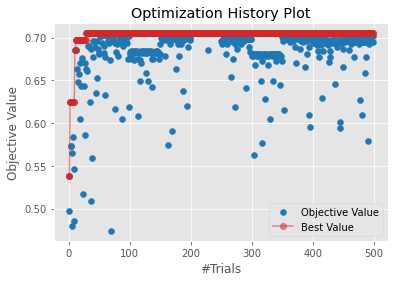

In [132]:
from optuna.visualization.matplotlib import plot_optimization_history

plot_optimization_history(study_knn);

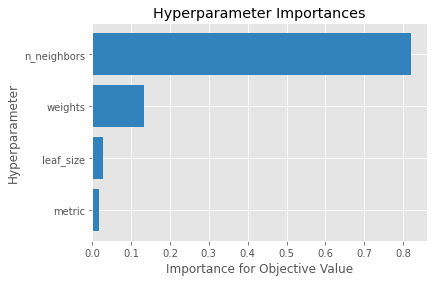

In [133]:

plot_param_importances(study_knn);

In [134]:
detailed_objective_knn_CV(study_knn.best_trial, X, Y, Y_class)

,Metric,Value (average),Value (std)
0,R2,0.718181,0.045656
1,TP,20.300000,2.213594
2,TN,152.700000,1.828782
3,FP,4.900000,1.595131
4,FN,13.100000,1.523884
5,Accuracy,0.905759,0.013518
6,Precision,0.806179,0.059641
7,Sensitivity,0.606846,0.052366
8,Specificity,0.968910,0.010081
9,F1 score,0.691646,0.050393


In [135]:
mat_met_knn_test['ave'] = mat_met_knn_test.iloc[:,1:11].mean(axis='columns', numeric_only=True)
mat_met_knn_test['std'] = mat_met_knn_test.iloc[:,1:11].std(axis='columns', numeric_only=True)
mat_met_knn_test

,Metric,Set0,Set1,Set2,Set3,Set4,Set5,Set6,Set7,Set8,Set9,ave,std
0,R2,0.681130,0.709181,0.748912,0.678639,0.663838,0.685186,0.719665,0.701116,0.666298,0.691001,0.694497,0.026073
1,TP,39.000000,44.000000,41.000000,45.000000,40.000000,43.000000,37.000000,38.000000,39.000000,40.000000,40.600000,2.633122
2,TN,304.000000,301.000000,301.000000,290.000000,303.000000,301.000000,308.000000,302.000000,305.000000,304.000000,301.900000,4.724640
3,FP,9.000000,13.000000,13.000000,25.000000,12.000000,11.000000,7.000000,12.000000,8.000000,11.000000,12.100000,4.976612
4,FN,30.000000,24.000000,27.000000,22.000000,27.000000,27.000000,30.000000,30.000000,30.000000,27.000000,27.400000,2.756810
5,Accuracy,0.897906,0.903141,0.895288,0.876963,0.897906,0.900524,0.903141,0.890052,0.900524,0.900524,0.896597,0.007926
6,Precision,0.812500,0.771930,0.759259,0.642857,0.769231,0.796296,0.840909,0.760000,0.829787,0.784314,0.776708,0.055015
7,Sensitivity,0.565217,0.647059,0.602941,0.671642,0.597015,0.614286,0.552239,0.558824,0.565217,0.597015,0.597145,0.039289
8,Specificity,0.971200,0.958600,0.958600,0.920600,0.961900,0.964700,0.977800,0.961800,0.974400,0.965100,0.961470,0.015774
9,F1 score,0.666667,0.704000,0.672131,0.656934,0.672269,0.693548,0.666667,0.644068,0.672414,0.677966,0.672666,0.016944


In [136]:
#change to fit into these X values 

TP = np.empty(10)
FP = np.empty(10)
TN = np.empty(10)
FN = np.empty(10)

r2_scores_outer = []
Accuracy_outer = []
Precision_outer = [] #Also called Positive Predictive Value(PPV)
Sensitivity_outer = [] # Also called Recall or True Positive Rate (TPR)
Specificity_outer = [] #Also called selectivity or True Negative Rate  (TNR)
f1_scores_outer = []
f1_scores_W_outer = []
f1_scores_M_outer = []
BA_scores_outer = []
MCC_outer = []
NPV_outer = []
ROC_AUC_outer = []

NUM_TRIALS = 5
random_state= [687266, 98656, 56, 280189, 76543] # 
data_knn=pd.DataFrame()

for i in range(NUM_TRIALS):
    cv_change = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state[i])
    data_inner = pd.DataFrame({'y_test_idx': pd.Series(dtype='int'),
                   'y_test': pd.Series(dtype='float'),
                   'y_pred': pd.Series(dtype='float')})
    
    
    for idx, (train_idx, test_idx) in enumerate(cv_change.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        eval_set = [(X_train, y_train), (X_test, y_test)]
        optimizedCV_knn = KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=4,
                                                 )


        #learn
        
        optimizedCV_knn.fit(X_train,y_train)
                          
                  
        #print(test_idx)
        y_pred_optimized_knn = optimizedCV_knn.predict(X_test) 
        data_inner = data_inner.append(pd.DataFrame({'y_test_idx': test_idx, 'y_test': y_test, 'y_pred_knn': y_pred_optimized_knn } ), )
        data_inner.reset_index(inplace=True, drop=True) 
        data_inner.sort_values(by='y_test_idx', inplace=True) 
        
        y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
        y_pred_optimized_knn_cat = np.where(((y_pred_optimized_knn >= 2) | (y_pred_optimized_knn <= -2)), 1, 0)
        
        conf_matrix = confusion_matrix(y_test_cat, y_pred_optimized_knn_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        
        
        r2_scores_outer.append(r2_score(y_test, y_pred_optimized_knn))
        Accuracy_outer.append(accuracy_score(y_test_cat, y_pred_optimized_knn_cat))
        Precision_outer.append(precision_score(y_test_cat, y_pred_optimized_knn_cat))
        Sensitivity_outer.append(recall_score(y_test_cat, y_pred_optimized_knn_cat))
        Specificity_outer.append(round( TN[idx] / (TN[idx]+FP[idx]),4 ))
        f1_scores_outer.append(f1_score(y_test_cat, y_pred_optimized_knn_cat))
        f1_scores_W_outer.append(f1_score(y_test_cat, y_pred_optimized_knn_cat, average="weighted"))
        f1_scores_M_outer.append(f1_score(y_test_cat, y_pred_optimized_knn_cat, average="macro"))
        BA_scores_outer.append(balanced_accuracy_score(y_test_cat, y_pred_optimized_knn_cat))
        MCC_outer.append(matthews_corrcoef(y_test_cat, y_pred_optimized_knn_cat))
        NPV_outer.append(round( TN[idx] / (TN[idx]+FN[idx]),4 ))
        ROC_AUC_outer.append(roc_auc_score(y_test_cat, y_pred_optimized_knn_cat))
        
    data_knn['y_test_idx' + str(i)] = data_inner['y_test_idx']
    data_knn['y_test' + str(i)] = data_inner['y_test']
    data_knn['y_pred_knn' + str(i)] = data_inner['y_pred_knn']
   # data_knn['correct' + str(i)] = correct_value
   # data_knn['pred' + str(i)] = y_pred_optimized_knn

mat_met_optimized_knn = pd.DataFrame({'Metric':['R2','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores_outer), np.mean(Accuracy_outer),np.mean(Precision_outer),
                                           np.mean(Sensitivity_outer),np.mean(Specificity_outer),np.mean(f1_scores_outer),
                                           np.mean(f1_scores_W_outer), np.mean(f1_scores_M_outer), np.mean(BA_scores_outer), 
                                           np.mean(MCC_outer),np.mean(NPV_outer),np.mean(ROC_AUC_outer)],
                        'Value (std)': [np.std(r2_scores_outer, ddof=1), np.std(Accuracy_outer, ddof=1),np.std(Precision_outer, ddof=1),
                                        np.std(Sensitivity_outer,ddof=1),np.std(Specificity_outer,ddof=1),np.std(f1_scores_outer, ddof=1),
                                        np.std(f1_scores_W_outer, ddof=1),np.std(f1_scores_M_outer, ddof=1), np.std(BA_scores_outer, ddof=1), 
                                        np.std(MCC_outer, ddof=1),np.std(NPV_outer, ddof=1),np.std(ROC_AUC_outer, ddof=1)]
                       }) 


knn_run0 = data_knn[['y_test_idx0', 'y_test0', 'y_pred_knn0']]
knn_run0.sort_values(by='y_test_idx0', inplace=True)
knn_run0.reset_index(inplace=True, drop=True)
knn_run1 = data_knn[['y_test_idx1', 'y_test1', 'y_pred_knn1']]
knn_run1.sort_values(by='y_test_idx1', inplace=True)
knn_run1.reset_index(inplace=True, drop=True)
knn_run2 = data_knn[['y_test_idx2', 'y_test2', 'y_pred_knn2']]
knn_run2.sort_values(by='y_test_idx2', inplace=True)
knn_run2.reset_index(inplace=True, drop=True)
knn_run3 = data_knn[['y_test_idx3', 'y_test3', 'y_pred_knn3']]
knn_run3.sort_values(by='y_test_idx3', inplace=True)
knn_run3.reset_index(inplace=True, drop=True)
knn_run4 = data_knn[['y_test_idx4', 'y_test4', 'y_pred_knn4']]
knn_run4.sort_values(by='y_test_idx4', inplace=True)
knn_run4.reset_index(inplace=True, drop=True)
chembl_id = df['molecule_chembl_id']
knn_5preds = pd.concat([chembl_id,knn_run0, knn_run1, knn_run2, knn_run3, knn_run4], axis=1)
knn_5preds = knn_5preds[['molecule_chembl_id','y_test_idx0', 'y_test0', 'y_pred_knn0', 'y_pred_knn1', 'y_pred_knn2', 'y_pred_knn3', 'y_pred_knn4']]
knn_5preds['y_pred_knn_ave'] = knn_5preds.iloc[:,2:11].mean(axis='columns', numeric_only=True)
knn_5preds['y_pred_knn_std'] = knn_5preds.iloc[:,2:].std(axis='columns', numeric_only=True)
# maybe also calculate the std for each value
knn_5preds

,molecule_chembl_id,y_test_idx0,y_test0,y_pred_knn0,y_pred_knn1,y_pred_knn2,y_pred_knn3,y_pred_knn4,y_pred_knn_ave,y_pred_knn_std
0,CHEMBL585939,0,-1.19,-0.565484,-0.661961,-0.729797,-0.661961,-0.574638,-0.730640,0.212939
1,CHEMBL96051,1,0.78,1.769904,1.297770,2.200604,1.328309,1.691403,1.511332,0.445034
2,CHEMBL3356916,2,0.30,0.469412,0.469412,0.396812,0.481715,0.469412,0.431127,0.064972
3,CHEMBL3907413,3,0.97,0.280000,0.280000,1.920840,0.280000,0.280000,0.668473,0.614137
4,CHEMBL2047704,4,-2.25,-2.961400,-2.907200,-2.907200,-2.907200,-2.907200,-2.806700,0.249749
...,...,...,...,...,...,...,...,...,...,...
1905,CHEMBL1095136,1905,-1.20,-0.948582,-1.064139,-1.064139,-0.929614,-1.064139,-1.045102,0.089195
1906,CHEMBL2012817,1906,-2.94,-0.926517,-0.777176,-1.090648,-1.090648,-0.665715,-1.248451,0.772060
1907,CHEMBL496511,1907,0.80,0.778430,1.347715,1.131214,0.778430,1.022006,0.976299,0.213473
1908,CHEMBL3940062,1908,2.27,1.849308,1.856509,1.746333,1.944615,1.849308,1.919345,0.166978


In [137]:
mat_met_optimized_knn.to_csv(output/'mat_met_knn_opt_withSemiSel.csv')
knn_5preds.to_csv(output/'knn_5test_CV_result_withSemiSel.csv')

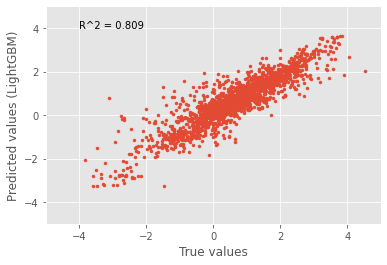

In [138]:
# Scatter plot

limits = -5,5
plt.figsize=(10,10)

plt.scatter(knn_5preds['y_test0'], knn_5preds['y_pred_knn_ave'], marker=".")
lin = np.linspace(*limits, 100)

plt.ylabel("Predicted values (LightGBM)")
plt.xlabel("True values")

plt.xlim(limits)
plt.ylim(limits)

plt.annotate("R^2 = {:.3f}".format(r2_score(knn_5preds['y_test0'], knn_5preds['y_pred_knn_ave'])), (-4, 4))
plt.show()

In [139]:
#cross valide using this optimized KNN 
knn_baseline_CVscore = cross_val_score(knn_reg, X, Y, cv=10, scoring="r2")
#cv_knn_opt_testSet = cross_val_score(optimized_knn, X, Y, cv=10, scoring="r2")
cv_knn_opt = cross_val_score(optimizedCV_knn, X, Y, cv=10, scoring="r2")
print("KNN baseline model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(knn_baseline_CVscore), np.std(knn_baseline_CVscore, ddof=1)))
#print("KNN optimized model (tested on Y_te) r2_score %0.4f with a standard deviation of %0.4f" % (cv_knn_opt_testSet.mean(), cv_knn_opt_testSet.std()))
print("KNN optimized model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(cv_knn_opt), np.std(cv_knn_opt, ddof=1)))

KNN baseline model r2_score 0.6903 with a standard deviation of 0.0471
KNN optimized model r2_score 0.7072 with a standard deviation of 0.0428


In [140]:
joblib.dump(knn_reg, "./knn_reg.joblib")
#joblib.dump(optimized_knn, "./optimized_knn.joblib")
joblib.dump(optimizedCV_knn, "./optimizedCV_knn.joblib")
#loaded_rf = joblib.load("./optimized_rf.joblib")

['./optimizedCV_knn.joblib']

## Support Vector 

In [141]:
%%time

r2_scores = np.empty(10)
TP =np.empty(10)
TN = np.empty(10)
FP = np.empty(10)
FN = np.empty(10)
Accuracy = np.empty(10)
Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
f1_scores = np.empty(10)
f1_scores_W = np.empty(10)
f1_scores_M = np.empty(10)
BA_scores = np.empty(10)
MCC = np.empty(10)
NPV = np.empty(10)
ROC_AUC= np.empty(10)



for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = Y[train_idx], Y[test_idx]

    svm_reg = SVR()
    
    svm_reg.fit(X_train, y_train, )

    y_pred = svm_reg.predict(X_test) 
    # r2 score of the regression model before evaluating categorical evaluation parameters
    r2_scores[idx] = r2_score(y_test, y_pred)
    # now convert the resuls to binary with cutoff 6.3
    y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
    y_pred_cat = np.where(((y_pred >= 2) | (y_pred <= -2)), 1, 0)
    #calculate the evaluation results
    conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
    TP[idx] = conf_matrix[1][1]
    TN[idx] = conf_matrix[0][0]
    FP[idx] = conf_matrix[0][1] 
    FN[idx] = conf_matrix[1][0]
    Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
    Precision[idx] = precision_score(y_test_cat, y_pred_cat)
    Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
    Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
    f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
    f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
    f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
    BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
    MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
    NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
    ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)


mat_met = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       }) 
    
print(mat_met)


                 Metric  Value (average)  Value (std)
0                    R2         0.709710     0.046285
1                    TP        14.300000     2.496664
2                    TN       155.400000     0.966092
3                    FP         2.200000     1.032796
4                    FN        19.100000     2.131770
5              Accuracy         0.888482     0.012597
6             Precision         0.865499     0.060138
7           Sensitivity         0.427408     0.067799
8           Specificity         0.986050     0.006498
9              F1 score         0.570002     0.066974
10  F1 score (weighted)         0.872064     0.016531
11     F1 score (macro)         0.752952     0.036775
12    Balanced Accuracy         0.706736     0.034654
13                  MCC         0.558138     0.064658
14                  NPV         0.890680     0.010926
15              ROC_AUC         0.706736     0.034654
CPU times: user 18.6 s, sys: 0 ns, total: 18.6 s
Wall time: 18.6 s


In [142]:
def objective_svm_CV(trial, X, Y, Y_class):
    param_grid = {
        "C" : trial.suggest_categorical("C", [np.exp2(-7), np.exp2(-6), np.exp2(-5), np.exp2(-4), np.exp2(-3), np.exp2(-2),
                                              np.exp2(-1), np.exp2(0), np.exp2(1), np.exp2(2), np.exp2(3), np.exp2(4),
                                             np.exp2(5), np.exp2(6), np.exp2(7)]),
        "gamma" :trial.suggest_categorical("gamma", [np.exp2(-15), np.exp2(-14), np.exp2(-13), np.exp2(-12), np.exp2(-11), 
                                                     np.exp2(-10),np.exp2(-9), np.exp2(-8), np.exp2(-7), np.exp2(-6), np.exp2(-5), 
                                                     np.exp2(-4),np.exp2(-3), np.exp2(-2), np.exp2(-1), np.exp2(0), np.exp2(1),
                                                     np.exp2(2), np.exp2(3)]),
        #"kernel" : trial.suggest_categorical("kernel", ['linear', 'rbf', 'sigmoid']),
        #"degree": trial.suggest_int("degree", 3, 10)
        #"device_type": trial.suggest_categorical("device_type", ['gpu'])
        
    }
    
    
    cv_scores=np.empty(10)
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        svm_model = SVR(**param_grid)
        svm_model.fit(X_train,y_train)
    
        y_pred = svm_model.predict(X_test)
    
    
        cv_scores[idx] = r2_score(y_test, y_pred)
       
        
    return np.mean(cv_scores)


In [143]:
def detailed_objective_svm_cv(trial, X, Y, Y_class):
    param_grid = {
        "C" : trial.suggest_categorical("C", [np.exp2(-7), np.exp2(-6), np.exp2(-5), np.exp2(-4), np.exp2(-3), np.exp2(-2),
                                              np.exp2(-1), np.exp2(0), np.exp2(1), np.exp2(2), np.exp2(3), np.exp2(4),
                                             np.exp2(5), np.exp2(6), np.exp2(7)]),
        "gamma" :trial.suggest_categorical("gamma", [np.exp2(-15), np.exp2(-14), np.exp2(-13), np.exp2(-12), np.exp2(-11), 
                                                     np.exp2(-10),np.exp2(-9), np.exp2(-8), np.exp2(-7), np.exp2(-6), np.exp2(-5), 
                                                     np.exp2(-4),np.exp2(-3), np.exp2(-2), np.exp2(-1), np.exp2(0), np.exp2(1),
                                                     np.exp2(2), np.exp2(3)]),
        #"kernel" : trial.suggest_categorical("kernel", ['linear', 'rbf', 'sigmoid']),
        #"degree": trial.suggest_int("degree", 3, 10)
        #"device_type": trial.suggest_categorical("device_type", ['gpu'])
        
    }
    
    r2_scores = np.empty(10)
    TP =np.empty(10)
    TN = np.empty(10)
    FP = np.empty(10)
    FN = np.empty(10)
    Accuracy = np.empty(10)
    Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
    Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
    Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
    f1_scores = np.empty(10)
    f1_scores_W = np.empty(10)
    f1_scores_M = np.empty(10)
    BA_scores = np.empty(10)
    MCC = np.empty(10)
    NPV = np.empty(10)
    ROC_AUC= np.empty(10)

    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        svm_model = SVR(**param_grid)
        svm_model.fit(X_train,y_train)
    
        y_pred = svm_model.predict(X_test)
        
        # r2 score of the regression model before evaluating categorical evaluation parameters
        r2_scores[idx] = r2_score(y_test, y_pred)
        # now convert the resuls to binary with cutoff 6.3
        y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
        y_pred_cat = np.where(((y_pred >= 2) | (y_pred <= -2)), 1, 0)
        #calculate the evaluation results
        conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
        Precision[idx] = precision_score(y_test_cat, y_pred_cat)
        Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
        f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
        MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)


    mat_met = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [ np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })  
    
    return(mat_met)
   

In [144]:
#Execute optuna and set hyperparameters
study_svm = optuna.create_study(direction='maximize', study_name="SVM_regressor_CV")
func_svm_0 = lambda trial: objective_svm_CV(trial, X_trainSet0, Y_trainSet0, Y_trainSet0_class)
study_svm.optimize(func_svm_0, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 09:09:18,630] A new study created in memory with name: SVM_regressor_CV
[I 2023-02-22 09:09:30,801] Trial 0 finished with value: 0.7205055534411337 and parameters: {'C': 32.0, 'gamma': 0.015625}. Best is trial 0 with value: 0.7205055534411337.
[I 2023-02-22 09:09:42,995] Trial 1 finished with value: 0.7037196683681222 and parameters: {'C': 16.0, 'gamma': 0.03125}. Best is trial 0 with value: 0.7205055534411337.
[I 2023-02-22 09:09:56,102] Trial 2 finished with value: 0.035888448674564956 and parameters: {'C': 1.0, 'gamma': 0.5}. Best is trial 0 with value: 0.7205055534411337.
[I 2023-02-22 09:10:08,884] Trial 3 finished with value: 0.6329223936873076 and parameters: {'C': 32.0, 'gamma': 0.0009765625}. Best is trial 0 with value: 0.7205055534411337.
[I 2023-02-22 09:10:22,013] Trial 4 finished with value: 0.026836659656775806 and parameters: {'C': 1.0, 'gamma': 1.0}. Best is trial 0 with value: 0.7205055534411337.
[I 2023-02-22 09:10:35,209] Trial 5 finished with value: 0.

[I 2023-02-22 09:18:45,988] Trial 44 finished with value: -0.0036003729840812905 and parameters: {'C': 0.0078125, 'gamma': 0.25}. Best is trial 28 with value: 0.7229092165665432.
[I 2023-02-22 09:18:58,080] Trial 45 finished with value: 0.7229092165665432 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 28 with value: 0.7229092165665432.
[I 2023-02-22 09:19:11,688] Trial 46 finished with value: -0.0027516788613614063 and parameters: {'C': 0.03125, 'gamma': 8.0}. Best is trial 28 with value: 0.7229092165665432.
[I 2023-02-22 09:19:23,809] Trial 47 finished with value: 0.704051647214755 and parameters: {'C': 4.0, 'gamma': 0.0078125}. Best is trial 28 with value: 0.7229092165665432.
[I 2023-02-22 09:19:36,979] Trial 48 finished with value: 0.0027265551876913706 and parameters: {'C': 0.125, 'gamma': 4.0}. Best is trial 28 with value: 0.7229092165665432.
[I 2023-02-22 09:19:49,546] Trial 49 finished with value: 0.47617668164117155 and parameters: {'C': 0.5, 'gamma': 0.001953125}

	Number of trials: 50.0
	Best value (r2_score): 0.7229
	Best params:
		C: 4.0
		gamma: 0.015625


In [145]:
#Create an instance with tuned hyperparameters

optimized_svm_0 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_0.fit(X_trainSet0,Y_trainSet0,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_0 = optimized_svm_0.predict(X_testSet0)
r2_scores = r2_score(Y_testSet0, y_pred_svm_0)
# now convert the resuls to binary with cutoff 6.3
Y_testSet0_cat = np.where(((Y_testSet0>=2) | (Y_testSet0<=-2)), 1, 0) 
y_pred_svm_0_cat = np.where(((y_pred_svm_0 >= 2) | (y_pred_svm_0 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet0_cat, y_pred_svm_0_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet0_cat, y_pred_svm_0_cat)
Precision = precision_score(Y_testSet0_cat, y_pred_svm_0_cat)
Sensitivity = recall_score(Y_testSet0_cat, y_pred_svm_0_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet0_cat, y_pred_svm_0_cat)      
f1_scores_W = f1_score(Y_testSet0_cat, y_pred_svm_0_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet0_cat, y_pred_svm_0_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet0_cat, y_pred_svm_0_cat)
MCC = matthews_corrcoef(Y_testSet0_cat, y_pred_svm_0_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet0_cat, y_pred_svm_0_cat)
    

mat_met_svm_test = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Set0':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })    
print(mat_met_svm_test)


                 Metric        Set0
0                    R2    0.728270
1                    TP   36.000000
2                    TN  304.000000
3                    FP    9.000000
4                    FN   33.000000
5              Accuracy    0.890052
6             Precision    0.800000
7           Sensitivity    0.521739
8           Specificity    0.971200
9              F1 score    0.631579
10  F1 score (weighted)    0.880509
11     F1 score (macro)    0.783482
12    Balanced Accuracy    0.746493
13                  MCC    0.588314
14                  NPV    0.902100
15              ROC_AUC    0.746493


In [146]:
#Execute optuna and set hyperparameters
func_svm_1 = lambda trial: objective_svm_CV(trial, X_trainSet1, Y_trainSet1, Y_trainSet1_class)
study_svm.optimize(func_svm_1, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 09:20:04,024] Trial 50 finished with value: 0.23824500216217018 and parameters: {'C': 0.0625, 'gamma': 0.00390625}. Best is trial 28 with value: 0.7229092165665432.
[I 2023-02-22 09:20:16,137] Trial 51 finished with value: 0.7222959385637544 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 28 with value: 0.7229092165665432.
[I 2023-02-22 09:20:28,252] Trial 52 finished with value: 0.7222959385637544 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 28 with value: 0.7229092165665432.
[I 2023-02-22 09:20:40,363] Trial 53 finished with value: 0.7222959385637544 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 28 with value: 0.7229092165665432.
[I 2023-02-22 09:20:52,791] Trial 54 finished with value: 0.5898982133230432 and parameters: {'C': 64.0, 'gamma': 6.103515625e-05}. Best is trial 28 with value: 0.7229092165665432.
[I 2023-02-22 09:21:04,980] Trial 55 finished with value: 0.7228650832155777 and parameters: {'C': 16.0, 'gamma': 0.01562

[I 2023-02-22 09:29:11,615] Trial 94 finished with value: 0.5462390255815144 and parameters: {'C': 0.25, 'gamma': 0.015625}. Best is trial 86 with value: 0.7250943070916923.
[I 2023-02-22 09:29:23,733] Trial 95 finished with value: 0.6983685056131176 and parameters: {'C': 2.0, 'gamma': 0.03125}. Best is trial 86 with value: 0.7250943070916923.
[I 2023-02-22 09:29:35,846] Trial 96 finished with value: 0.7222959385637544 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 86 with value: 0.7250943070916923.
[I 2023-02-22 09:29:48,999] Trial 97 finished with value: 0.052541851290079836 and parameters: {'C': 4.0, 'gamma': 0.5}. Best is trial 86 with value: 0.7250943070916923.
[I 2023-02-22 09:30:02,002] Trial 98 finished with value: 0.07409021013644519 and parameters: {'C': 0.0078125, 'gamma': 0.015625}. Best is trial 86 with value: 0.7250943070916923.
[I 2023-02-22 09:30:15,110] Trial 99 finished with value: -0.0020720153170107223 and parameters: {'C': 0.03125, 'gamma': 1.0}. Best

	Number of trials: 100.0
	Best value (r2_score): 0.7251
	Best params:
		C: 8.0
		gamma: 0.015625


In [147]:
#Create an instance with tuned hyperparameters

optimized_svm_1 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_1.fit(X_trainSet1,Y_trainSet1,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_1 = optimized_svm_1.predict(X_testSet1)
r2_scores = r2_score(Y_testSet1, y_pred_svm_1)
# now convert the resuls to binary with cutoff 6.3
Y_testSet1_cat = np.where(((Y_testSet1>=2) | (Y_testSet1<=-2)), 1, 0) 
y_pred_svm_1_cat = np.where(((y_pred_svm_1 >= 2) | (y_pred_svm_1 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet1_cat, y_pred_svm_1_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet1_cat, y_pred_svm_1_cat)
Precision = precision_score(Y_testSet1_cat, y_pred_svm_1_cat)
Sensitivity = recall_score(Y_testSet1_cat, y_pred_svm_1_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet1_cat, y_pred_svm_1_cat)      
f1_scores_W = f1_score(Y_testSet1_cat, y_pred_svm_1_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet1_cat, y_pred_svm_1_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet1_cat, y_pred_svm_1_cat)
MCC = matthews_corrcoef(Y_testSet1_cat, y_pred_svm_1_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet1_cat, y_pred_svm_1_cat)
    

set1 = pd.DataFrame({'Set1':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set1'] = set1
print(mat_met_svm_test)


                 Metric        Set0        Set1
0                    R2    0.728270    0.732425
1                    TP   36.000000   36.000000
2                    TN  304.000000  310.000000
3                    FP    9.000000    4.000000
4                    FN   33.000000   32.000000
5              Accuracy    0.890052    0.905759
6             Precision    0.800000    0.900000
7           Sensitivity    0.521739    0.529412
8           Specificity    0.971200    0.987300
9              F1 score    0.631579    0.666667
10  F1 score (weighted)    0.880509    0.895554
11     F1 score (macro)    0.783482    0.805894
12    Balanced Accuracy    0.746493    0.758336
13                  MCC    0.588314    0.645494
14                  NPV    0.902100    0.906400
15              ROC_AUC    0.746493    0.758336


In [148]:
#Execute optuna and set hyperparameters
func_svm_2 = lambda trial: objective_svm_CV(trial, X_trainSet2, Y_trainSet2, Y_trainSet2_class)
study_svm.optimize(func_svm_2, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 09:30:29,608] Trial 100 finished with value: 0.17599749780465646 and parameters: {'C': 0.125, 'gamma': 0.0009765625}. Best is trial 86 with value: 0.7250943070916923.
[I 2023-02-22 09:30:41,768] Trial 101 finished with value: 0.7182401474447313 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 86 with value: 0.7250943070916923.
[I 2023-02-22 09:30:53,933] Trial 102 finished with value: 0.7182401474447313 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 86 with value: 0.7250943070916923.
[I 2023-02-22 09:31:06,093] Trial 103 finished with value: 0.7182401474447313 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 86 with value: 0.7250943070916923.
[I 2023-02-22 09:31:19,338] Trial 104 finished with value: 0.019431011842076174 and parameters: {'C': 0.5, 'gamma': 2.0}. Best is trial 86 with value: 0.7250943070916923.
[I 2023-02-22 09:31:31,501] Trial 105 finished with value: 0.7182401474447313 and parameters: {'C': 4.0, 'gamma': 0.015625}. B

[I 2023-02-22 09:39:40,858] Trial 144 finished with value: 0.034020422491106615 and parameters: {'C': 4.0, 'gamma': 2.0}. Best is trial 86 with value: 0.7250943070916923.
[I 2023-02-22 09:39:53,503] Trial 145 finished with value: 0.3201638713689837 and parameters: {'C': 0.0625, 'gamma': 0.015625}. Best is trial 86 with value: 0.7250943070916923.
[I 2023-02-22 09:40:05,730] Trial 146 finished with value: 0.7148342816311603 and parameters: {'C': 64.0, 'gamma': 0.015625}. Best is trial 86 with value: 0.7250943070916923.
[I 2023-02-22 09:40:18,135] Trial 147 finished with value: 0.5967087174865149 and parameters: {'C': 8.0, 'gamma': 0.00048828125}. Best is trial 86 with value: 0.7250943070916923.
[I 2023-02-22 09:40:30,890] Trial 148 finished with value: 0.3839235223059724 and parameters: {'C': 4.0, 'gamma': 0.0001220703125}. Best is trial 86 with value: 0.7250943070916923.
[I 2023-02-22 09:40:43,742] Trial 149 finished with value: 0.1359590841993581 and parameters: {'C': 0.015625, 'gamma'

	Number of trials: 150.0
	Best value (r2_score): 0.7251
	Best params:
		C: 8.0
		gamma: 0.015625


In [149]:
#Create an instance with tuned hyperparameters

optimized_svm_2 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_2.fit(X_trainSet2,Y_trainSet2,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_2 = optimized_svm_2.predict(X_testSet2)
r2_scores = r2_score(Y_testSet2, y_pred_svm_2)
# now convert the resuls to binary with cutoff 6.3
Y_testSet2_cat = np.where(((Y_testSet2>=2) | (Y_testSet2<=-2)), 1, 0) 
y_pred_svm_2_cat = np.where(((y_pred_svm_2 >= 2) | (y_pred_svm_2 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet2_cat, y_pred_svm_2_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet2_cat, y_pred_svm_2_cat)
Precision = precision_score(Y_testSet2_cat, y_pred_svm_2_cat)
Sensitivity = recall_score(Y_testSet2_cat, y_pred_svm_2_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet2_cat, y_pred_svm_2_cat)      
f1_scores_W = f1_score(Y_testSet2_cat, y_pred_svm_2_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet2_cat, y_pred_svm_2_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet2_cat, y_pred_svm_2_cat)
MCC = matthews_corrcoef(Y_testSet2_cat, y_pred_svm_2_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet2_cat, y_pred_svm_2_cat)
    

Set2 = pd.DataFrame({'Set2':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set2'] = Set2
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2
0                    R2    0.728270    0.732425    0.740376
1                    TP   36.000000   36.000000   33.000000
2                    TN  304.000000  310.000000  301.000000
3                    FP    9.000000    4.000000   13.000000
4                    FN   33.000000   32.000000   35.000000
5              Accuracy    0.890052    0.905759    0.874346
6             Precision    0.800000    0.900000    0.717391
7           Sensitivity    0.521739    0.529412    0.485294
8           Specificity    0.971200    0.987300    0.958600
9              F1 score    0.631579    0.666667    0.578947
10  F1 score (weighted)    0.880509    0.895554    0.864347
11     F1 score (macro)    0.783482    0.805894    0.752551
12    Balanced Accuracy    0.746493    0.758336    0.721946
13                  MCC    0.588314    0.645494    0.521734
14                  NPV    0.902100    0.906400    0.895800
15              ROC_AUC    0.746493    0

In [150]:
#Execute optuna and set hyperparameters
func_svm_3 = lambda trial: objective_svm_CV(trial, X_trainSet3, Y_trainSet3, Y_trainSet3_class)
study_svm.optimize(func_svm_3, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 09:40:58,686] Trial 150 finished with value: 0.0812115639718752 and parameters: {'C': 4.0, 'gamma': 0.25}. Best is trial 86 with value: 0.7250943070916923.
[I 2023-02-22 09:41:10,816] Trial 151 finished with value: 0.7108496443522426 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 86 with value: 0.7250943070916923.
[I 2023-02-22 09:41:22,944] Trial 152 finished with value: 0.7108496443522426 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 86 with value: 0.7250943070916923.
[I 2023-02-22 09:41:35,065] Trial 153 finished with value: 0.7108496443522426 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 86 with value: 0.7250943070916923.
[I 2023-02-22 09:41:47,337] Trial 154 finished with value: 0.7071765835028508 and parameters: {'C': 128.0, 'gamma': 0.015625}. Best is trial 86 with value: 0.7250943070916923.
[I 2023-02-22 09:41:59,467] Trial 155 finished with value: 0.7108496443522426 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is

[I 2023-02-22 09:50:05,755] Trial 194 finished with value: 0.7108496443522426 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 86 with value: 0.7250943070916923.
[I 2023-02-22 09:50:17,897] Trial 195 finished with value: 0.7108496443522426 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 86 with value: 0.7250943070916923.
[I 2023-02-22 09:50:31,122] Trial 196 finished with value: 4.909923961750051e-05 and parameters: {'C': 0.015625, 'gamma': 0.0001220703125}. Best is trial 86 with value: 0.7250943070916923.
[I 2023-02-22 09:50:43,256] Trial 197 finished with value: 0.7108496443522426 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 86 with value: 0.7250943070916923.
[I 2023-02-22 09:50:56,475] Trial 198 finished with value: 0.08062738367881664 and parameters: {'C': 16.0, 'gamma': 0.25}. Best is trial 86 with value: 0.7250943070916923.
[I 2023-02-22 09:51:08,760] Trial 199 finished with value: 0.7071765835028508 and parameters: {'C': 128.0, 'gamma': 0

	Number of trials: 200.0
	Best value (r2_score): 0.7251
	Best params:
		C: 8.0
		gamma: 0.015625


In [151]:
#Create an instance with tuned hyperparameters

optimized_svm_3 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_3.fit(X_trainSet3,Y_trainSet3,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_3 = optimized_svm_3.predict(X_testSet3)
r2_scores = r2_score(Y_testSet3, y_pred_svm_3)
# now convert the resuls to binary with cutoff 6.3
Y_testSet3_cat = np.where(((Y_testSet3>=2) | (Y_testSet3<=-2)), 1, 0) 
y_pred_svm_3_cat = np.where(((y_pred_svm_3 >= 2) | (y_pred_svm_3 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet3_cat, y_pred_svm_3_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet3_cat, y_pred_svm_3_cat)
Precision = precision_score(Y_testSet3_cat, y_pred_svm_3_cat)
Sensitivity = recall_score(Y_testSet3_cat, y_pred_svm_3_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet3_cat, y_pred_svm_3_cat)      
f1_scores_W = f1_score(Y_testSet3_cat, y_pred_svm_3_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet3_cat, y_pred_svm_3_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet3_cat, y_pred_svm_3_cat)
MCC = matthews_corrcoef(Y_testSet3_cat, y_pred_svm_3_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet3_cat, y_pred_svm_3_cat)
    

Set3 = pd.DataFrame({'Set3':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set3'] = Set3
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3
0                    R2    0.728270    0.732425    0.740376    0.756597
1                    TP   36.000000   36.000000   33.000000   39.000000
2                    TN  304.000000  310.000000  301.000000  307.000000
3                    FP    9.000000    4.000000   13.000000    8.000000
4                    FN   33.000000   32.000000   35.000000   28.000000
5              Accuracy    0.890052    0.905759    0.874346    0.905759
6             Precision    0.800000    0.900000    0.717391    0.829787
7           Sensitivity    0.521739    0.529412    0.485294    0.582090
8           Specificity    0.971200    0.987300    0.958600    0.974600
9              F1 score    0.631579    0.666667    0.578947    0.684211
10  F1 score (weighted)    0.880509    0.895554    0.864347    0.898942
11     F1 score (macro)    0.783482    0.805894    0.752551    0.814413
12    Balanced Accuracy    0.746493    0.758336    0.721946    0

In [152]:
#Execute optuna and set hyperparameters
func_svm_4 = lambda trial: objective_svm_CV(trial, X_trainSet4, Y_trainSet4, Y_trainSet4_class)
study_svm.optimize(func_svm_4, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 09:51:22,937] Trial 200 finished with value: 0.5566726084483908 and parameters: {'C': 4.0, 'gamma': 0.00048828125}. Best is trial 86 with value: 0.7250943070916923.
[I 2023-02-22 09:51:34,898] Trial 201 finished with value: 0.732729100402606 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 09:51:46,857] Trial 202 finished with value: 0.732729100402606 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 09:51:58,822] Trial 203 finished with value: 0.732729100402606 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 09:52:10,784] Trial 204 finished with value: 0.732729100402606 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 09:52:22,748] Trial 205 finished with value: 0.732729100402606 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best 

[I 2023-02-22 10:00:25,711] Trial 245 finished with value: 0.732729100402606 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:00:38,062] Trial 246 finished with value: 0.6588079715730446 and parameters: {'C': 4.0, 'gamma': 0.001953125}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:00:50,042] Trial 247 finished with value: 0.732729100402606 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:01:02,949] Trial 248 finished with value: 0.11396820662391134 and parameters: {'C': 1.0, 'gamma': 6.103515625e-05}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:01:14,930] Trial 249 finished with value: 0.732729100402606 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 201 with value: 0.732729100402606.


	Number of trials: 250.0
	Best value (r2_score): 0.7327
	Best params:
		C: 4.0
		gamma: 0.015625


In [153]:
#Create an instance with tuned hyperparameters

optimized_svm_4 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_4.fit(X_trainSet4,Y_trainSet4,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_4 = optimized_svm_4.predict(X_testSet4)
r2_scores = r2_score(Y_testSet4, y_pred_svm_4)
# now convert the resuls to binary with cutoff 6.4
Y_testSet4_cat = np.where(((Y_testSet4>=2) | (Y_testSet4<=-2)), 1, 0) 
y_pred_svm_4_cat = np.where(((y_pred_svm_4 >= 2) | (y_pred_svm_4 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet4_cat, y_pred_svm_4_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet4_cat, y_pred_svm_4_cat)
Precision = precision_score(Y_testSet4_cat, y_pred_svm_4_cat)
Sensitivity = recall_score(Y_testSet4_cat, y_pred_svm_4_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet4_cat, y_pred_svm_4_cat)      
f1_scores_W = f1_score(Y_testSet4_cat, y_pred_svm_4_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet4_cat, y_pred_svm_4_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet4_cat, y_pred_svm_4_cat)
MCC = matthews_corrcoef(Y_testSet4_cat, y_pred_svm_4_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet4_cat, y_pred_svm_4_cat)
    

Set4 = pd.DataFrame({'Set4':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set4'] = Set4
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.728270    0.732425    0.740376    0.756597   
1                    TP   36.000000   36.000000   33.000000   39.000000   
2                    TN  304.000000  310.000000  301.000000  307.000000   
3                    FP    9.000000    4.000000   13.000000    8.000000   
4                    FN   33.000000   32.000000   35.000000   28.000000   
5              Accuracy    0.890052    0.905759    0.874346    0.905759   
6             Precision    0.800000    0.900000    0.717391    0.829787   
7           Sensitivity    0.521739    0.529412    0.485294    0.582090   
8           Specificity    0.971200    0.987300    0.958600    0.974600   
9              F1 score    0.631579    0.666667    0.578947    0.684211   
10  F1 score (weighted)    0.880509    0.895554    0.864347    0.898942   
11     F1 score (macro)    0.783482    0.805894    0.752551    0.814413   
12    Balanced Accuracy  

In [154]:
#Execute optuna and set hyperparameters
func_svm_5 = lambda trial: objective_svm_CV(trial, X_trainSet5, Y_trainSet5, Y_trainSet5_class)
study_svm.optimize(func_svm_5, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 10:01:28,937] Trial 250 finished with value: 0.5827370908995875 and parameters: {'C': 32.0, 'gamma': 0.0625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:01:41,936] Trial 251 finished with value: 0.27557097982974155 and parameters: {'C': 2.0, 'gamma': 0.125}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:01:54,811] Trial 252 finished with value: 0.19605877693195445 and parameters: {'C': 4.0, 'gamma': 3.0517578125e-05}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:02:07,170] Trial 253 finished with value: 0.5595613265887528 and parameters: {'C': 0.25, 'gamma': 0.015625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:02:19,231] Trial 254 finished with value: 0.7210682454360278 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:02:31,284] Trial 255 finished with value: 0.7210682454360278 and parameters: {'C': 4.0, 'gamma': 0.015625}

[I 2023-02-22 10:10:38,597] Trial 294 finished with value: 0.015074117122708142 and parameters: {'C': 0.0078125, 'gamma': 0.0625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:10:50,698] Trial 295 finished with value: 0.7210682454360278 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:11:02,797] Trial 296 finished with value: 0.7210682454360278 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:11:14,895] Trial 297 finished with value: 0.7210682454360278 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:11:27,757] Trial 298 finished with value: 0.17213203616409672 and parameters: {'C': 0.03125, 'gamma': 0.03125}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:11:40,963] Trial 299 finished with value: 0.005534916666438916 and parameters: {'C': 0.125, 'gamma': 3.

	Number of trials: 300.0
	Best value (r2_score): 0.7327
	Best params:
		C: 4.0
		gamma: 0.015625


In [155]:
#Create an instance with tuned hyperparameters

optimized_svm_5 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_5.fit(X_trainSet5,Y_trainSet5,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_5 = optimized_svm_5.predict(X_testSet5)
r2_scores = r2_score(Y_testSet5, y_pred_svm_5)
# now convert the resuls to binary with cutoff 6.5
Y_testSet5_cat = np.where(((Y_testSet5>=2) | (Y_testSet5<=-2)), 1, 0) 
y_pred_svm_5_cat = np.where(((y_pred_svm_5 >= 2) | (y_pred_svm_5 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet5_cat, y_pred_svm_5_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet5_cat, y_pred_svm_5_cat)
Precision = precision_score(Y_testSet5_cat, y_pred_svm_5_cat)
Sensitivity = recall_score(Y_testSet5_cat, y_pred_svm_5_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet5_cat, y_pred_svm_5_cat)      
f1_scores_W = f1_score(Y_testSet5_cat, y_pred_svm_5_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet5_cat, y_pred_svm_5_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet5_cat, y_pred_svm_5_cat)
MCC = matthews_corrcoef(Y_testSet5_cat, y_pred_svm_5_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet5_cat, y_pred_svm_5_cat)
    

Set5 = pd.DataFrame({'Set5':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set5'] = Set5
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.728270    0.732425    0.740376    0.756597   
1                    TP   36.000000   36.000000   33.000000   39.000000   
2                    TN  304.000000  310.000000  301.000000  307.000000   
3                    FP    9.000000    4.000000   13.000000    8.000000   
4                    FN   33.000000   32.000000   35.000000   28.000000   
5              Accuracy    0.890052    0.905759    0.874346    0.905759   
6             Precision    0.800000    0.900000    0.717391    0.829787   
7           Sensitivity    0.521739    0.529412    0.485294    0.582090   
8           Specificity    0.971200    0.987300    0.958600    0.974600   
9              F1 score    0.631579    0.666667    0.578947    0.684211   
10  F1 score (weighted)    0.880509    0.895554    0.864347    0.898942   
11     F1 score (macro)    0.783482    0.805894    0.752551    0.814413   
12    Balanced Accuracy  

In [156]:
#Execute optuna and set hyperparameters
func_svm_6 = lambda trial: objective_svm_CV(trial, X_trainSet6, Y_trainSet6, Y_trainSet6_class)
study_svm.optimize(func_svm_6, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 10:11:54,748] Trial 300 finished with value: 0.7127859797569068 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:12:07,022] Trial 301 finished with value: 0.637531721295862 and parameters: {'C': 0.5, 'gamma': 0.015625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:12:19,106] Trial 302 finished with value: 0.7127859797569068 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:12:31,192] Trial 303 finished with value: 0.7127859797569068 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:12:43,553] Trial 304 finished with value: 0.5970814959564432 and parameters: {'C': 4.0, 'gamma': 0.0009765625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:12:56,111] Trial 305 finished with value: 0.3331311784036584 and parameters: {'C': 0.0625, 'gamma': 0.015625}.

[I 2023-02-22 10:21:03,545] Trial 344 finished with value: 0.7127859797569068 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:21:15,657] Trial 345 finished with value: 0.7127859797569068 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:21:29,658] Trial 346 finished with value: 0.5804483721809923 and parameters: {'C': 128.0, 'gamma': 0.0009765625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:21:41,737] Trial 347 finished with value: 0.7127859797569068 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:21:54,812] Trial 348 finished with value: -0.0036631646227926586 and parameters: {'C': 0.015625, 'gamma': 1.0}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:22:06,899] Trial 349 finished with value: 0.7127859797569068 and parameters: {'C': 4.0, 'gamma': 0.0156

	Number of trials: 350.0
	Best value (r2_score): 0.7327
	Best params:
		C: 4.0
		gamma: 0.015625


In [157]:
#Create an instance with tuned hyperparameters

optimized_svm_6 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_6.fit(X_trainSet6,Y_trainSet6,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_6 = optimized_svm_6.predict(X_testSet6)
r2_scores = r2_score(Y_testSet6, y_pred_svm_6)
# now convert the resuls to binary with cutoff 6.6
Y_testSet6_cat = np.where(((Y_testSet6>=2) | (Y_testSet6<=-2)), 1, 0) 
y_pred_svm_6_cat = np.where(((y_pred_svm_6 >= 2) | (y_pred_svm_6 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet6_cat, y_pred_svm_6_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet6_cat, y_pred_svm_6_cat)
Precision = precision_score(Y_testSet6_cat, y_pred_svm_6_cat)
Sensitivity = recall_score(Y_testSet6_cat, y_pred_svm_6_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet6_cat, y_pred_svm_6_cat)      
f1_scores_W = f1_score(Y_testSet6_cat, y_pred_svm_6_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet6_cat, y_pred_svm_6_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet6_cat, y_pred_svm_6_cat)
MCC = matthews_corrcoef(Y_testSet6_cat, y_pred_svm_6_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet6_cat, y_pred_svm_6_cat)
    

Set6 = pd.DataFrame({'Set6':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set6'] = Set6
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.728270    0.732425    0.740376    0.756597   
1                    TP   36.000000   36.000000   33.000000   39.000000   
2                    TN  304.000000  310.000000  301.000000  307.000000   
3                    FP    9.000000    4.000000   13.000000    8.000000   
4                    FN   33.000000   32.000000   35.000000   28.000000   
5              Accuracy    0.890052    0.905759    0.874346    0.905759   
6             Precision    0.800000    0.900000    0.717391    0.829787   
7           Sensitivity    0.521739    0.529412    0.485294    0.582090   
8           Specificity    0.971200    0.987300    0.958600    0.974600   
9              F1 score    0.631579    0.666667    0.578947    0.684211   
10  F1 score (weighted)    0.880509    0.895554    0.864347    0.898942   
11     F1 score (macro)    0.783482    0.805894    0.752551    0.814413   
12    Balanced Accuracy  

In [158]:
#Execute optuna and set hyperparameters
func_svm_7 = lambda trial: objective_svm_CV(trial, X_trainSet7, Y_trainSet7, Y_trainSet7_class)
study_svm.optimize(func_svm_7, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 10:22:20,784] Trial 350 finished with value: 0.7185225521040166 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:22:34,032] Trial 351 finished with value: 0.06056291571506519 and parameters: {'C': 8.0, 'gamma': 0.5}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:22:46,156] Trial 352 finished with value: 0.7185225521040166 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:22:58,275] Trial 353 finished with value: 0.7185225521040166 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:23:11,539] Trial 354 finished with value: 0.0399670870971234 and parameters: {'C': 4.0, 'gamma': 2.0}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:23:23,657] Trial 355 finished with value: 0.7185225521040166 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 

[I 2023-02-22 10:31:30,720] Trial 394 finished with value: 0.7185225521040166 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:31:42,852] Trial 395 finished with value: 0.7185225521040166 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:31:56,136] Trial 396 finished with value: 0.039445007840804736 and parameters: {'C': 32.0, 'gamma': 2.0}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:32:08,263] Trial 397 finished with value: 0.7185225521040166 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:32:20,396] Trial 398 finished with value: 0.6885626546790831 and parameters: {'C': 1.0, 'gamma': 0.015625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:32:32,520] Trial 399 finished with value: 0.7185225521040166 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is

	Number of trials: 400.0
	Best value (r2_score): 0.7327
	Best params:
		C: 4.0
		gamma: 0.015625


In [159]:
#Create an instance with tuned hyperparameters

optimized_svm_7 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_7.fit(X_trainSet7,Y_trainSet7,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_7 = optimized_svm_7.predict(X_testSet7)
r2_scores = r2_score(Y_testSet7, y_pred_svm_7)
# now convert the resuls to binary with cutoff 6.7
Y_testSet7_cat = np.where(((Y_testSet7>=2) | (Y_testSet7<=-2)), 1, 0) 
y_pred_svm_7_cat = np.where(((y_pred_svm_7 >= 2) | (y_pred_svm_7 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet7_cat, y_pred_svm_7_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet7_cat, y_pred_svm_7_cat)
Precision = precision_score(Y_testSet7_cat, y_pred_svm_7_cat)
Sensitivity = recall_score(Y_testSet7_cat, y_pred_svm_7_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet7_cat, y_pred_svm_7_cat)      
f1_scores_W = f1_score(Y_testSet7_cat, y_pred_svm_7_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet7_cat, y_pred_svm_7_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet7_cat, y_pred_svm_7_cat)
MCC = matthews_corrcoef(Y_testSet7_cat, y_pred_svm_7_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet7_cat, y_pred_svm_7_cat)
    

Set7 = pd.DataFrame({'Set7':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set7'] = Set7
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.728270    0.732425    0.740376    0.756597   
1                    TP   36.000000   36.000000   33.000000   39.000000   
2                    TN  304.000000  310.000000  301.000000  307.000000   
3                    FP    9.000000    4.000000   13.000000    8.000000   
4                    FN   33.000000   32.000000   35.000000   28.000000   
5              Accuracy    0.890052    0.905759    0.874346    0.905759   
6             Precision    0.800000    0.900000    0.717391    0.829787   
7           Sensitivity    0.521739    0.529412    0.485294    0.582090   
8           Specificity    0.971200    0.987300    0.958600    0.974600   
9              F1 score    0.631579    0.666667    0.578947    0.684211   
10  F1 score (weighted)    0.880509    0.895554    0.864347    0.898942   
11     F1 score (macro)    0.783482    0.805894    0.752551    0.814413   
12    Balanced Accuracy  

In [160]:
#Execute optuna and set hyperparameters
func_svm_8 = lambda trial: objective_svm_CV(trial, X_trainSet8, Y_trainSet8, Y_trainSet8_class)
study_svm.optimize(func_svm_8, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 10:32:46,364] Trial 400 finished with value: 0.7121169002807722 and parameters: {'C': 2.0, 'gamma': 0.015625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:32:59,069] Trial 401 finished with value: 0.3977309906304868 and parameters: {'C': 4.0, 'gamma': 0.0001220703125}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:33:11,276] Trial 402 finished with value: 0.7175024573436747 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:33:23,858] Trial 403 finished with value: 0.5552624520641278 and parameters: {'C': 4.0, 'gamma': 0.00048828125}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:33:37,148] Trial 404 finished with value: 0.02487285850184474 and parameters: {'C': 0.25, 'gamma': 0.25}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:33:49,355] Trial 405 finished with value: 0.7175024573436747 and parameters: {'C': 4.0, 'gamma': 0.0156

[I 2023-02-22 10:42:00,258] Trial 444 finished with value: -0.003684830558219976 and parameters: {'C': 0.0078125, 'gamma': 2.0}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:42:12,439] Trial 445 finished with value: 0.7175024573436747 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:42:25,729] Trial 446 finished with value: 0.02965355054937502 and parameters: {'C': 0.03125, 'gamma': 0.00048828125}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:42:37,994] Trial 447 finished with value: 0.7175024573436747 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:42:51,351] Trial 448 finished with value: 0.07769387532640494 and parameters: {'C': 4.0, 'gamma': 0.25}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:43:04,085] Trial 449 finished with value: 0.44974885801449 and parameters: {'C': 0.125, 'gamma': 0.015

	Number of trials: 450.0
	Best value (r2_score): 0.7327
	Best params:
		C: 4.0
		gamma: 0.015625


In [161]:
#Create an instance with tuned hyperparameters

optimized_svm_8 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_8.fit(X_trainSet8,Y_trainSet8,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_8 = optimized_svm_8.predict(X_testSet8)
r2_scores = r2_score(Y_testSet8, y_pred_svm_8)
# now convert the resuls to binary with cutoff 6.8
Y_testSet8_cat = np.where(((Y_testSet8>=2) | (Y_testSet8<=-2)), 1, 0) 
y_pred_svm_8_cat = np.where(((y_pred_svm_8 >= 2) | (y_pred_svm_8 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet8_cat, y_pred_svm_8_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet8_cat, y_pred_svm_8_cat)
Precision = precision_score(Y_testSet8_cat, y_pred_svm_8_cat)
Sensitivity = recall_score(Y_testSet8_cat, y_pred_svm_8_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet8_cat, y_pred_svm_8_cat)      
f1_scores_W = f1_score(Y_testSet8_cat, y_pred_svm_8_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet8_cat, y_pred_svm_8_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet8_cat, y_pred_svm_8_cat)
MCC = matthews_corrcoef(Y_testSet8_cat, y_pred_svm_8_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet8_cat, y_pred_svm_8_cat)
    

Set8 = pd.DataFrame({'Set8':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set8'] = Set8
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.728270    0.732425    0.740376    0.756597   
1                    TP   36.000000   36.000000   33.000000   39.000000   
2                    TN  304.000000  310.000000  301.000000  307.000000   
3                    FP    9.000000    4.000000   13.000000    8.000000   
4                    FN   33.000000   32.000000   35.000000   28.000000   
5              Accuracy    0.890052    0.905759    0.874346    0.905759   
6             Precision    0.800000    0.900000    0.717391    0.829787   
7           Sensitivity    0.521739    0.529412    0.485294    0.582090   
8           Specificity    0.971200    0.987300    0.958600    0.974600   
9              F1 score    0.631579    0.666667    0.578947    0.684211   
10  F1 score (weighted)    0.880509    0.895554    0.864347    0.898942   
11     F1 score (macro)    0.783482    0.805894    0.752551    0.814413   
12    Balanced Accuracy  

In [162]:
#Execute optuna and set hyperparameters
func_svm_9 = lambda trial: objective_svm_CV(trial, X_trainSet9, Y_trainSet9, Y_trainSet9_class)
study_svm.optimize(func_svm_9, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-02-22 10:43:19,222] Trial 450 finished with value: 0.025818275072507092 and parameters: {'C': 4.0, 'gamma': 4.0}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:43:31,378] Trial 451 finished with value: 0.7177577993441846 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:43:43,534] Trial 452 finished with value: 0.7177577993441846 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:43:55,883] Trial 453 finished with value: 0.6732602697248062 and parameters: {'C': 4.0, 'gamma': 0.00390625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:44:08,248] Trial 454 finished with value: 0.6384043446864224 and parameters: {'C': 0.5, 'gamma': 0.015625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:44:21,468] Trial 455 finished with value: 0.03255568945381253 and parameters: {'C': 0.0625, 'gamma': 0.00024414062

[I 2023-02-22 10:52:29,837] Trial 494 finished with value: 0.7177577993441846 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:52:43,211] Trial 495 finished with value: 0.025821283879391765 and parameters: {'C': 64.0, 'gamma': 4.0}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:52:57,039] Trial 496 finished with value: 0.025549716787923848 and parameters: {'C': 4.0, 'gamma': 8.0}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:53:09,260] Trial 497 finished with value: 0.7049533669577431 and parameters: {'C': 4.0, 'gamma': 0.0078125}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:53:22,246] Trial 498 finished with value: 0.14356463590454216 and parameters: {'C': 0.015625, 'gamma': 0.015625}. Best is trial 201 with value: 0.732729100402606.
[I 2023-02-22 10:53:34,931] Trial 499 finished with value: 0.681047575304757 and parameters: {'C': 16.0, 'gamma': 0.00390625}. B

	Number of trials: 500.0
	Best value (r2_score): 0.7327
	Best params:
		C: 4.0
		gamma: 0.015625


In [163]:
#Create an instance with tuned hyperparameters

optimized_svm_9 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_9.fit(X_trainSet9,Y_trainSet9,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_9 = optimized_svm_9.predict(X_testSet9)
r2_scores = r2_score(Y_testSet9, y_pred_svm_9)
# now convert the resuls to binary with cutoff 6.9
Y_testSet9_cat = np.where(((Y_testSet9>=2) | (Y_testSet9<=-2)), 1, 0) 
y_pred_svm_9_cat = np.where(((y_pred_svm_9 >= 2) | (y_pred_svm_9 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet9_cat, y_pred_svm_9_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet9_cat, y_pred_svm_9_cat)
Precision = precision_score(Y_testSet9_cat, y_pred_svm_9_cat)
Sensitivity = recall_score(Y_testSet9_cat, y_pred_svm_9_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet9_cat, y_pred_svm_9_cat)      
f1_scores_W = f1_score(Y_testSet9_cat, y_pred_svm_9_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet9_cat, y_pred_svm_9_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet9_cat, y_pred_svm_9_cat)
MCC = matthews_corrcoef(Y_testSet9_cat, y_pred_svm_9_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet9_cat, y_pred_svm_9_cat)
    

Set9 = pd.DataFrame({'Set9':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set9'] = Set9
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.728270    0.732425    0.740376    0.756597   
1                    TP   36.000000   36.000000   33.000000   39.000000   
2                    TN  304.000000  310.000000  301.000000  307.000000   
3                    FP    9.000000    4.000000   13.000000    8.000000   
4                    FN   33.000000   32.000000   35.000000   28.000000   
5              Accuracy    0.890052    0.905759    0.874346    0.905759   
6             Precision    0.800000    0.900000    0.717391    0.829787   
7           Sensitivity    0.521739    0.529412    0.485294    0.582090   
8           Specificity    0.971200    0.987300    0.958600    0.974600   
9              F1 score    0.631579    0.666667    0.578947    0.684211   
10  F1 score (weighted)    0.880509    0.895554    0.864347    0.898942   
11     F1 score (macro)    0.783482    0.805894    0.752551    0.814413   
12    Balanced Accuracy  

In [164]:
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

	Number of trials: 500.0
	Best value (r2_score): 0.7327
	Best params:
		C: 4.0
		gamma: 0.015625


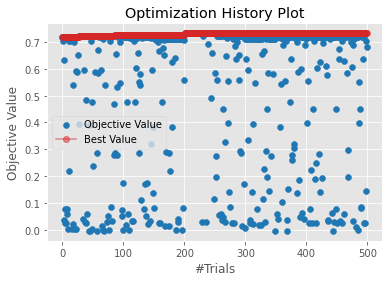

In [165]:
from optuna.visualization.matplotlib import plot_optimization_history

plot_optimization_history(study_svm);

In [166]:
#from optuna.visualization.matplotlib import plot_param_importances

#plot_param_importances(study_svm);

In [167]:
detailed_objective_svm_cv(study_svm.best_trial, X, Y, Y_class)

,Metric,Value (average),Value (std)
0,R2,0.740221,0.038667
1,TP,16.800000,2.347576
2,TN,154.100000,1.286684
3,FP,3.500000,1.080123
4,FN,16.600000,1.577621
5,Accuracy,0.894764,0.012931
6,Precision,0.825413,0.056121
7,Sensitivity,0.501781,0.057208
8,Specificity,0.977810,0.006806
9,F1 score,0.623558,0.058286


In [168]:
mat_met_svm_test['ave'] = mat_met_svm_test.iloc[:,1:11].mean(axis='columns', numeric_only=True)
mat_met_svm_test['std'] = mat_met_svm_test.iloc[:,1:11].std(axis='columns', numeric_only=True)
mat_met_svm_test

,Metric,Set0,Set1,Set2,Set3,Set4,Set5,Set6,Set7,Set8,Set9,ave,std
0,R2,0.728270,0.732425,0.740376,0.756597,0.673235,0.713100,0.733415,0.735893,0.696699,0.717591,0.722760,0.023844
1,TP,36.000000,36.000000,33.000000,39.000000,35.000000,36.000000,28.000000,36.000000,35.000000,29.000000,34.300000,3.400980
2,TN,304.000000,310.000000,301.000000,307.000000,306.000000,303.000000,306.000000,309.000000,309.000000,311.000000,306.600000,3.238655
3,FP,9.000000,4.000000,13.000000,8.000000,9.000000,9.000000,9.000000,5.000000,4.000000,4.000000,7.400000,3.025815
4,FN,33.000000,32.000000,35.000000,28.000000,32.000000,34.000000,39.000000,32.000000,34.000000,38.000000,33.700000,3.164034
5,Accuracy,0.890052,0.905759,0.874346,0.905759,0.892670,0.887435,0.874346,0.903141,0.900524,0.890052,0.892408,0.011671
6,Precision,0.800000,0.900000,0.717391,0.829787,0.795455,0.800000,0.756757,0.878049,0.897436,0.878788,0.825366,0.062326
7,Sensitivity,0.521739,0.529412,0.485294,0.582090,0.522388,0.514286,0.417910,0.529412,0.507246,0.432836,0.504261,0.048286
8,Specificity,0.971200,0.987300,0.958600,0.974600,0.971400,0.971200,0.971400,0.984100,0.987200,0.987300,0.976430,0.009648
9,F1 score,0.631579,0.666667,0.578947,0.684211,0.630631,0.626087,0.538462,0.660550,0.648148,0.580000,0.624528,0.045644


In [169]:
#change to fit into these X values 

TP = np.empty(10)
FP = np.empty(10)
TN = np.empty(10)
FN = np.empty(10)

r2_scores_outer = []
Accuracy_outer = []
Precision_outer = [] #Also called Positive Predictive Value(PPV)
Sensitivity_outer = [] # Also called Recall or True Positive Rate (TPR)
Specificity_outer = [] #Also called selectivity or True Negative Rate  (TNR)
f1_scores_outer = []
f1_scores_W_outer = []
f1_scores_M_outer = []
BA_scores_outer = []
MCC_outer = []
NPV_outer = []
ROC_AUC_outer = []

NUM_TRIALS = 5
random_state= [687266, 98656, 56, 280189, 76543] # 
data_svm=pd.DataFrame()

for i in range(NUM_TRIALS):
    cv_change = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state[i])
    data_inner = pd.DataFrame({'y_test_idx': pd.Series(dtype='int'),
                   'y_test': pd.Series(dtype='float'),
                   'y_pred': pd.Series(dtype='float')})
    
    
    for idx, (train_idx, test_idx) in enumerate(cv_change.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        eval_set = [(X_train, y_train), (X_test, y_test)]
        optimizedCV_svm = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )


        #learn
        
        optimizedCV_svm.fit(X_train,y_train)
                          
                  
        #print(test_idx)
        y_pred_optimized_svm = optimizedCV_svm.predict(X_test) 
        data_inner = data_inner.append(pd.DataFrame({'y_test_idx': test_idx, 'y_test': y_test, 'y_pred_svm': y_pred_optimized_svm } ), )
        data_inner.reset_index(inplace=True, drop=True) 
        data_inner.sort_values(by='y_test_idx', inplace=True) 
        
        y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
        y_pred_optimized_svm_cat = np.where(((y_pred_optimized_svm >= 2) | (y_pred_optimized_svm <= -2)), 1, 0)
        
        conf_matrix = confusion_matrix(y_test_cat, y_pred_optimized_svm_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        
        
        r2_scores_outer.append(r2_score(y_test, y_pred_optimized_svm))
        Accuracy_outer.append(accuracy_score(y_test_cat, y_pred_optimized_svm_cat))
        Precision_outer.append(precision_score(y_test_cat, y_pred_optimized_svm_cat))
        Sensitivity_outer.append(recall_score(y_test_cat, y_pred_optimized_svm_cat))
        Specificity_outer.append(round( TN[idx] / (TN[idx]+FP[idx]),4 ))
        f1_scores_outer.append(f1_score(y_test_cat, y_pred_optimized_svm_cat))
        f1_scores_W_outer.append(f1_score(y_test_cat, y_pred_optimized_svm_cat, average="weighted"))
        f1_scores_M_outer.append(f1_score(y_test_cat, y_pred_optimized_svm_cat, average="macro"))
        BA_scores_outer.append(balanced_accuracy_score(y_test_cat, y_pred_optimized_svm_cat))
        MCC_outer.append(matthews_corrcoef(y_test_cat, y_pred_optimized_svm_cat))
        NPV_outer.append(round( TN[idx] / (TN[idx]+FN[idx]),4 ))
        ROC_AUC_outer.append(roc_auc_score(y_test_cat, y_pred_optimized_svm_cat))
        
    data_svm['y_test_idx' + str(i)] = data_inner['y_test_idx']
    data_svm['y_test' + str(i)] = data_inner['y_test']
    data_svm['y_pred_svm' + str(i)] = data_inner['y_pred_svm']
   # data_svm['correct' + str(i)] = correct_value
   # data_svm['pred' + str(i)] = y_pred_optimized_svm

mat_met_optimized_svm = pd.DataFrame({'Metric':['R2','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores_outer), np.mean(Accuracy_outer),np.mean(Precision_outer),
                                           np.mean(Sensitivity_outer),np.mean(Specificity_outer),np.mean(f1_scores_outer),
                                           np.mean(f1_scores_W_outer), np.mean(f1_scores_M_outer), np.mean(BA_scores_outer), 
                                           np.mean(MCC_outer),np.mean(NPV_outer),np.mean(ROC_AUC_outer)],
                        'Value (std)': [np.std(r2_scores_outer, ddof=1), np.std(Accuracy_outer, ddof=1),np.std(Precision_outer, ddof=1),
                                        np.std(Sensitivity_outer,ddof=1),np.std(Specificity_outer,ddof=1),np.std(f1_scores_outer, ddof=1),
                                        np.std(f1_scores_W_outer, ddof=1),np.std(f1_scores_M_outer, ddof=1), np.std(BA_scores_outer, ddof=1), 
                                        np.std(MCC_outer, ddof=1),np.std(NPV_outer, ddof=1),np.std(ROC_AUC_outer, ddof=1)]
                       }) 


svm_run0 = data_svm[['y_test_idx0', 'y_test0', 'y_pred_svm0']]
svm_run0.sort_values(by='y_test_idx0', inplace=True)
svm_run0.reset_index(inplace=True, drop=True)
svm_run1 = data_svm[['y_test_idx1', 'y_test1', 'y_pred_svm1']]
svm_run1.sort_values(by='y_test_idx1', inplace=True)
svm_run1.reset_index(inplace=True, drop=True)
svm_run2 = data_svm[['y_test_idx2', 'y_test2', 'y_pred_svm2']]
svm_run2.sort_values(by='y_test_idx2', inplace=True)
svm_run2.reset_index(inplace=True, drop=True)
svm_run3 = data_svm[['y_test_idx3', 'y_test3', 'y_pred_svm3']]
svm_run3.sort_values(by='y_test_idx3', inplace=True)
svm_run3.reset_index(inplace=True, drop=True)
svm_run4 = data_svm[['y_test_idx4', 'y_test4', 'y_pred_svm4']]
svm_run4.sort_values(by='y_test_idx4', inplace=True)
svm_run4.reset_index(inplace=True, drop=True)
chembl_id = df['molecule_chembl_id']
svm_5preds = pd.concat([chembl_id,svm_run0, svm_run1, svm_run2, svm_run3, svm_run4], axis=1)
svm_5preds = svm_5preds[['molecule_chembl_id','y_test_idx0', 'y_test0', 'y_pred_svm0', 'y_pred_svm1', 'y_pred_svm2', 'y_pred_svm3', 'y_pred_svm4']]
svm_5preds['y_pred_svm_ave'] = svm_5preds.iloc[:,2:11].mean(axis='columns', numeric_only=True)
svm_5preds['y_pred_svm_std'] = svm_5preds.iloc[:,2:].std(axis='columns', numeric_only=True)
# maybe also calculate the std for each value
svm_5preds

,molecule_chembl_id,y_test_idx0,y_test0,y_pred_svm0,y_pred_svm1,y_pred_svm2,y_pred_svm3,y_pred_svm4,y_pred_svm_ave,y_pred_svm_std
0,CHEMBL585939,0,-1.19,-0.256169,-0.286499,-0.472578,-0.274509,-0.135059,-0.435802,0.351470
1,CHEMBL96051,1,0.78,1.599326,1.434846,1.453320,1.441484,1.562506,1.378580,0.274944
2,CHEMBL3356916,2,0.30,0.382826,0.340030,0.204492,0.330517,0.398427,0.326049,0.063420
3,CHEMBL3907413,3,0.97,0.379836,0.380389,1.515301,0.380123,0.379929,0.667596,0.436031
4,CHEMBL2047704,4,-2.25,-2.843864,-2.909972,-2.920186,-2.853222,-2.929457,-2.784450,0.241213
...,...,...,...,...,...,...,...,...,...,...
1905,CHEMBL1095136,1905,-1.20,-0.898888,-0.915047,-0.953986,-0.842478,-0.903765,-0.952361,0.115481
1906,CHEMBL2012817,1906,-2.94,-0.732434,-0.561669,-0.635710,-0.350524,-0.580081,-0.966736,0.889901
1907,CHEMBL496511,1907,0.80,0.774021,0.895353,0.827289,0.807763,0.839926,0.824059,0.038064
1908,CHEMBL3940062,1908,2.27,1.249047,1.219714,1.172657,1.179153,1.248406,1.389830,0.394759


In [170]:
mat_met_optimized_svm.to_csv(output/'mat_met_svm_opt_withSemiSel.csv')
svm_5preds.to_csv(output/'svm_5test_CV_result_withSemiSel.csv')

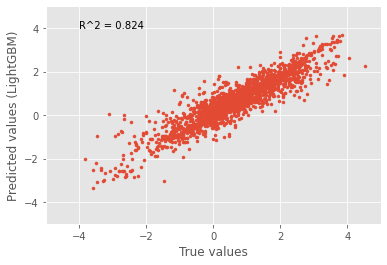

In [171]:
# Scatter plot

limits = -5,5
plt.figsize=(10,10)

plt.scatter(svm_5preds['y_test0'], svm_5preds['y_pred_svm_ave'], marker=".")
lin = np.linspace(*limits, 100)

plt.ylabel("Predicted values (LightGBM)")
plt.xlabel("True values")

plt.xlim(limits)
plt.ylim(limits)

plt.annotate("R^2 = {:.3f}".format(r2_score(svm_5preds['y_test0'], svm_5preds['y_pred_svm_ave'])), (-4, 4))
plt.show()

In [172]:
#cross valide using this optimized SVR 
svm_baseline_CVscore = cross_val_score(svm_reg, X, Y, cv=10, scoring="r2")
#cv_svm_opt_testSet = cross_val_score(optimized_svm, X, Y, cv=10, scoring="r2")
cv_svm_opt = cross_val_score(optimizedCV_svm, X, Y, cv=10, scoring="r2")
print("SVM baseline model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(svm_baseline_CVscore), np.std(svm_baseline_CVscore, ddof=1)))
#print("SVM optimized model (tested on Y_te) r2_score %0.4f with a standard deviation of %0.4f" % (svm_baseline_CVscore.mean(), svm_baseline_CVscore.std()))
print("SVM optimized model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(cv_svm_opt), np.std(cv_svm_opt, ddof=1)))

SVM baseline model r2_score 0.7033 with a standard deviation of 0.0479
SVM optimized model r2_score 0.7298 with a standard deviation of 0.0450


In [173]:
joblib.dump(svm_reg, output/"svm_reg.joblib")
#joblib.dump(optimized_svm, output/"optimized_svm.joblib")
joblib.dump(optimizedCV_svm, output/"optimizedCV_svm.joblib")

['./optimizedCV_svm.joblib']